# Projet 5 - Segmentez les clients d'un site e-commerce

# Analyse Exploratoire

# 1- Importation du jeu de données et des librairies

In [1]:
#Importation des librairies de visualisation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


#Importation des librairies de manipulation des données
import pandas as pd
import numpy as np

#Importation de la librairie os pour la gestion des différents fichiers
import os

#Importation des modules de réduction dimenssionnelle non superviée de scikit-learn
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

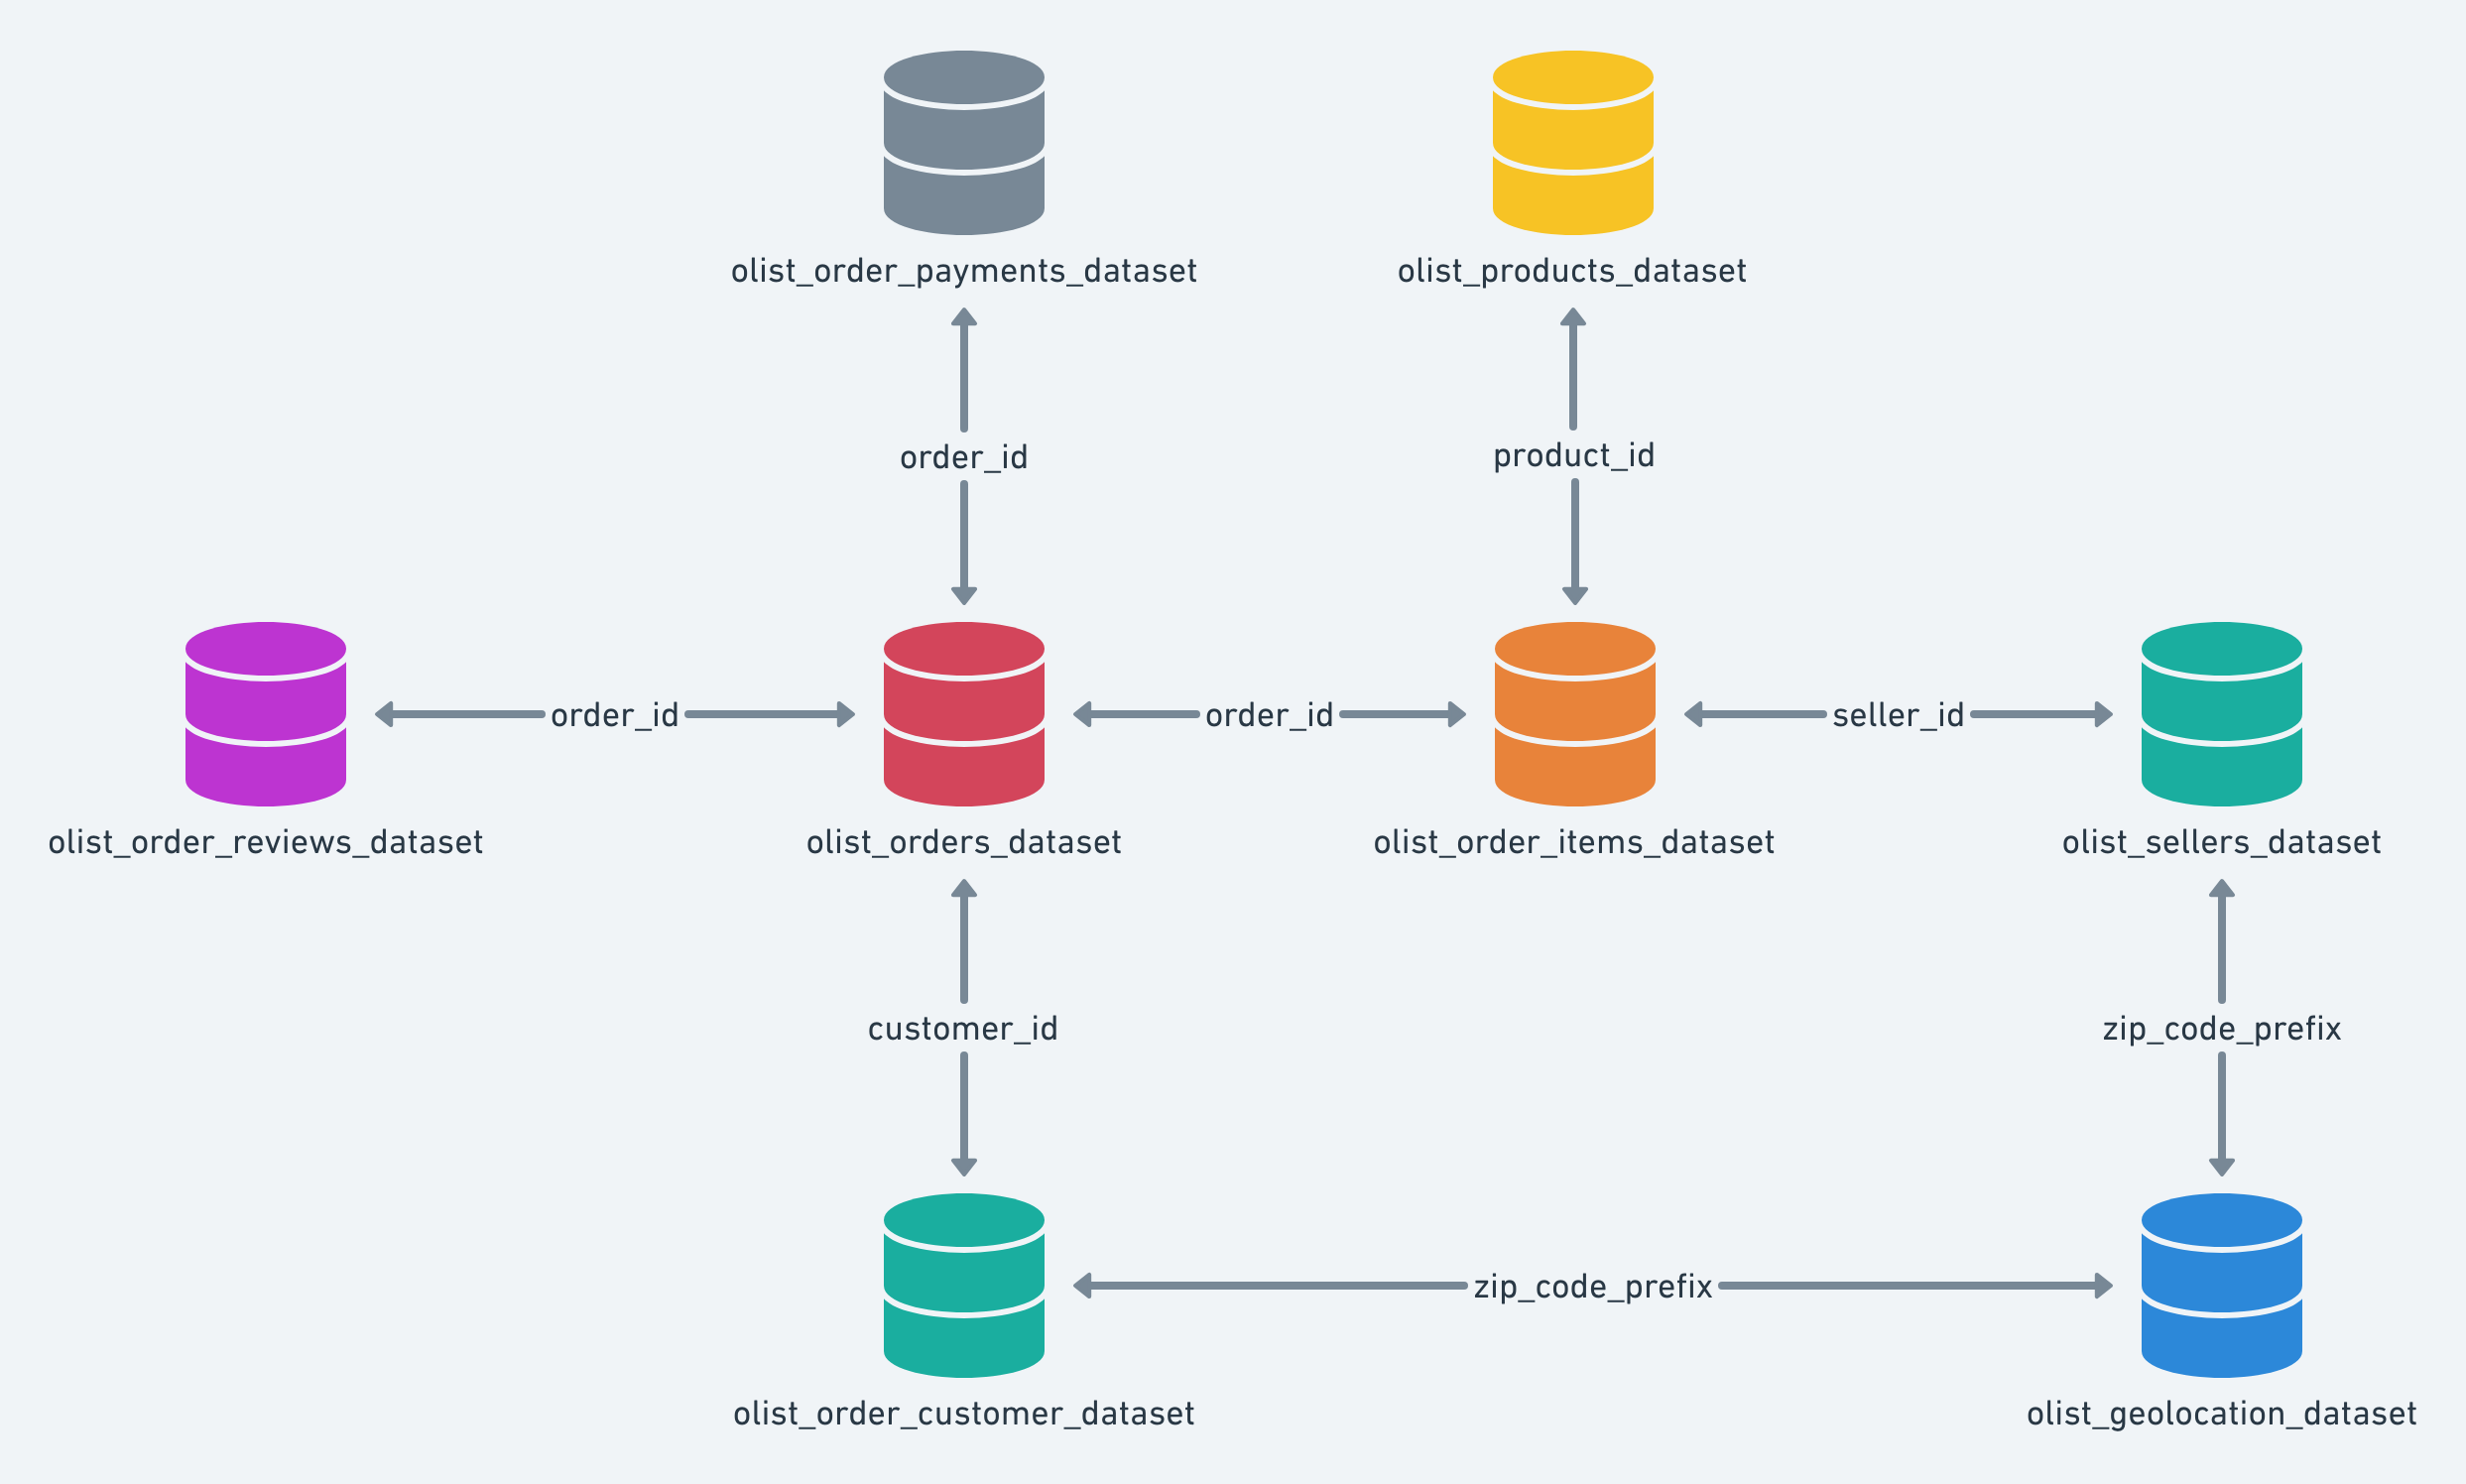

In [2]:
#Affichage du schéma liant les différents jeux de données par les variables à notre disposition
#Cette image provient du site de récupération des données : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

from PIL import Image
Image.open('Data_Scheme.png')

In [3]:
#Nos jeux de données sont disponibles dans le répertoire de travail, nous pouvons les placer dans une liste

Data_list = []
for i in os.listdir():
    if 'olist' in i:
        Data_list.append(i)
Data_list

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv']

In [4]:
#Nous créeons dynamiquement 8 jeux de données en bouclant sur notre liste de jeux de données, que nous placons
#dans une liste

Datasets = []
for i in range(len(Data_list)):
    temp = Data_list[i][6:-12]
    locals()[temp] = pd.read_csv(Data_list[i])
    print(temp)
    Datasets.append(locals()[temp])

customers
geolocation
orders
order_items
order_payments
order_reviews
products
sellers


In [5]:
#Forme des différents jeux de données

for i,j in zip(Data_list, Datasets):
    print('Le jeu de données '+'\033[1m'+'{}'.format(i[6:-12])+'\033[0m'+' a la forme suivante : {}'.format(j.shape))

Le jeu de données customers a la forme suivante : (99441, 5)
Le jeu de données geolocation a la forme suivante : (1000163, 5)
Le jeu de données orders a la forme suivante : (99441, 8)
Le jeu de données order_items a la forme suivante : (112650, 7)
Le jeu de données order_payments a la forme suivante : (103886, 5)
Le jeu de données order_reviews a la forme suivante : (99224, 7)
Le jeu de données products a la forme suivante : (32951, 9)
Le jeu de données sellers a la forme suivante : (3095, 4)


In [6]:
#Présentation sous forme de tableau 

shapes = []
lists = []
for i,j in zip(Data_list, Datasets):
    lists.append(i[6:-12])
    shapes.append(j.shape)

df_shapes = pd.DataFrame({'DataSet' : lists, 'Shape' : shapes})
df_shapes['Lenght'] = np.nan
df_shapes['n_features'] = np.nan
for i in df_shapes.index:
    df_shapes.loc[df_shapes.index == i, 'Lenght'] = df_shapes.loc[df_shapes.index == i, 'Shape'].values[0][0]

for i in df_shapes.index:
    df_shapes.loc[df_shapes.index == i, 'n_features'] = df_shapes.loc[df_shapes.index == i, 'Shape'].values[0][1]
    
df_shapes['Lenght'] = df_shapes['Lenght'].astype(int)
df_shapes['n_features'] = df_shapes['n_features'].astype(int)

df_shapes = df_shapes.drop(['Shape'], axis = 1)
df_shapes = df_shapes.sort_values(by = 'Lenght')
df_shapes.index = range(len(df_shapes))
df_shapes

DataSet   Lenght  n_features
0         sellers     3095           4
1        products    32951           9
2   order_reviews    99224           7
3       customers    99441           5
4          orders    99441           8
5  order_payments   103886           5
6     order_items   112650           7
7     geolocation  1000163           5

In [7]:
#Création de la visualisation du DataFrame

visualization = df_shapes.style.set_table_styles([{'selector' : 'th.col_heading',
                                                  'props' : 'font-size : 4em',
                                                   'border' : '5px solid green'
                                                   }]).set_properties(**{'border': '5px solid green',
                          'color': 'navy', 
                                  'font-style' : 'Italic', 
                                  'background-color': 'cornsilk',
                                 'font-size' : '22pt',
                                 'text-align' : 'center'}).hide_index().bar(subset=["Lenght","n_features"], color='crimson')

C:\Users\eyoun\AppData\Local\Temp\ipykernel_37704\2992497786.py:3: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  visualization = df_shapes.style.set_table_styles([{'selector' : 'th.col_heading',


In [8]:
#Affichage de la visualisation

visualization

In [9]:
#On crée la liste des features en commun uniques de nos jeux de données

L = []
for i in Datasets:
    L.extend(i.columns)

features = pd.DataFrame({'Features' : L})
features['ID'] = features['Features'].str.find('id')
features = features.loc[features['ID']>0]
features = features.drop_duplicates(subset = ['Features'])
features = features.drop(['ID'], axis = 1)
features.index = range(len(features))
features_list = features['Features'].values
features_list = features_list[:-1]

In [10]:
#On crée un tableau liant de manière unique les jeux de données et les colonnes permettant de faire le liens entre eux

index = []
for i in Data_list:
    index.append(i[6:-12])

binds = pd.DataFrame(np.full((len(Data_list),len(features_list)), 0), columns = features_list, index = index)

for i in binds.index:
    for j in binds.columns:
        binds.loc[binds.index == i, j] = (j in locals()[i].columns)
        
binds = binds.astype(int)
binds = binds.transpose()
binds = binds.drop(['geolocation'], axis = 1)
binds

customers  orders  order_items  order_payments  \
customer_id                 1       1            0               0   
customer_unique_id          1       0            0               0   
order_id                    0       1            1               1   
order_item_id               0       0            1               0   
product_id                  0       0            1               0   
seller_id                   0       0            1               0   
review_id                   0       0            0               0   

                    order_reviews  products  sellers  
customer_id                     0         0        0  
customer_unique_id              0         0        0  
order_id                        1         0        0  
order_item_id                   0         0        0  
product_id                      0         1        0  
seller_id                       0         0        1  
review_id                       1         0        0

In [11]:
#On crée le jeu de données data_binds
#Dans ce jeu de données, un 1 signifie que les jeux de données en colonne et en ligne sont liés par une variable commune

data_binds = binds.transpose().dot(binds)
mask = np.triu(np.ones(data_binds.shape))
data_binds = data_binds.mask(mask == 1)
data_binds

customers  orders  order_items  order_payments  order_reviews  \
customers             NaN     NaN          NaN             NaN            NaN   
orders                1.0     NaN          NaN             NaN            NaN   
order_items           0.0     1.0          NaN             NaN            NaN   
order_payments        0.0     1.0          1.0             NaN            NaN   
order_reviews         0.0     1.0          1.0             1.0            NaN   
products              0.0     0.0          1.0             0.0            0.0   
sellers               0.0     0.0          1.0             0.0            0.0   

                products  sellers  
customers            NaN      NaN  
orders               NaN      NaN  
order_items          NaN      NaN  
order_payments       NaN      NaN  
order_reviews        NaN      NaN  
products             NaN      NaN  
sellers              0.0      NaN

In [12]:
#On importe les librairies utiles de l'API diagras permettant de créer des diagrammes

from diagrams import Diagram, Edge, Node
from diagrams.gcp.database import SQL
from diagrams.gcp.storage import GCS
from diagrams.onprem.database import MongoDB

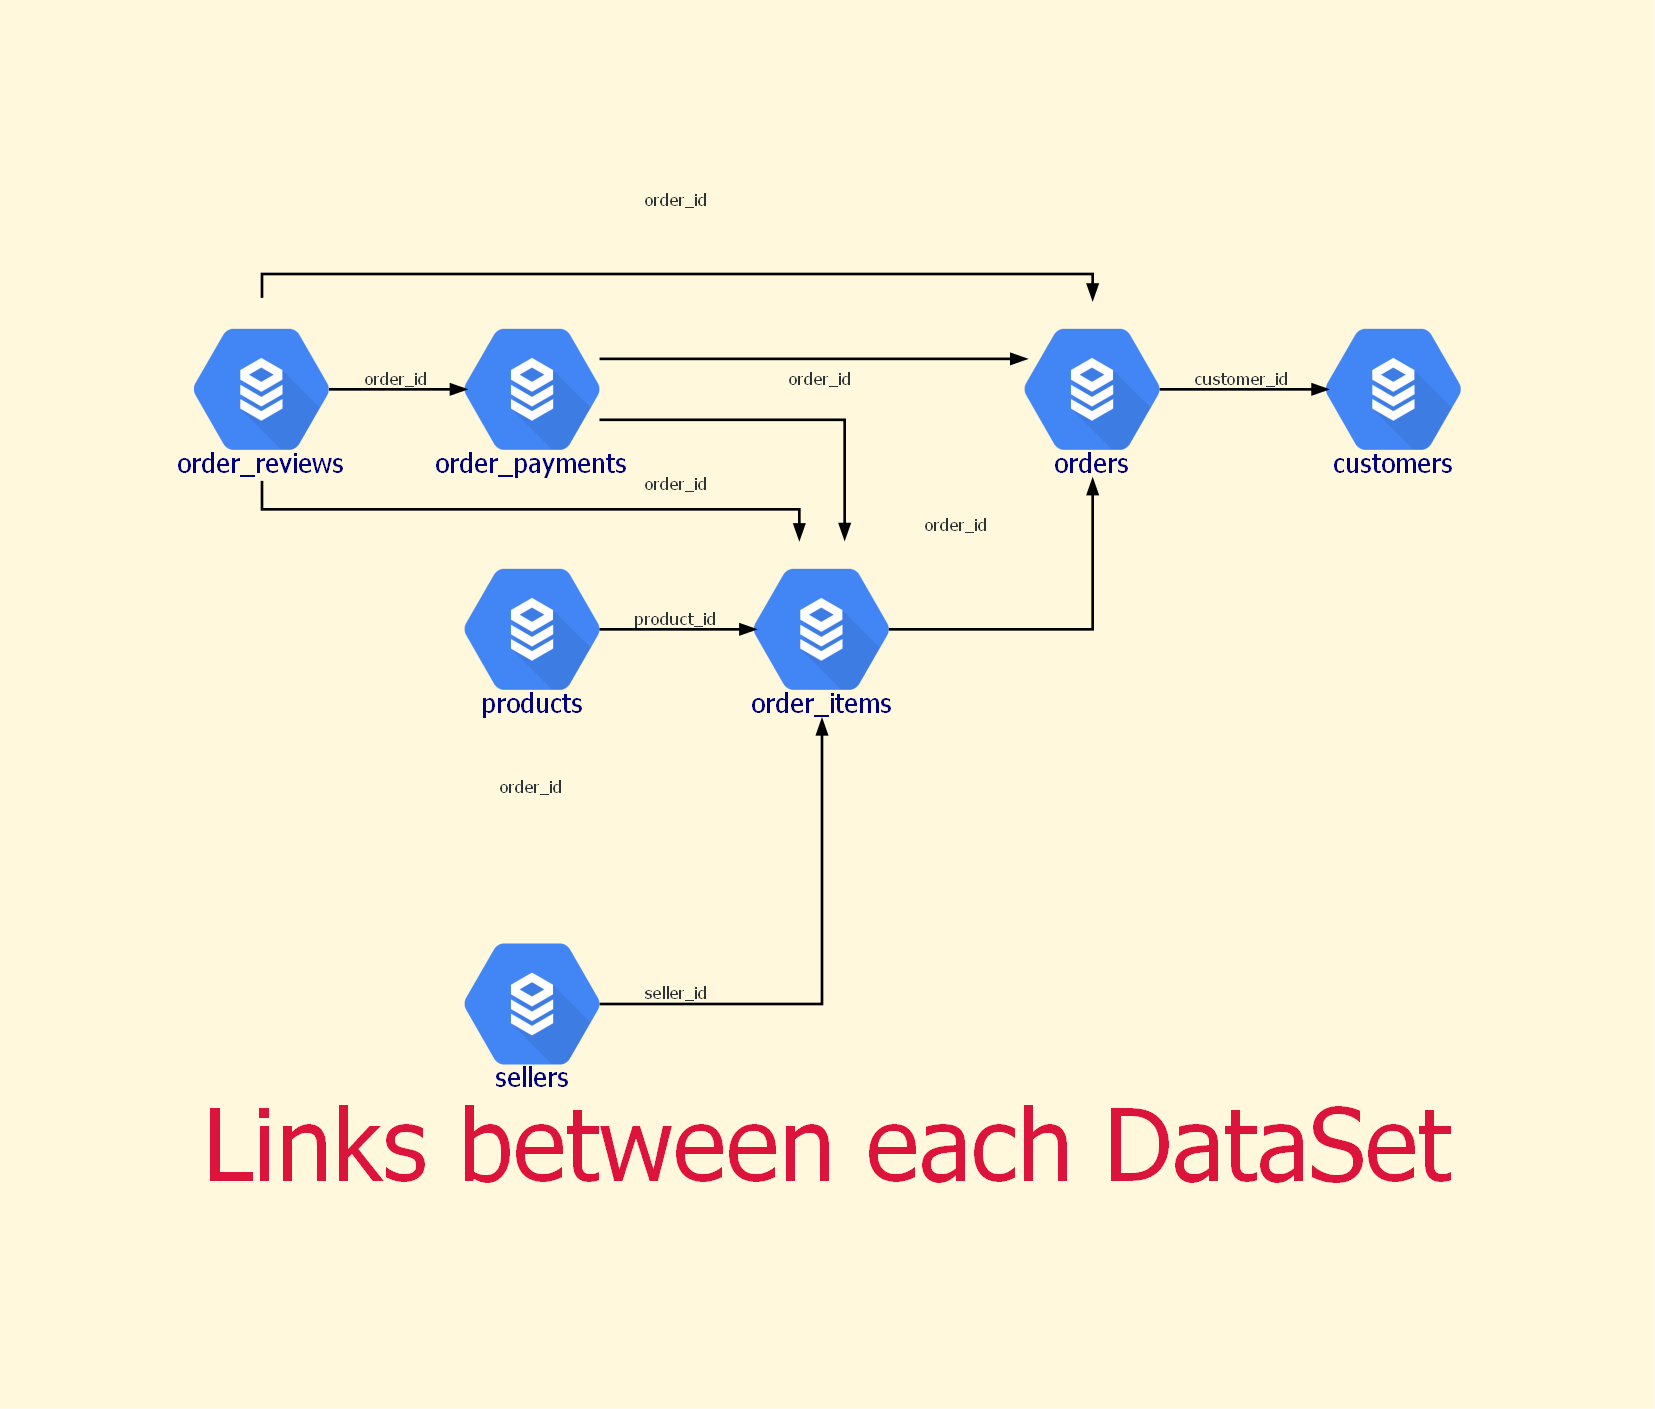

In [13]:
#Création du diagramme représentant les liens entre les jeux de données

graph_attr = {
    "fontsize": "75",
    "bgcolor": "cornsilk", 'lwidth' : '10', 'fontcolor' : 'crimson', 'fontweight' : 'bold'
}

node_attr = {
    "fontsize": "20",
    "fontcolor": "navy", 'fontweight' : 'bold',
}

with Diagram('Links between each DataSet', graph_attr = graph_attr, node_attr = node_attr) as diag:
    for i in data_binds.columns:
        locals()[i] = SQL(i, style = 'bold')

    for i in data_binds.index:
        temp = data_binds.loc[data_binds.index == i]
        for j in temp.columns:
            if (temp[j].values == 1):
                df1 = binds.loc[binds[i] == 1]
                df2 = df1.loc[df1[j] == 1]
                text = df2.index.values[0]
                locals()[i] >> Edge(label = str(text), color = 'black', style = 'bold') >> locals()[j]

diag

In [14]:
#Ré-allocation des noms aux différents DataSets

for i in range(len(Data_list)):
    temp = Data_list[i][6:-12]
    locals()[temp] = pd.read_csv(Data_list[i])

# 2- Description des jeux de données

## 2.1- Customers

In [15]:
#Affichage des 10 premières lignes du jeu de données

customers.head(10)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
5  879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
6  fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177   
7  5e274e7a0c3809e14aba7ad5aae0d407  57b2a98a409812fe9618067b6b8ebe4f   
8  5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
9  4b7139f34592b3a31687243a302fa75b  9afe194fb833f79e300e37e580171f22   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
5                     89254         jaragua do sul             SC  
6                      4534              sao paulo             SP  
7                     35182                timoteo             MG  
8                     81560               curitiba             PR  
9                     30575         belo horizonte             MG

In [16]:
#Nous n'avons pas de valeur manquante

customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
#Affichage des valeurs uniques de chaque variable

customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Text(4000, 11, 'Ecart-type du nombre de valeurs : 279.272381586392')

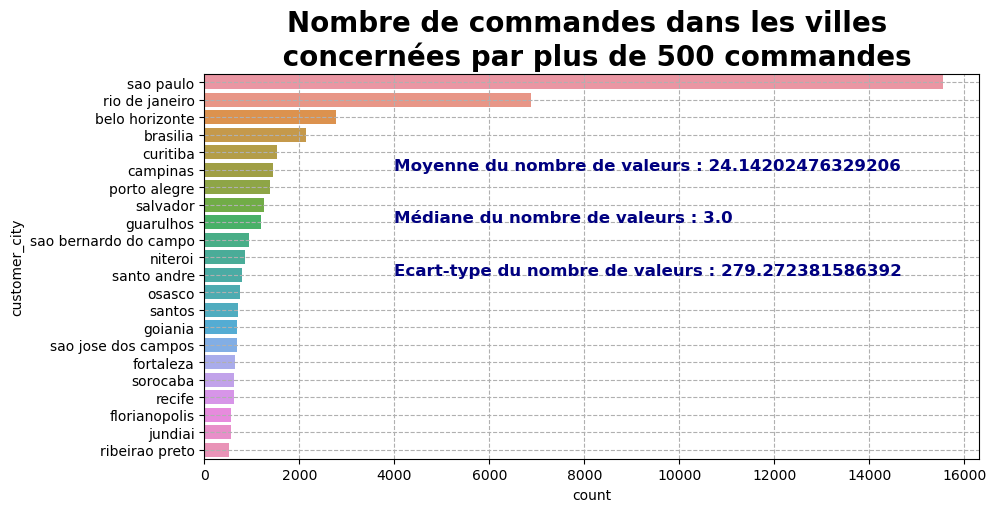

In [18]:
#Affichage du nombre d'occurence de chaque valeur de la variable 'customer_city'

plt.figure(figsize=(10, 5))
city_count = customers['customer_city'].value_counts()
order = city_count.loc[city_count > 500].index
sns.countplot(y="customer_city", order=order, data=customers.loc[customers['customer_city'].isin(order)]);
plt.grid(True, ls = '--')
plt.title('Nombre de commandes dans les villes \n concernées par plus de 500 commandes', size = 20, fontweight = 'bold')
plt.text(4000, 5, 'Moyenne du nombre de valeurs : {}'.format(city_count.mean()), size = 12, fontweight = 'bold',
        color = 'navy')
plt.text(4000, 8, 'Médiane du nombre de valeurs : {}'.format(city_count.median()), size = 12, fontweight = 'bold',
        color = 'navy')
plt.text(4000, 11, 'Ecart-type du nombre de valeurs : {}'.format(city_count.std()), size = 12, fontweight = 'bold',
        color = 'navy')

Text(1000, 19, 'Ecart-type du nombre de valeurs : 8270.')

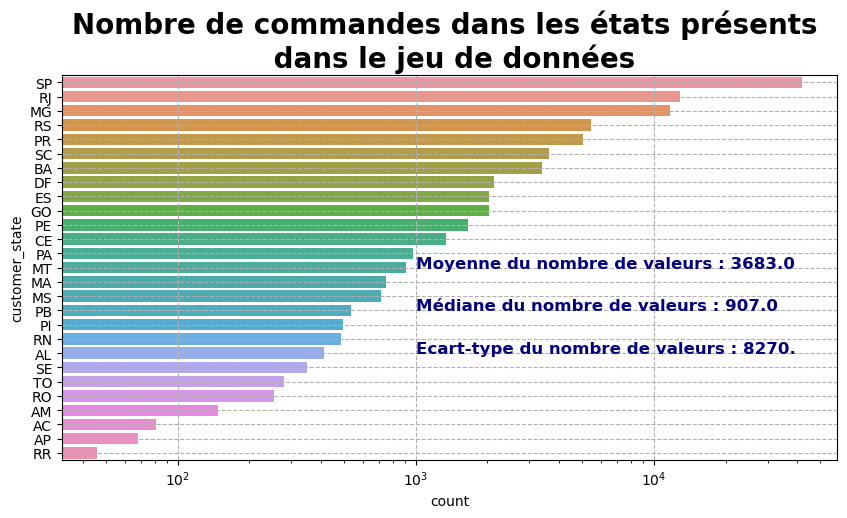

In [19]:
#Affichage du nombre de valeurs prise par la variable customer_state
plt.figure(figsize=(10, 5))
state_count = customers['customer_state'].value_counts()
order = state_count.index
sns.countplot(y="customer_state", order=order, data=customers);
plt.grid(True, ls = '--')
plt.xscale('log')
plt.title('Nombre de commandes dans les états présents \n dans le jeu de données', size = 20, fontweight = 'bold')
plt.text(1000, 13, 'Moyenne du nombre de valeurs : {}'.format(state_count.mean()), size = 12, fontweight = 'bold',
        color = 'navy')
plt.text(1000, 16, 'Médiane du nombre de valeurs : {}'.format(state_count.median()), size = 12, fontweight = 'bold',
        color = 'navy')
plt.text(1000, 19, 'Ecart-type du nombre de valeurs : {}'.format(str(state_count.std())[:5]), size = 12, fontweight = 'bold',
        color = 'navy')

## 2.2- Orders

In [20]:
#On affiche les 5 premières lignes

orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [21]:
#Nous n'avons pas de valeurs dupliquées

orders['order_id'].duplicated().sum()

0

In [22]:
#Toutes nos variables sont de type 'object'

orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [23]:
#Nous avons quelques valeurs manquantes

orders.isna().mean().sort_values()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
dtype: float64

<AxesSubplot:>

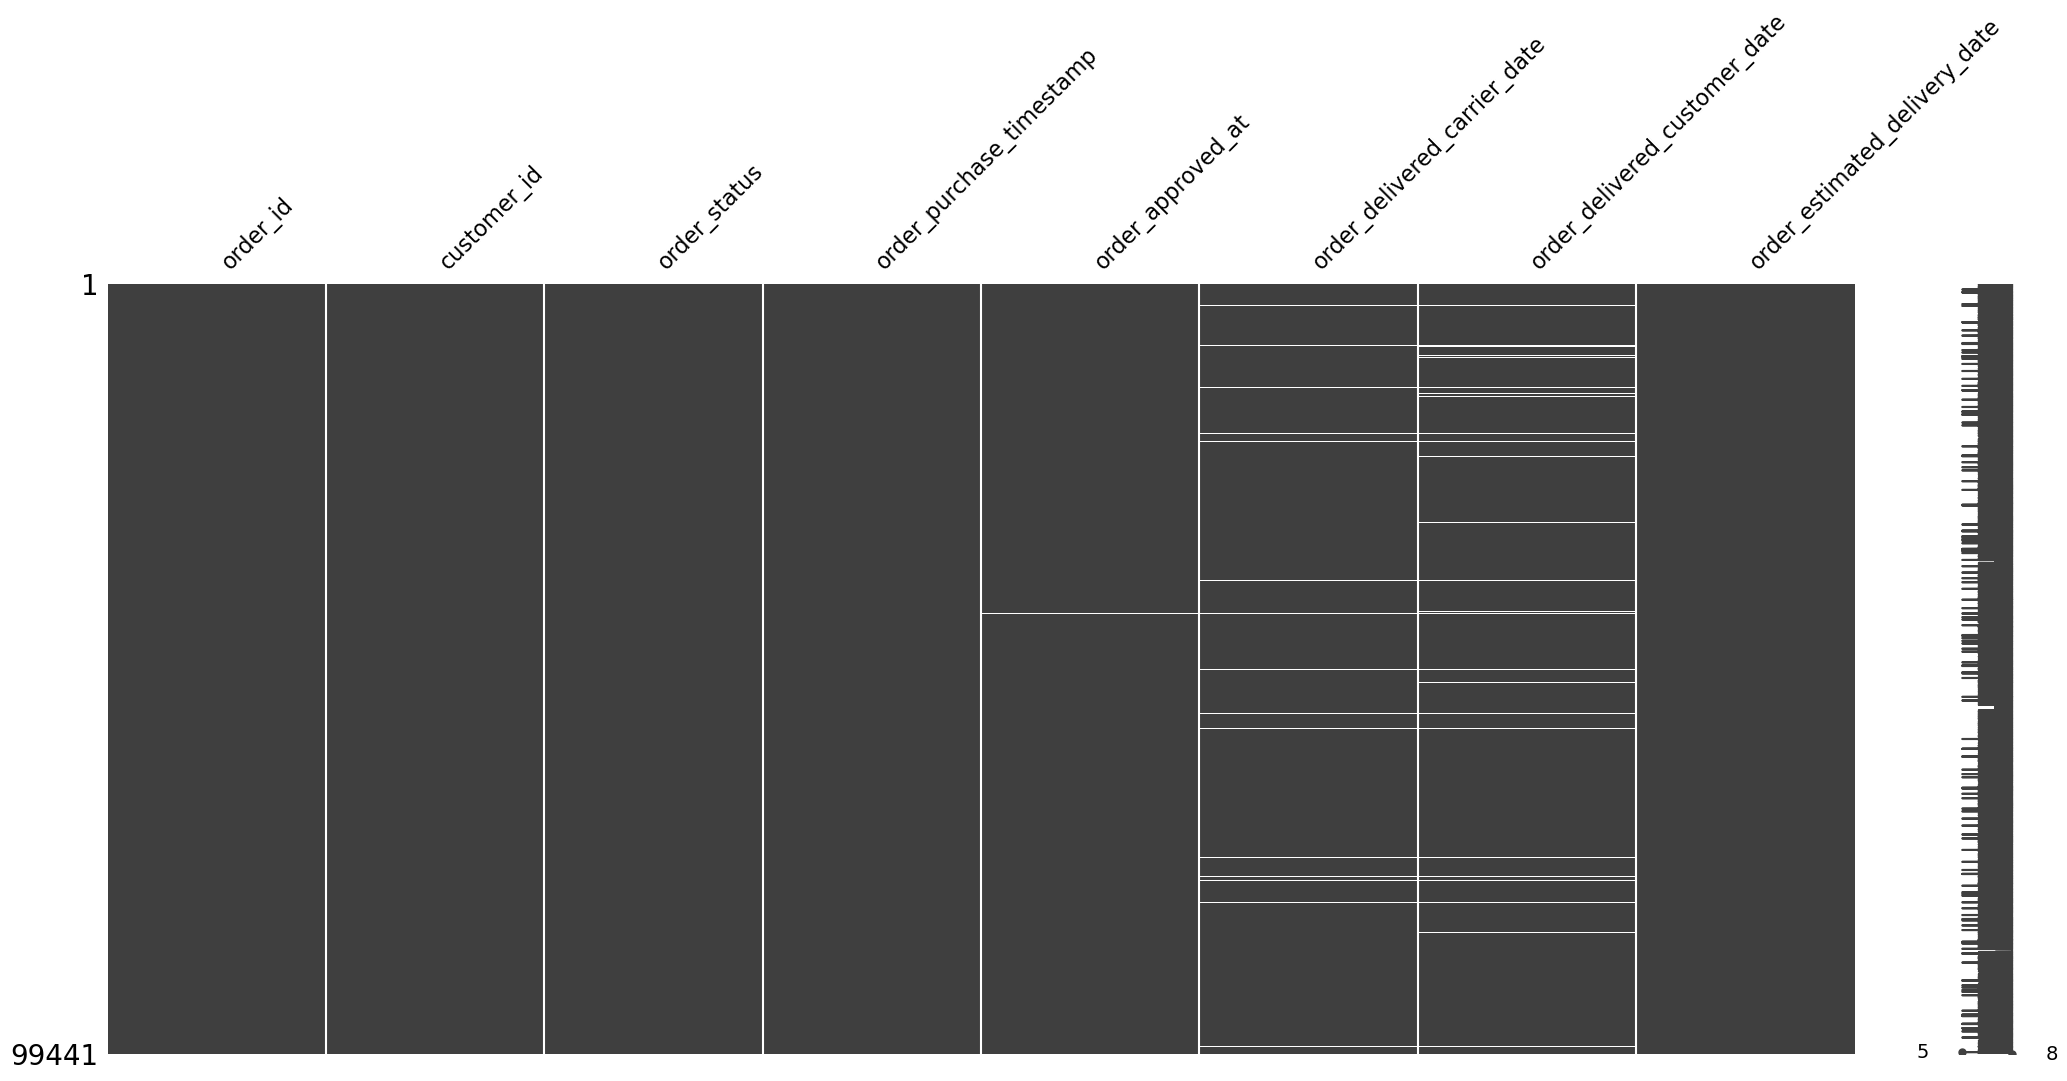

In [24]:
#Matrice des valeurs manquantes

msno.matrix(orders.sample(len(orders)))

Text(0.5, 1.0, 'Occurences de chaque valeur \n de la variable order_status')

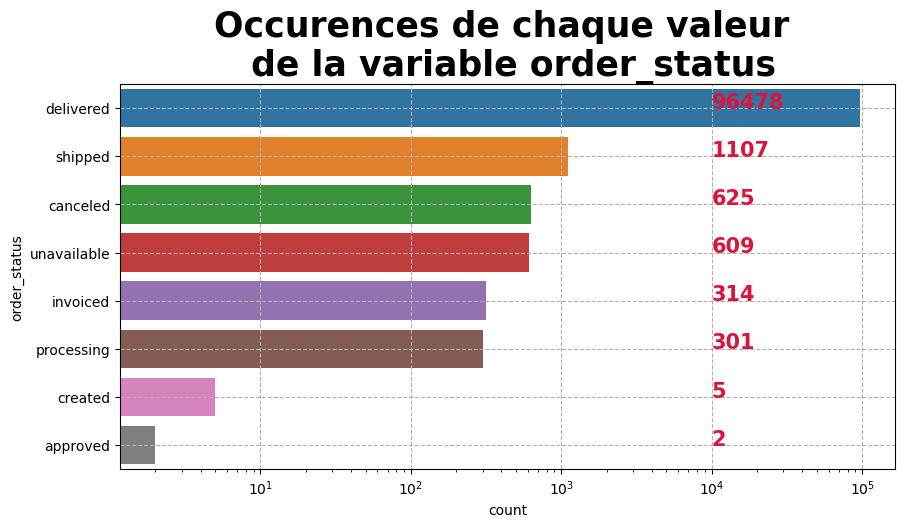

In [25]:
#Pour mieux cerner nos valeurs manquantes, intéressons nous à notre variable catégorique 'order_status'

plt.figure(figsize = (10,5))
status_count = orders['order_status'].value_counts()
order = status_count.index
sns.countplot(y="order_status", order=order, data=orders);
plt.grid(True, ls = '--')
plt.xscale('log')
for i in range(len(status_count)):
    plt.text(10000, i, '{}'.format(status_count.iloc[i]), fontweight = 'bold', size = 15, color = 'crimson')
plt.title('Occurences de chaque valeur \n de la variable order_status', size = 25, fontweight = 'bold')

In [26]:
#Nous commencons par changer le type des colonnes de date 

for i in orders.columns[3:]:
    orders[i] = pd.to_datetime(orders[i], format = "%Y-%m-%d %H:%M:%S")
print(orders.dtypes)
orders.head()

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [27]:
#Nous pouvons montrer qu'il y a quelques erreurs d'irrégularité au sein de ce jeu de données

for i,j in zip(orders.columns[3:-2], orders.columns[4:-1]):
    print('Erreurs de cohérence des dates entre les variables {} et {} : '.format(i, j))
    print(len(orders.loc[orders[i] > orders[j]]))
    print('\n')

Erreurs de cohérence des dates entre les variables order_purchase_timestamp et order_approved_at : 
0


Erreurs de cohérence des dates entre les variables order_approved_at et order_delivered_carrier_date : 
1359


Erreurs de cohérence des dates entre les variables order_delivered_carrier_date et order_delivered_customer_date : 
23




In [28]:
#Correction des erreurs de cohérence des dates

for i,j in zip(orders.columns[3:-2], orders.columns[4:-1]):
    orders.loc[orders[i] > orders[j], j] = orders.loc[orders[i] > orders[j], i]

In [29]:
#Vérification de la correction

for i,j in zip(orders.columns[3:-2], orders.columns[4:-1]):
    print('Erreurs de cohérence des dates entre les variables {} et {} : '.format(i, j))
    print(len(orders.loc[orders[i] > orders[j]]))
    print('\n')

Erreurs de cohérence des dates entre les variables order_purchase_timestamp et order_approved_at : 
0


Erreurs de cohérence des dates entre les variables order_approved_at et order_delivered_carrier_date : 
0


Erreurs de cohérence des dates entre les variables order_delivered_carrier_date et order_delivered_customer_date : 
0




In [30]:
#Nous pouvons vérifier que les valeurs manquantes de la variable order_approved_at sont manquantes pour les dates suivantes

orders.loc[orders['order_approved_at'].isna(), 'order_delivered_carrier_date'].notna().sum()

14

In [31]:
orders.loc[orders['order_approved_at'].isna(), 'order_delivered_customer_date'].notna().sum()

14

In [32]:
#Notons que ces commandes ont le status livrées (cf. variable order_status)

orders.loc[orders['order_approved_at'].isna() & orders['order_delivered_carrier_date'].notna(), 'order_status'].unique()

array(['delivered'], dtype=object)

In [33]:
orders.loc[orders['order_approved_at'].isna() & orders['order_delivered_customer_date'].notna(), 'order_status'].unique()

array(['delivered'], dtype=object)

In [34]:
#Nous vérifions également que les valeurs manquantes de la variable 'order_delivered_carrier_date' 
#sont manquantes pour la variable 'order_delivered_customer_date'

orders.loc[orders['order_delivered_carrier_date'].isna(), 'order_delivered_customer_date'].notna().sum()

1

In [35]:
#Notons qu'il s'agit d'une commande livrée

orders.loc[orders['order_delivered_carrier_date'].isna() & orders['order_delivered_customer_date'].notna(), 'order_status'].unique()

array(['delivered'], dtype=object)

In [36]:
#Correction des valeurs manquantes en utilisant la date suivante.

index = orders.loc[orders['order_delivered_customer_date'].isna()].index
orders = orders.fillna(method = 'backfill', axis = 1, limit = 1, downcast = 'datetime64[ns]')
orders.loc[orders.index.isin(index), 'order_delivered_customer_date'] = np.nan

In [37]:
#Vérification de la modification 

orders.isna().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001468
order_delivered_carrier_date     0.017920
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64

In [38]:
#Création des nouvelles variables 

orders['approved_missing'] = orders['order_approved_at'].isna()
orders['carrier_missing'] = orders['order_delivered_carrier_date'].isna()
orders['customer_missing'] = orders['order_delivered_customer_date'].isna()

In [39]:
#Les valeurs manquantes de order_approved_at sont manquantes pour 'order_delivered_carrier_date'

pd.crosstab(orders['approved_missing'], orders['carrier_missing'])

carrier_missing   False  True
approved_missing             
False             97659  1636
True                  0   146

In [40]:
#Les valeurs manquantes de order_delivered_carrier_date sont manquantes pour 'order_delivered_customer_date'

pd.crosstab(orders['carrier_missing'], orders['customer_missing'])

customer_missing  False  True
carrier_missing              
False             96476  1183
True                  0  1782

In [41]:
#On supprime les variables nouvellement crée

orders = orders.drop(['approved_missing', 'carrier_missing', 'customer_missing'], axis = 1)

In [42]:
#Les valeurs manquantes de la variable 'orders_approved_at' correspondent bien à ce que l'on attend

orders.loc[orders['order_approved_at'].isna(), 'order_status'].value_counts()

canceled    141
created       5
Name: order_status, dtype: int64

In [43]:
#Nous avons une commande livrée chez le transporteur manquante manquante

orders.loc[orders['order_delivered_carrier_date'].isna(), 'order_status'].value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        1
Name: order_status, dtype: int64

In [44]:
#Cette commande a été approuvée mais est manquante pour les deux dates de livraison

orders.loc[orders['order_delivered_carrier_date'].isna() & (orders['order_status'] == 'delivered')]

order_id                       customer_id  \
92643  2d858f451373b04fb5c984a1cc2defaf  e08caf668d499a6d643dafd7c5cc498a   

      order_status order_purchase_timestamp   order_approved_at  \
92643    delivered      2017-05-25 23:22:43 2017-05-25 23:30:16   

      order_delivered_carrier_date order_delivered_customer_date  \
92643                          NaT                           NaT   

      order_estimated_delivery_date  
92643                    2017-06-23

In [45]:
#Nous changeons le statut de cette commande en 'approved'

orders.loc[orders['order_delivered_carrier_date'].isna() & (orders['order_status'] == 'delivered') ,'order_status'] = 'approved'

In [46]:
#De la même manière, nous vérifions les statuts des commandes livrée chez le client, et nous avons 7 commandes 'livrées'

orders.loc[orders['order_delivered_customer_date'].isna(), 'order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         7
created           5
approved          3
Name: order_status, dtype: int64

In [47]:
#Ces commandes ont été livrées chez le transporteur, mais pas chez le client

orders.loc[orders['order_delivered_customer_date'].isna() & (orders['order_status'] == 'delivered')]

order_id                       customer_id  \
3002   2d1e2d5bf4dc7227b3bfebb81328c15f  ec05a6d8558c6455f0cbbd8a420ad34f   
20618  f5dd62b788049ad9fc0526e3ad11a097  5e89028e024b381dc84a13a3570decb4   
43834  2ebdfc4f15f23b91474edf87475f108e  29f0540231702fda0cfdee0a310f11aa   
79263  e69f75a717d64fc5ecdfae42b2e8e086  cfda40ca8dd0a5d486a9635b611b398a   
82868  0d3268bad9b086af767785e3f0fc0133  4f1d63d35fb7c8999853b2699f5c7649   
97647  ab7c89dc1bf4a1ead9d6ec1ec8968a84  dd1b84a7286eb4524d52af4256c0ba24   
98038  20edc82cf5400ce95e1afacc25798b31  28c37425f1127d887d7337f284080a0f   

      order_status order_purchase_timestamp   order_approved_at  \
3002     delivered      2017-11-28 17:44:07 2017-11-28 17:56:40   
20618    delivered      2018-06-20 06:58:43 2018-06-20 07:19:05   
43834    delivered      2018-07-01 17:05:11 2018-07-01 17:15:12   
79263    delivered      2018-07-01 22:05:55 2018-07-01 22:15:14   
82868    delivered      2018-07-01 21:14:02 2018-07-01 21:29:54   
97647    delivered      2018-06-08 12:09:39 2018-06-08 12:36:39   
98038    delivered      2018-06-27 16:09:12 2018-06-27 16:29:30   

      order_delivered_carrier_date order_delivered_customer_date  \
3002           2017-11-30 18:12:23                           NaT   
20618          2018-06-25 08:05:00                           NaT   
43834          2018-07-03 13:57:00                           NaT   
79263          2018-07-03 13:57:00                           NaT   
82868          2018-07-03 09:28:00                           NaT   
97647          2018-06-12 14:10:00                           NaT   
98038          2018-07-03 19:26:00                           NaT   

      order_estimated_delivery_date  
3002                     2017-12-18  
20618                    2018-07-16  
43834                    2018-07-30  
79263                    2018-07-30  
82868                    2018-07-24  
97647                    2018-06-26  
98038                    2018-07-19

In [48]:
#Nous changeons le statut de cette commande en 'processing'

orders.loc[orders['order_delivered_customer_date'].isna() & (orders['order_status'] == 'delivered') ,'order_status'] = 'processing'

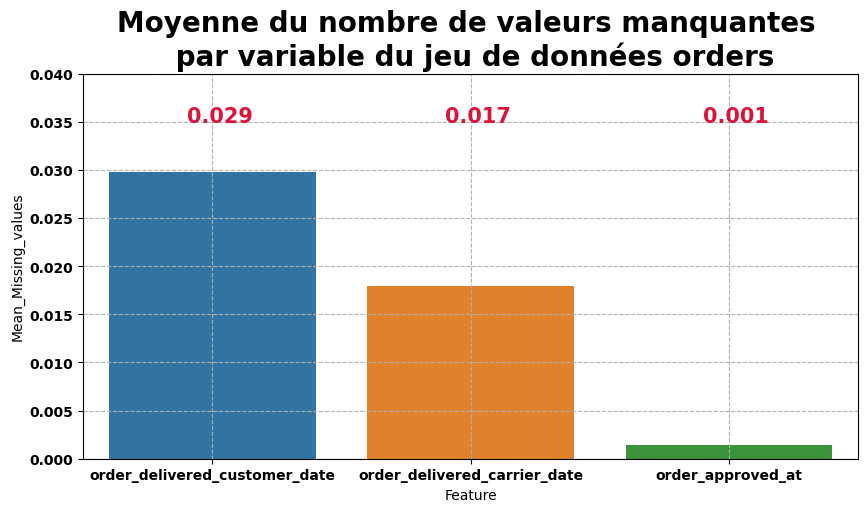

In [49]:
#Point final sur les valeurs manquantes

Missing_orders = pd.DataFrame(orders.isna().mean().sort_values(ascending = False), columns = ['Mean_Missing_values'])
Missing_orders['Feature'] = Missing_orders.index
Missing_orders = Missing_orders.loc[Missing_orders['Mean_Missing_values'] > 0]
plt.rcParams.update({'font.size' : 10, 'font.weight' : 'bold'})
plt.figure(figsize = (10,5))
plt.ylim(0, 0.04)
plt.title('Moyenne du nombre de valeurs manquantes \n par variable du jeu de données orders', size = 20, weight = 'bold')
sns.barplot(data = Missing_orders, x = 'Feature', y = 'Mean_Missing_values')
plt.grid(True, ls = '--')
for i in range(len(Missing_orders)):
    plt.text(i - 0.1, 0.035, '{}'.format(str(Missing_orders.iloc[i]['Mean_Missing_values'])[:5]),
            size = 15, weight = 'bold', color = 'crimson')

## 2.3- Order Reviews

In [50]:
print('Nombre de valeurs dupliquées pour la variable\033[1m order_id \033[0m: {}'.format(order_reviews['order_id'].duplicated().sum()))
print('Nombre de valeurs dupliquées pour la variable\033[1m review_id \033[0m: {}'.format(order_reviews['review_id'].duplicated().sum()))
print('Absence de doublons avec la combinaison de ces deux variables : {}'.format(order_reviews[['review_id', 'order_id']].duplicated().sum()))

Nombre de valeurs dupliquées pour la variable order_id : 551
Nombre de valeurs dupliquées pour la variable review_id : 814
Absence de doublons avec la combinaison de ces deux variables : 0


In [51]:
#Affichage des 5 premières lignes

order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [52]:
#Nombre de commandes du jeu de données order_reviews présentes dans le jeu de données orders
#auquel on soustrait la longueur du jeu de données order_reviews

order_reviews['order_id'].isin(orders['order_id'].unique()).sum() - len(order_reviews)

0

In [53]:
#Décompte des commandes non commentées

temp = orders['order_id'].isin(order_reviews['order_id'].unique()).sum() - len(orders)
print('Nous avons \033[1m{}\033[0m commandes sans commentaire.'.format(-temp))

Nous avons 768 commandes sans commentaire.


In [54]:
#Il ne s'agit pas de commandes en cours de livraison
#Affichage des status des commandes non commentées

orders.loc[~orders['order_id'].isin(order_reviews['order_id']), 'order_status'].value_counts()

delivered      646
shipped         75
canceled        20
unavailable     14
processing       6
invoiced         5
created          2
Name: order_status, dtype: int64

In [55]:
#Génération aléatoire d'une valeur dupiquée de review_id et projection du jeu de données sur cette valeur

duplicated_reviews = order_reviews.loc[order_reviews['review_id'].duplicated(), 'review_id'].values
random_review_id = duplicated_reviews[np.random.randint(len(duplicated_reviews))]
order_reviews.loc[order_reviews['review_id'] == random_review_id]

review_id                          order_id  \
10926  8f5b66ebafa5c69767c42dfeacfb4c86  d3d6788577c9592da441752e8a1dd5e3   
71364  8f5b66ebafa5c69767c42dfeacfb4c86  dbf76ef1323584fa387945f83b324534   

       review_score review_comment_title review_comment_message  \
10926             5                  NaN                    NaN   
71364             5                  NaN                    NaN   

      review_creation_date review_answer_timestamp  
10926  2017-10-11 00:00:00     2017-10-15 20:47:19  
71364  2017-10-11 00:00:00     2017-10-15 20:47:19

In [56]:
#Boucle sur les valeurs dupliquées de la variable order_review, et décompte du nombre de fois où l'on a des valeurs 
#différentes pour les variables autres que 'order_id'

nb_doublons = 0 
for i in duplicated_reviews:
    temp = order_reviews.loc[order_reviews['review_id'] == i].drop(['order_id'], axis = 1)
    nb_doublons = nb_doublons + temp.duplicated(keep = False).sum() / len(temp)

Non_Order_Id_Duplpicates = len(duplicated_reviews) - nb_doublons

print('Nous avons \033[1m{}\033[0m valeurs non dupliquées en dehors de la variable order_id parmis les doublons de la variable review_id !'.format(Non_Order_Id_Duplpicates))

Nous avons 0.0 valeurs non dupliquées en dehors de la variable order_id parmis les doublons de la variable review_id !


In [57]:
#Différence entre le nombre de review_id dupliqués et le nombre de dates similaires pour les commandes correspondantes

n = 0

for i in duplicated_reviews:
    temp = order_reviews.loc[order_reviews['review_id'] == i]
    L = []
    for j in temp['order_id'].values:
        temp2 = orders.loc[orders['order_id'] == j, 'order_purchase_timestamp'].values[0].astype('datetime64[D]').astype(int)
        L.append(temp2)
    temp2_df = pd.DataFrame(L, columns = ['A'])
    if len(temp2_df['A'].unique()) == 1:
        n = n + 1

print(len(duplicated_reviews) - n)

47


In [58]:
#Différence entre le nombre de review_id dupliqués et le nombre de customer_id égaux pour les commandes correspondantes

n = 0

for i in duplicated_reviews:
    temp = order_reviews.loc[order_reviews['review_id'] == i]
    L = []
    L2 = []
    for j in temp['order_id'].values:
        temp2 = orders.loc[orders['order_id'] == j, 'customer_id'].values[0]
        L.append(temp2)
    for k in L:
        temp3 = customers.loc[customers['customer_id'] == k, 'customer_unique_id'].values[0]
        L2.append(temp3)
        temp3_df = pd.DataFrame(L2, columns = ['A'])
    if len(temp3_df['A'].unique()) == 1:
        n += 1
        
print(len(duplicated_reviews) - n)

0


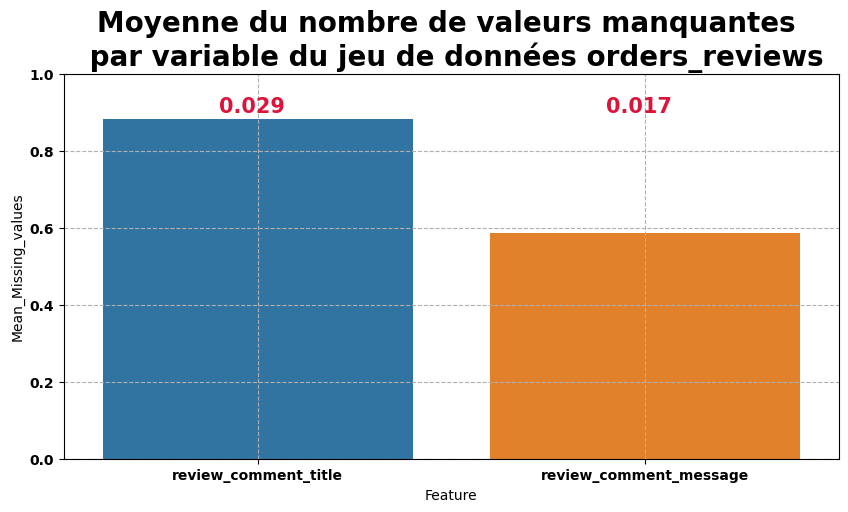

In [59]:
#Affichage des valeurs manquantes du jeu de données order_reviews

Missing_reviews = pd.DataFrame(order_reviews.isna().mean().sort_values(ascending = False), columns = ['Mean_Missing_values'])
Missing_reviews['Feature'] = Missing_reviews.index
Missing_reviews = Missing_reviews.loc[Missing_reviews['Mean_Missing_values'] > 0]
plt.rcParams.update({'font.size' : 10, 'font.weight' : 'bold'})
plt.figure(figsize = (10,5))
plt.ylim(0, 1)
plt.title('Moyenne du nombre de valeurs manquantes \n par variable du jeu de données orders_reviews', size = 20, weight = 'bold')
sns.barplot(data = Missing_reviews, x = 'Feature', y = 'Mean_Missing_values')
plt.grid(True, ls = '--')
for i in range(len(Missing_reviews)):
    plt.text(i - 0.1, 0.9, '{}'.format(str(Missing_orders.iloc[i]['Mean_Missing_values'])[:5]),
            size = 15, weight = 'bold', color = 'crimson')

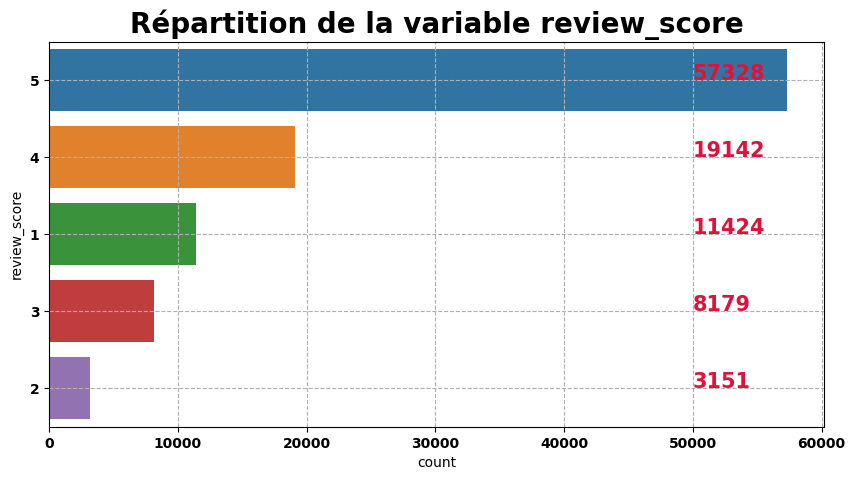

In [60]:
score_count = order_reviews['review_score'].value_counts().sort_values(ascending = False)
order = score_count.index
plt.figure(figsize = (10,5))
sns.countplot(data = order_reviews, y = 'review_score', order = order)
plt.grid(True, ls = '--')
plt.title('Répartition de la variable review_score', size = 20, weight = 'bold')
for i in range(len(order)):
    plt.text(50000, i, '{}'.format(score_count.iloc[i]), size = 15, color = 'crimson')

In [61]:
order_reviews['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

(-1.104917128625405,
 1.100234148982162,
 -1.1193288794933458,
 1.1111118807968288)

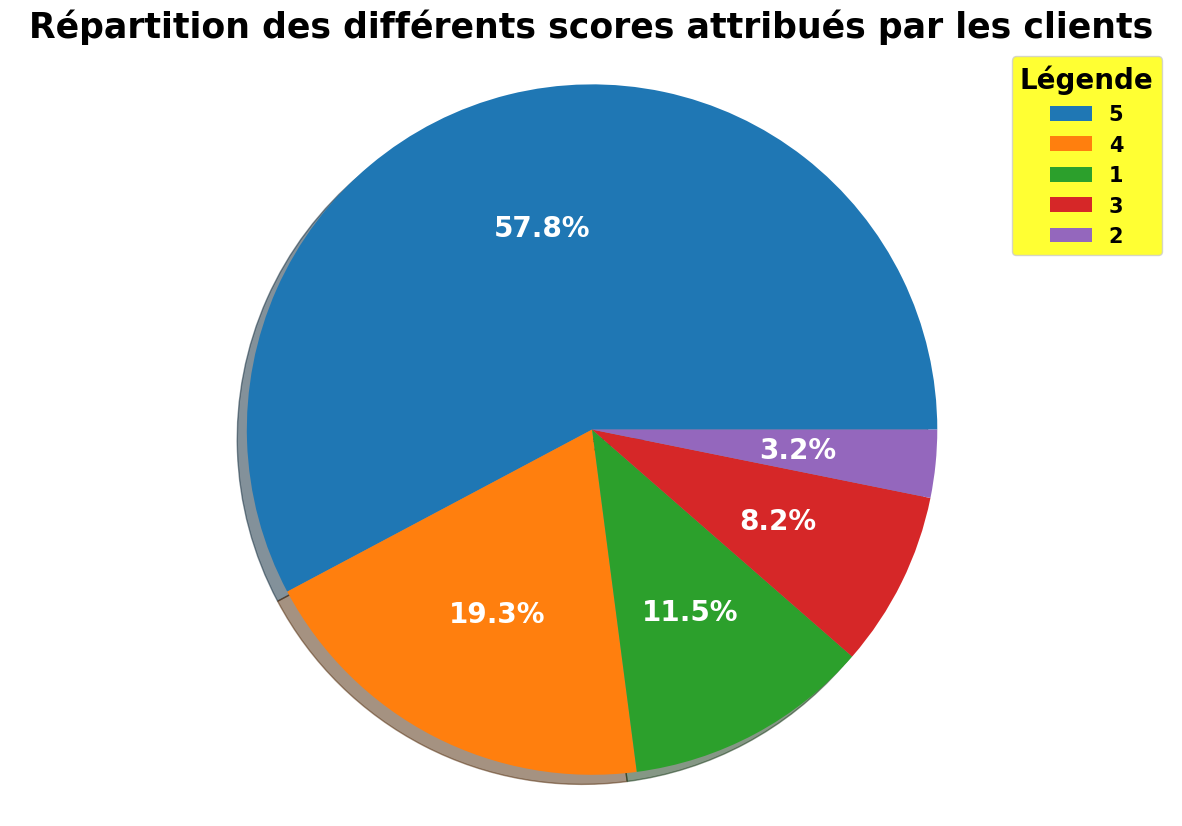

In [62]:
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize = (15,10))
ax = plt.axes()
pie = plt.pie(order_reviews['review_score'].value_counts(), textprops=dict(color="w"), labels = order_reviews['review_score'].value_counts().index
           , autopct='%1.1f%%', shadow=True)
plt.legend(fontsize = 15, facecolor = 'yellow', title = 'Légende', title_fontsize = 20);
plt.title('Répartition des différents scores attribués par les clients', size = 25, weight = 'bold')
ax.axis('equal')

In [63]:
#Construction de la variable 'comment_available' et 'title available'

order_reviews['comment_available'] = order_reviews['review_comment_message'].isna()
order_reviews['title_available'] = order_reviews['review_comment_title'].isna()

<AxesSubplot:title={'center':'Pourcentage de personnes ayant \n laissé un commentaire par score'}, xlabel='review_score', ylabel='comment_available'>

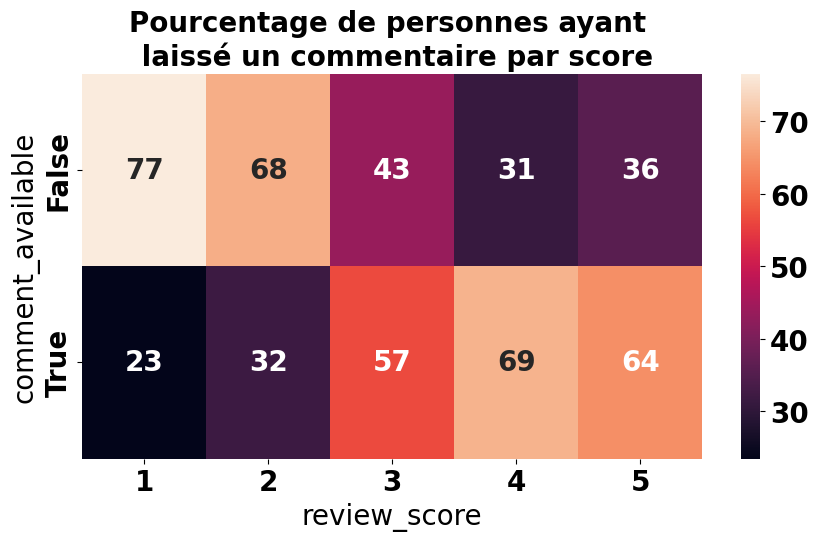

In [64]:
#Proportion de clients ayants laissé un commentaire par score

comment = pd.crosstab(order_reviews['comment_available'], order_reviews['review_score'])

for i in comment.columns.to_list():
    comment[i] = (comment[i] / len(order_reviews.loc[order_reviews['review_score'] == i])) * 100

plt.figure(figsize = (10,5))
plt.title('Pourcentage de personnes ayant \n laissé un commentaire par score', size = 20, weight = 'bold')
sns.heatmap(comment, annot = comment)

## 2.4- Order-Payments

In [65]:
#Affichage des 5 premières lignes

order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [66]:
#Aucune valeur manquante

order_payments.isna().mean()

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

In [67]:
#Nombre de valeurs dupliquées pour les 'order_id'

order_payments['order_id'].duplicated().sum()

4446

In [68]:
#Nombre de valeurs dupliquées pour l'association 'order_id' et 'payment_sequential'

order_payments[['order_id', 'payment_sequential']].duplicated().sum()

0

Text(4000, 10, 'Déviation standard de la variable : 217.4')

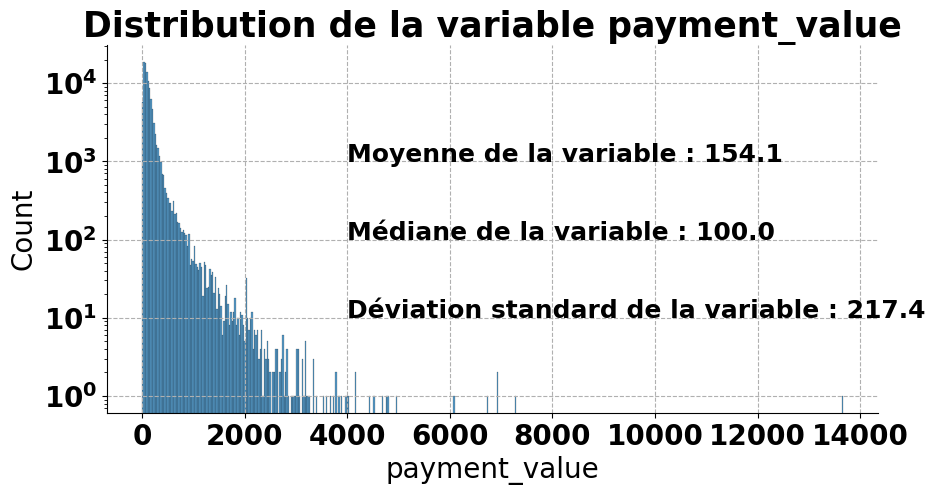

In [69]:
#Affichage de la distribution des montants des paiements

sns.displot(order_payments, x = 'payment_value', bins = 500, aspect = 2, height = 5)
plt.yscale('log')
plt.title('Distribution de la variable payment_value', size = 25, weight = 'bold')
plt.grid(True, ls = '--')
plt.text(4000, 1000, 'Moyenne de la variable : {}'.format(str(order_payments['payment_value'].mean())[:5]), size = 18)
plt.text(4000, 100, 'Médiane de la variable : {}'.format(str(order_payments['payment_value'].median())[:5]), size = 18)
plt.text(4000, 10, 'Déviation standard de la variable : {}'.format(str(order_payments['payment_value'].std())[:5]), size = 18)

C:\Users\eyoun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


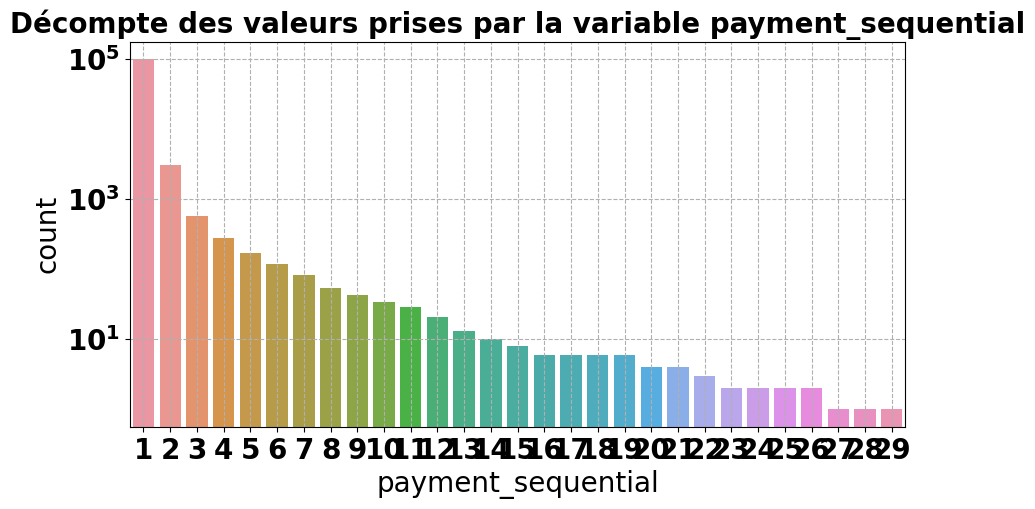

In [70]:
#Valeurs prises par la variable payment_sequential

plt.figure(figsize = (10,5))
plt.title('Décompte des valeurs prises par la variable payment_sequential', size = 20, weight = 'bold')
sns.countplot(order_payments['payment_sequential'])
plt.yscale('log')
plt.grid(True, ls = '--')

C:\Users\eyoun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


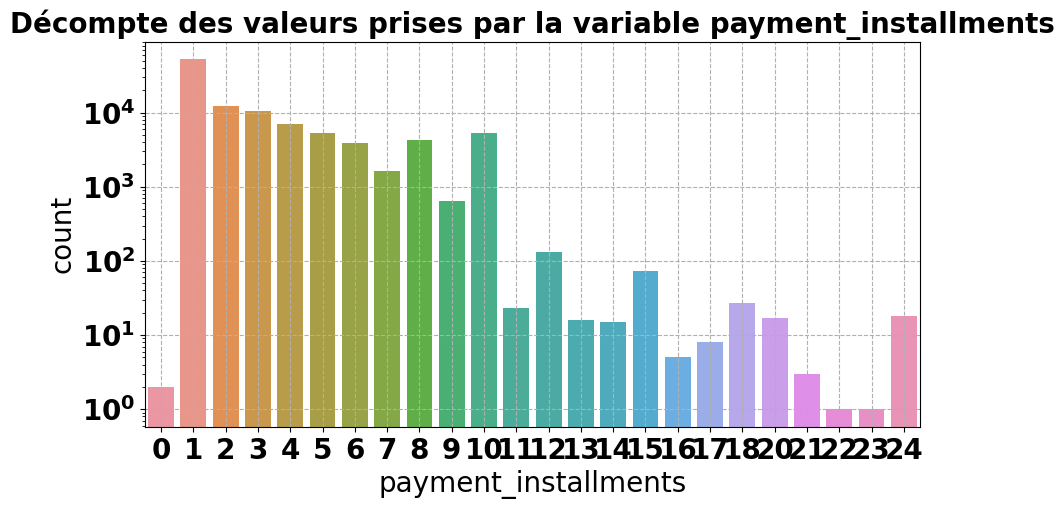

In [71]:
#Valeurs prises par la variable payment_installments

plt.figure(figsize = (10,5))
plt.title('Décompte des valeurs prises par la variable payment_installments', size = 20, weight = 'bold')
sns.countplot(order_payments['payment_installments'])
plt.yscale('log')
plt.grid(True, ls = '--')

C:\Users\eyoun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


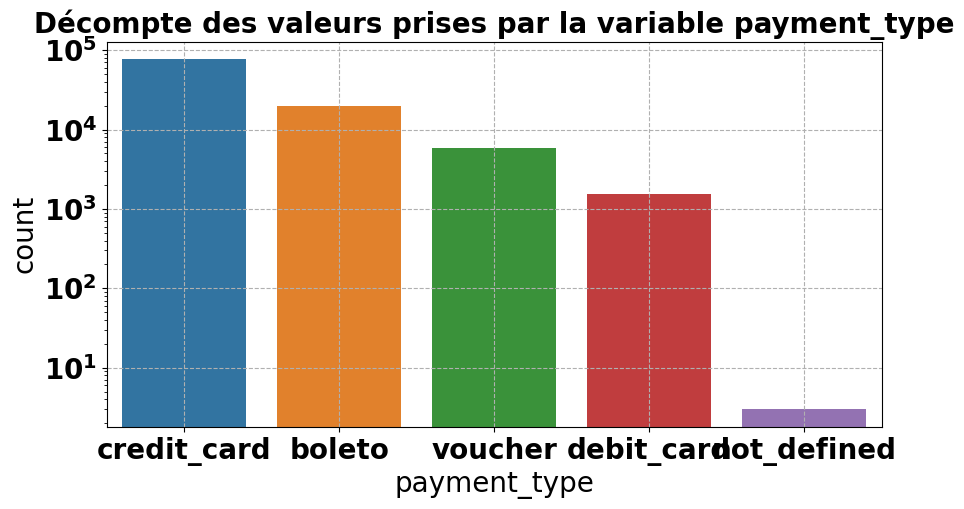

In [72]:
#Valeurs prises par la variable payment_type

plt.figure(figsize = (10,5))
plt.title('Décompte des valeurs prises par la variable payment_type', size = 20, weight = 'bold')
sns.countplot(order_payments['payment_type'])
plt.yscale('log')
plt.grid(True, ls = '--')

In [73]:
#On place la liste des commandes dans une liste

order_list = order_payments['order_id'].unique()

In [74]:
#On boucle sur cette liste de commandes et on met en place un compteur pour le nombre de commandes pour
#lesquels le numéro maximal de la séquence de paiement est supérieur au nombre de séquences

n = 0 
for i in order_list:
    temp = order_payments.loc[order_payments['order_id'] == i]
    n1 = len(temp)
    n2 = temp['payment_sequential'].max()
    if n2 > n1:
        n +=1

In [75]:
#Affichage du nombre de commandes pour lesquels on a un problème de numérotation de séquences

print('Nous avons {} commandes avec des valeurs abérrantes pour la variable payment_sequential.'.format(n))

Nous avons 80 commandes avec des valeurs abérrantes pour la variable payment_sequential.


In [76]:
#Correction de ces valeurs abérrantes

order_payments = order_payments.sort_values(by = 'payment_sequential')

for i in order_list:
    temp = order_payments.loc[order_payments['order_id'] == i]
    n1 = len(temp)
    n2 = temp['payment_sequential'].max()
    if n2 > n1:
        order_payments.loc[order_payments['order_id'] == i, 'payment_sequential'] = range(1, len(temp) + 1)

In [77]:
#Décompte du nombre d'individus avec des valeurs abérantes pour cette variable.

(order_payments['payment_sequential'] > order_payments['payment_installments']).sum()

4258

In [78]:
#Décompte du nombre de commandes pour lesquelles on a une valeur abérrante pour cette variable

n_installments = 0 

for i in order_list:
    temp = order_payments.loc[order_payments['order_id'] == i]
    n1 = temp['payment_sequential'].max()
    n2 = temp['payment_installments'].max()
    if n1 > n2:
        n_installments +=1

In [79]:
print('Nous avons {} commandes concernées par ces valeurs abérrantes de la variable payment_sequential'.format(n_installments))

Nous avons 2041 commandes concernées par ces valeurs abérrantes de la variable payment_sequential


In [80]:
#Correction des valeurs abérrantes de la variable payment_installments

for i in order_list:
    temp = order_payments.loc[order_payments['order_id'] == i]
    n1 = temp['payment_sequential'].max()
    n2 = temp['payment_installments'].max()
    if n1 > n2:
        order_payments.loc[order_payments['order_id'] == i, 'payment_installments'] = np.full((len(temp), 1), n1).reshape(-1)

## 2.5- Products

In [81]:
#Affichage des 5 premirèes lignes

products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [82]:
#Nous n'avons pas de valeurs dupliquées

products['product_id'].duplicated().sum()

0

In [83]:
#Valeurs manquantes

products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [84]:
#Nous avons des individus avec beaucoup de valeurs manquantes pour les colonnes

products[products.columns[1:]].isna().mean(axis = 1).sort_values(ascending = False)

18851    1.0
18702    0.5
16136    0.5
20364    0.5
8940     0.5
        ... 
11090    0.0
11089    0.0
11088    0.0
11087    0.0
32950    0.0
Length: 32951, dtype: float64

In [85]:
#Affichage des index des produits concernés

products_na = products[products.columns[1:]].isna().mean(axis = 1).sort_values(ascending = False)
products_na.loc[products_na.values > 0]

18851    1.0
18702    0.5
16136    0.5
20364    0.5
8940     0.5
        ... 
25993    0.5
14343    0.5
24907    0.5
6280     0.5
18008    0.5
Length: 611, dtype: float64

In [86]:
#Le produuit pour lequel il manque toutes les information a été commandé plusieurs fois

index = products_na.loc[products_na.values == 1].index.values[0]
product_id = products.iloc[index]['product_id']
order_items.loc[order_items['product_id'] == product_id]

order_id  order_item_id  \
7098    101157d4fae1c9fb74a00a5dee265c25              1   
9233    1521c6bb7b1028154c8c67cf80fa809f              1   
28715   415cfaaaa8cea49f934470548797fed1              1   
28716   415cfaaaa8cea49f934470548797fed1              2   
39299   595316a07cd3dea9db7adfcc7e247ae7              1   
48424   6e150190fbe04c642a9cf0b80d83ee16              1   
48980   6f497c40431d5fb0cfbd6c943dd29215              1   
71134   a2456e7f02197951664897a94c87242d              1   
73556   a7a43f469c0d7bdb0a23a82db125aefa              1   
82767   bbfc7badbed2f1828e22b6d629201bd4              1   
84199   bf49f84a0580ef6751e13357776b7ed9              1   
85060   c1424efcde3c9e9febd9e1761667789e              1   
93346   d38dcb503cd4ddc6ce7702552918bd8f              1   
93347   d38dcb503cd4ddc6ce7702552918bd8f              2   
97847   ddf16d77e858a32f36e10c289a28ef61              1   
100495  e3daea0200104991cb979c2fcc509ae7              1   
103715  eb855beb3ac99461f7a076b4c3652472              1   

                              product_id                         seller_id  \
7098    5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
9233    5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
28715   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
28716   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
39299   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
48424   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
48980   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
71134   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
73556   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
82767   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
84199   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
85060   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
93346   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
93347   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
97847   5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
100495  5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   
103715  5eb564652db742ff8f28759cd8d2652a  4e922959ae960d389249c378d1c939f5   

        shipping_limit_date  price  freight_value  
7098    2017-04-11 08:02:26   29.0          14.52  
9233    2017-04-07 10:10:16   29.0          16.05  
28715   2017-04-07 10:35:19   29.0          14.52  
28716   2017-04-07 10:35:19   29.0          14.52  
39299   2017-08-18 04:26:04   39.0           9.27  
48424   2017-06-30 16:45:14   39.0          16.79  
48980   2017-04-11 05:55:32   29.0          10.96  
71134   2017-04-06 11:50:09   29.0          24.84  
73556   2017-08-28 13:15:11   39.0          15.10  
82767   2017-07-18 04:04:10   39.0          11.85  
84199   2017-07-09 21:35:18   39.0          15.10  
85060   2017-04-14 02:45:36   29.0          14.52  
93346   2017-06-09 17:55:13   39.0          15.10  
93347   2017-06-09 17:55:13   39.0          15.10  
97847   2017-05-02 10:50:08   29.0          14.52  
100495  2017-04-06 14:22:36   29.0          10.96  
103715  2017-03-30 16:03:46   29.0          14.52

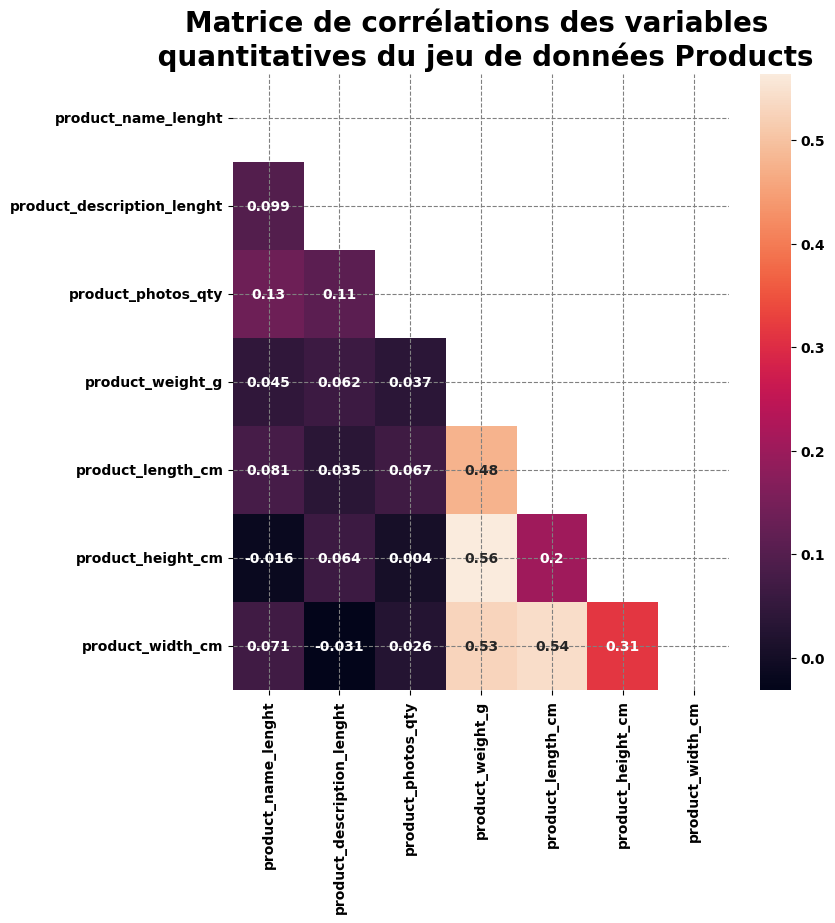

In [305]:
#Nous ne pouvons pas compléter les valeurs manquantes en utilisant un iterative imputer

Products_corr = products.corr()
plt.rcParams.update({'font.size' : 10})
plt.figure(figsize = (8,8))
mask = np.triu(np.ones(Products_corr.shape))
sns.heatmap(Products_corr, mask = mask, annot = Products_corr)
plt.title('Matrice de corrélations des variables \n quantitatives du jeu de données Products', size = 20, weight = 'bold')
plt.grid(True, ls = '--', color = 'grey')

C:\Users\eyoun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


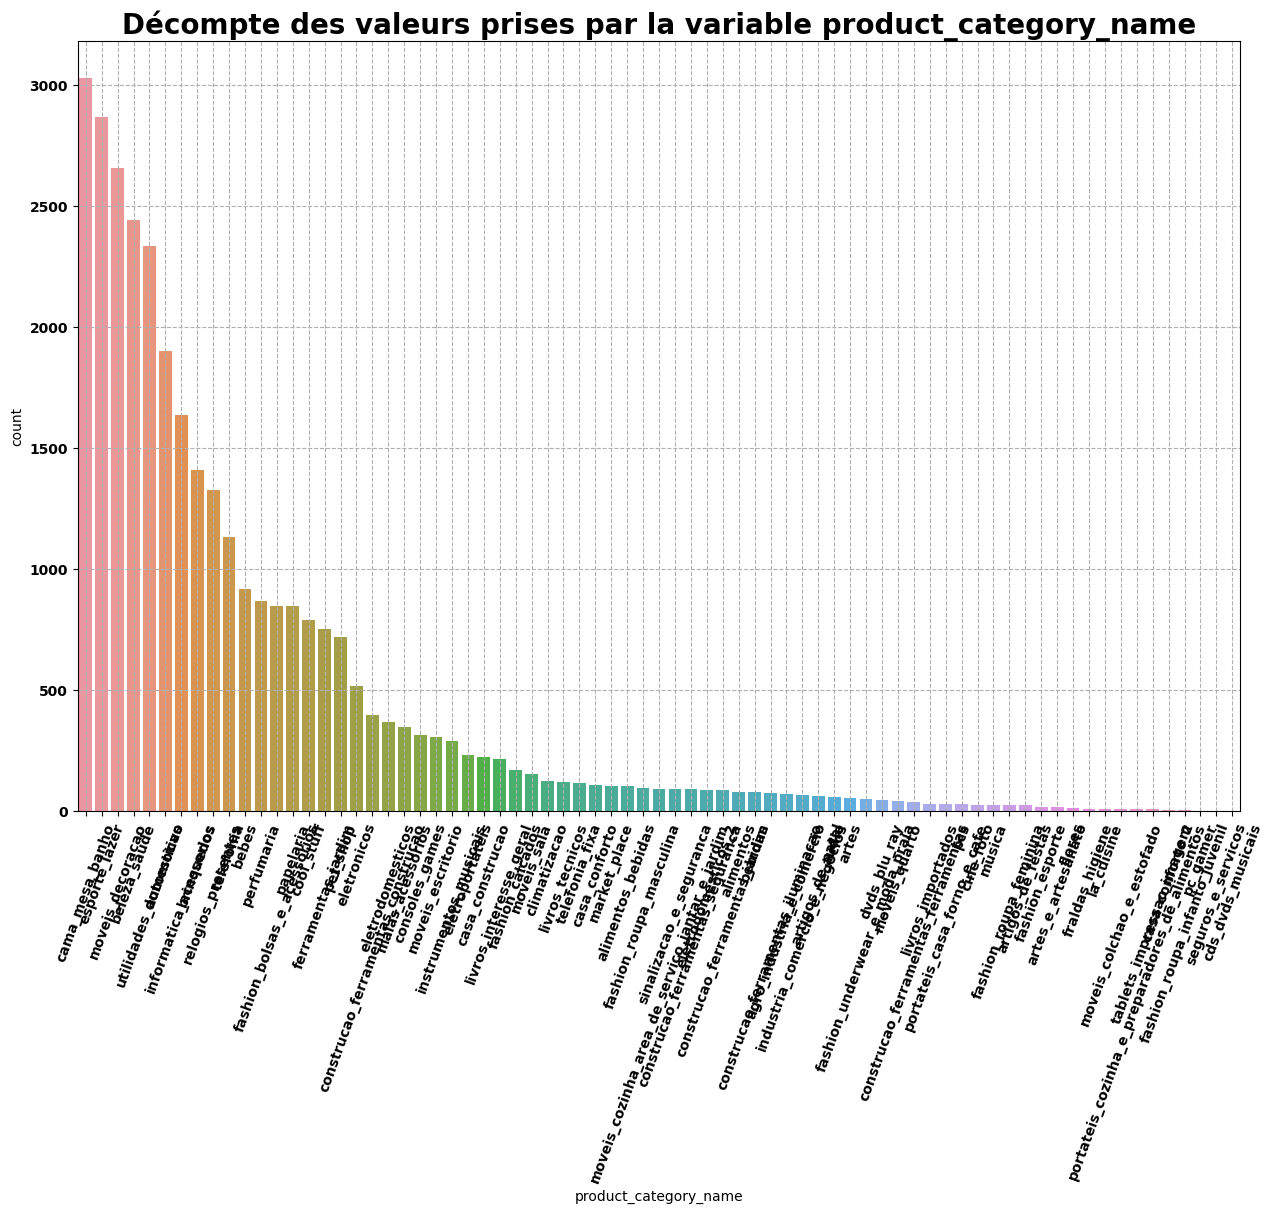

In [88]:
#Valeurs prises par la variable payment_type

plt.figure(figsize = (15,10))
plt.rcParams.update({'font.size' : 10})
plt.title('Décompte des valeurs prises par la variable product_category_name', size = 20, weight = 'bold')
order = products.groupby('product_category_name')['product_id'].count().sort_values(ascending = False).index
sns.countplot(products['product_category_name'] , order = order)
plt.grid(True, ls = '--')
x = plt.xticks(rotation = 70)

In [89]:
#Description des variables quantitatives

products.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

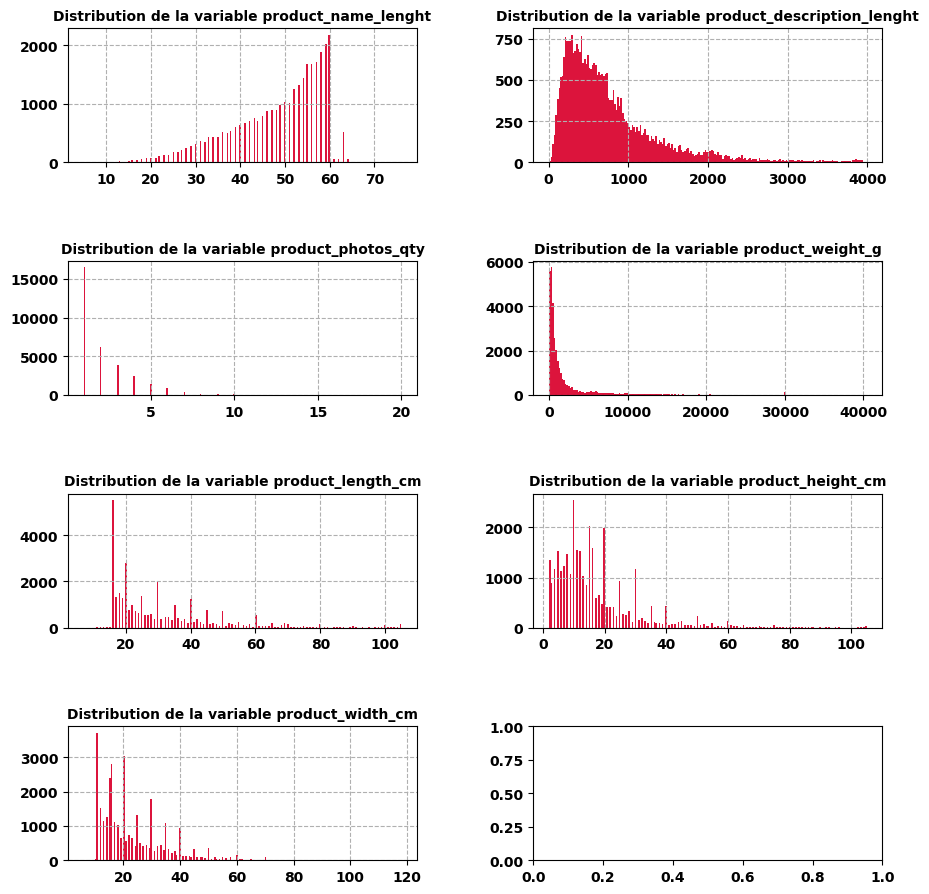

In [90]:
#Affichage des distributions des variables quantitatives

products_numerical_features = products.describe().columns
fig, axes = plt.subplots(4,2, figsize = (10,10))
fig.tight_layout(pad=5.0)
for i, ax in zip(products_numerical_features, axes.ravel()):
    h = ax.hist(products[i], bins = 200, color = 'crimson')
    ax.grid(True, ls = '--')
    ax.set_title('Distribution de la variable {}'.format(i), size = 10, weight = 'bold')

## 2.6- Order_Items

In [91]:
#Affichage des 5 premières lignes

order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [92]:
#Nous n'avons pas de valeur manquante

order_items.isna().mean()

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [93]:
#Description du jeu de données

order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

In [94]:
#Nous avons plusieurs commandes concernées par un même objet

order_items['order_id'].duplicated().sum()

13984

In [95]:
#Nous avons plusieurs produits concernées par la même commande

order_items['product_id'].duplicated().sum()

79699

In [96]:
#Pour chaque commande par produit, nous avons un seul product_order_id

order_items[['order_id', 'product_id', 'order_item_id']].duplicated().sum()

0

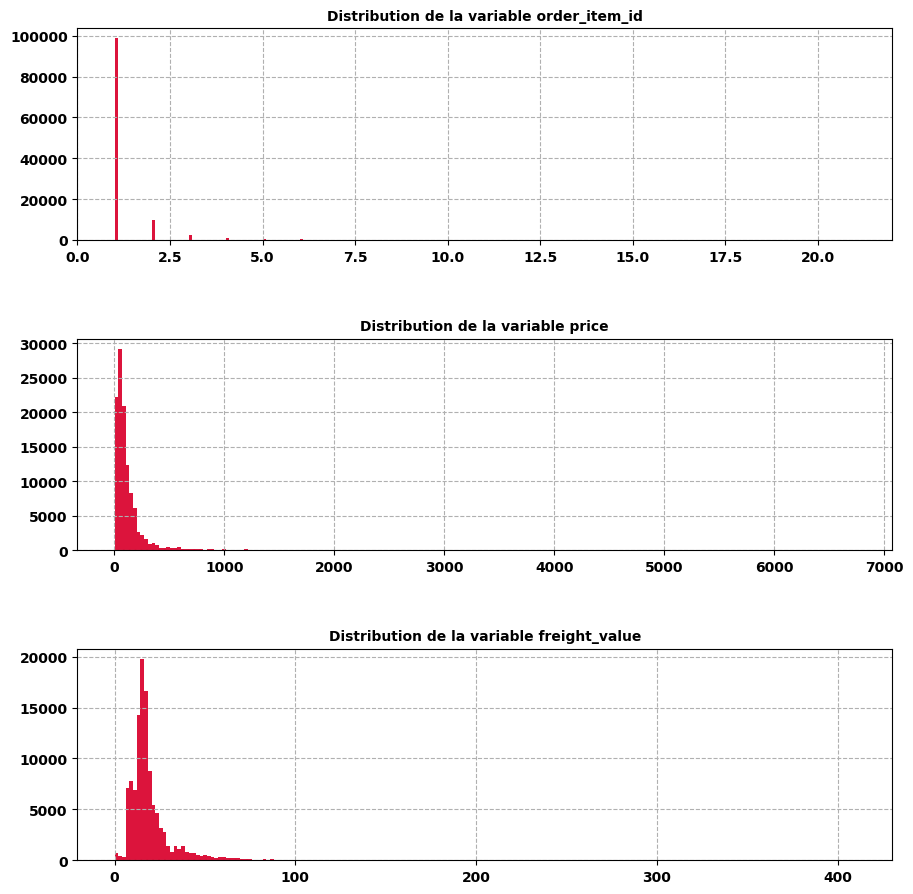

In [97]:
#Affichage des distributions des variables quantitatives

order_items_numerical_features = order_items.describe().columns
fig, axes = plt.subplots(3,1, figsize = (10,10))
fig.tight_layout(pad=5.0)
for i, ax in zip(order_items_numerical_features, axes.ravel()):
    h = ax.hist(order_items[i], bins = 200, color = 'crimson')
    ax.grid(True, ls = '--')
    ax.set_title('Distribution de la variable {}'.format(i), size = 10, weight = 'bold')

## 2.7- Sellers

In [98]:
#Affichage des 5 premières lignes

sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [99]:
#Aucune valeur manquante

sellers.isna().mean()

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

In [100]:
#Aucune valeur dupliquée

sellers['seller_id'].duplicated().sum()

0

Text(200, 7, 'Ecart-type du nombre de valeurs : 29.383874839114963')

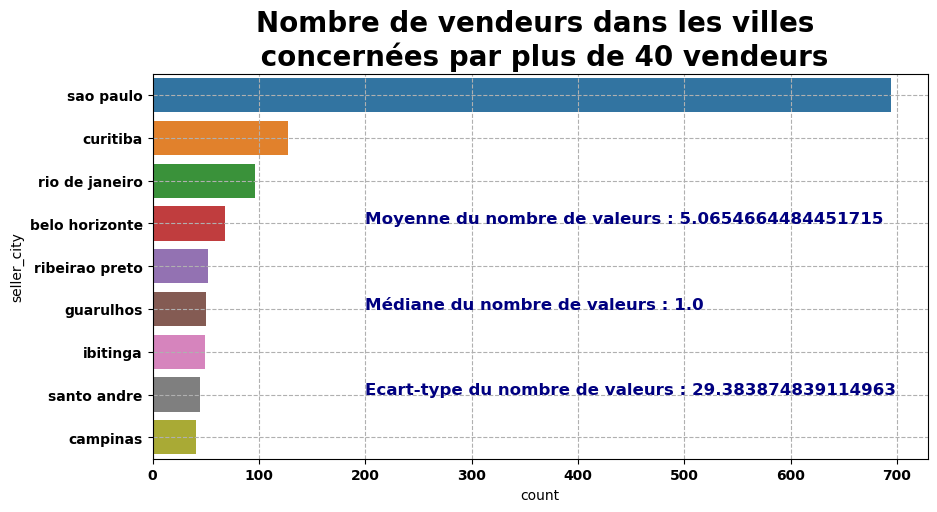

In [101]:
#Affichage du nombre d'occurence de chaque valeur de la variable 'customer_city'

plt.figure(figsize=(10, 5))
city_count = sellers['seller_city'].value_counts()
order = city_count.loc[city_count > 40].index
sns.countplot(y="seller_city", order=order, data=sellers.loc[sellers['seller_city'].isin(order)]);
plt.grid(True, ls = '--')
plt.title('Nombre de vendeurs dans les villes \n concernées par plus de 40 vendeurs', size = 20, fontweight = 'bold')
plt.text(200, 3, 'Moyenne du nombre de valeurs : {}'.format(city_count.mean()), size = 12, fontweight = 'bold',
        color = 'navy')
plt.text(200, 5, 'Médiane du nombre de valeurs : {}'.format(city_count.median()), size = 12, fontweight = 'bold',
        color = 'navy')
plt.text(200, 7, 'Ecart-type du nombre de valeurs : {}'.format(city_count.std()), size = 12, fontweight = 'bold',
        color = 'navy')

Text(400, 7, 'Ecart-type du nombre de valeurs : 385.49824030808804')

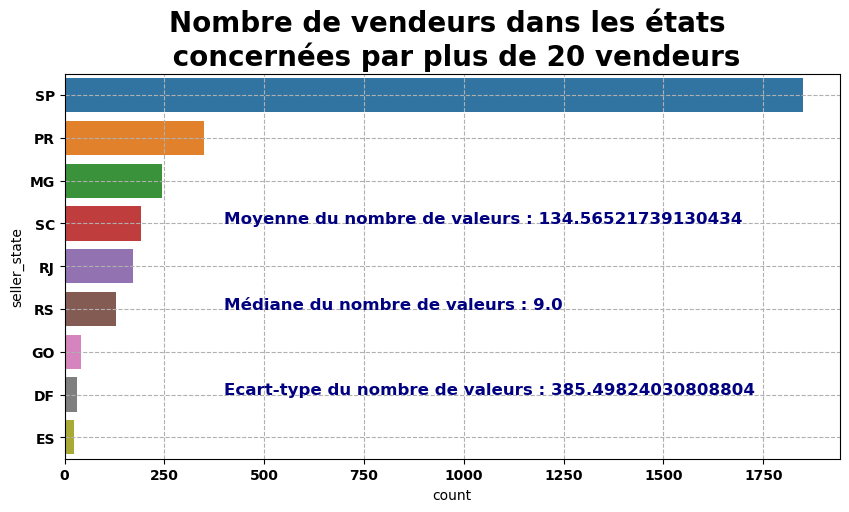

In [102]:
#Affichage du nombre d'occurence de chaque valeur de la variable 'customer_city'

plt.figure(figsize=(10, 5))
state_count = sellers['seller_state'].value_counts()
order = state_count.loc[state_count > 20].index
sns.countplot(y="seller_state", order=order, data=sellers.loc[sellers['seller_state'].isin(order)]);
plt.grid(True, ls = '--')
plt.title('Nombre de vendeurs dans les états \n concernées par plus de 20 vendeurs', size = 20, fontweight = 'bold')
plt.text(400, 3, 'Moyenne du nombre de valeurs : {}'.format(state_count.mean()), size = 12, fontweight = 'bold',
        color = 'navy')
plt.text(400, 5, 'Médiane du nombre de valeurs : {}'.format(state_count.median()), size = 12, fontweight = 'bold',
        color = 'navy')
plt.text(400, 7, 'Ecart-type du nombre de valeurs : {}'.format(state_count.std()), size = 12, fontweight = 'bold',
        color = 'navy')

## 2.8- Geolocation

In [103]:
#Changement du type de la variable 'geolocation_zip_code_prefix'

geolocation['geolocation_zip_code_prefix'] = geolocation['geolocation_zip_code_prefix'].astype(str)

In [104]:
#Affichag des 5 premirèes lignes

geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                        1037       -23.545621       -46.639292   
1                        1046       -23.546081       -46.644820   
2                        1046       -23.546129       -46.642951   
3                        1041       -23.544392       -46.639499   
4                        1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [105]:
#Valeurs manquantes

geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [106]:
#Description des variables quantitatives du jeu de données

geolocation.describe()

geolocation_lat  geolocation_lng
count     1.000163e+06     1.000163e+06
mean     -2.117615e+01    -4.639054e+01
std       5.715866e+00     4.269748e+00
min      -3.660537e+01    -1.014668e+02
25%      -2.360355e+01    -4.857317e+01
50%      -2.291938e+01    -4.663788e+01
75%      -1.997962e+01    -4.376771e+01
max       4.506593e+01     1.211054e+02

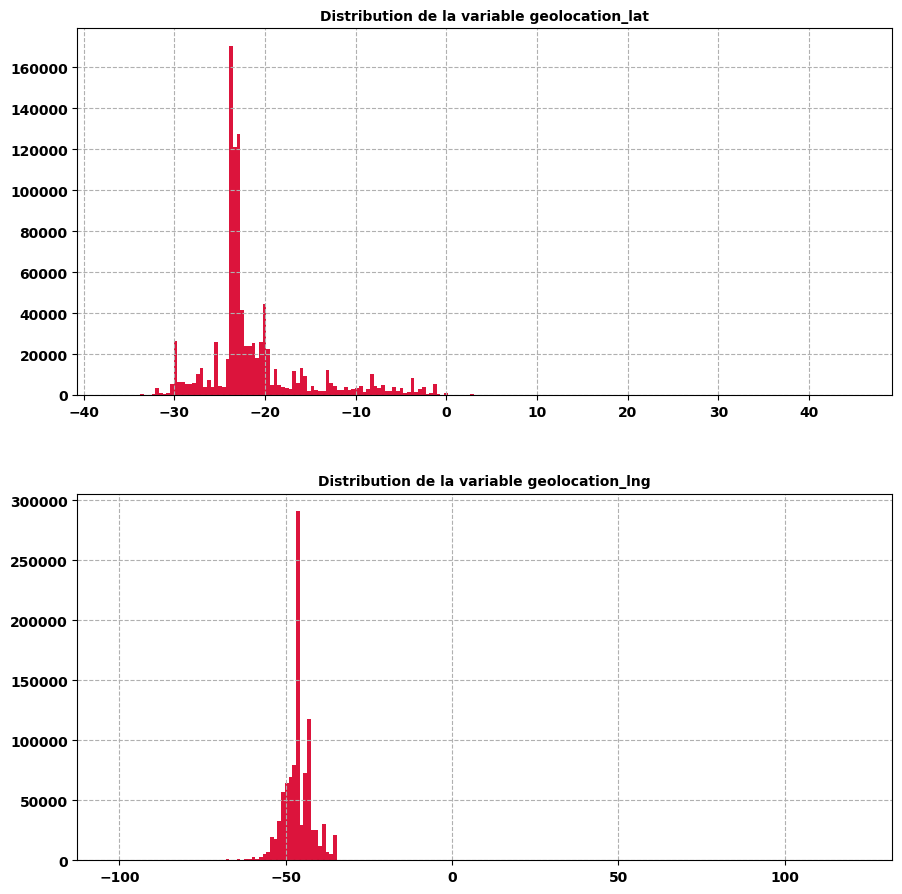

In [107]:
#Affichage des distributions des variables quantitatives

geolocation_numerical_features = geolocation.describe().columns
fig, axes = plt.subplots(2,1, figsize = (10,10))
fig.tight_layout(pad=5.0)
for i, ax in zip(geolocation_numerical_features, axes.ravel()):
    h = ax.hist(geolocation[i], bins = 200, color = 'crimson')
    ax.grid(True, ls = '--')
    ax.set_title('Distribution de la variable {}'.format(i), size = 10, weight = 'bold')

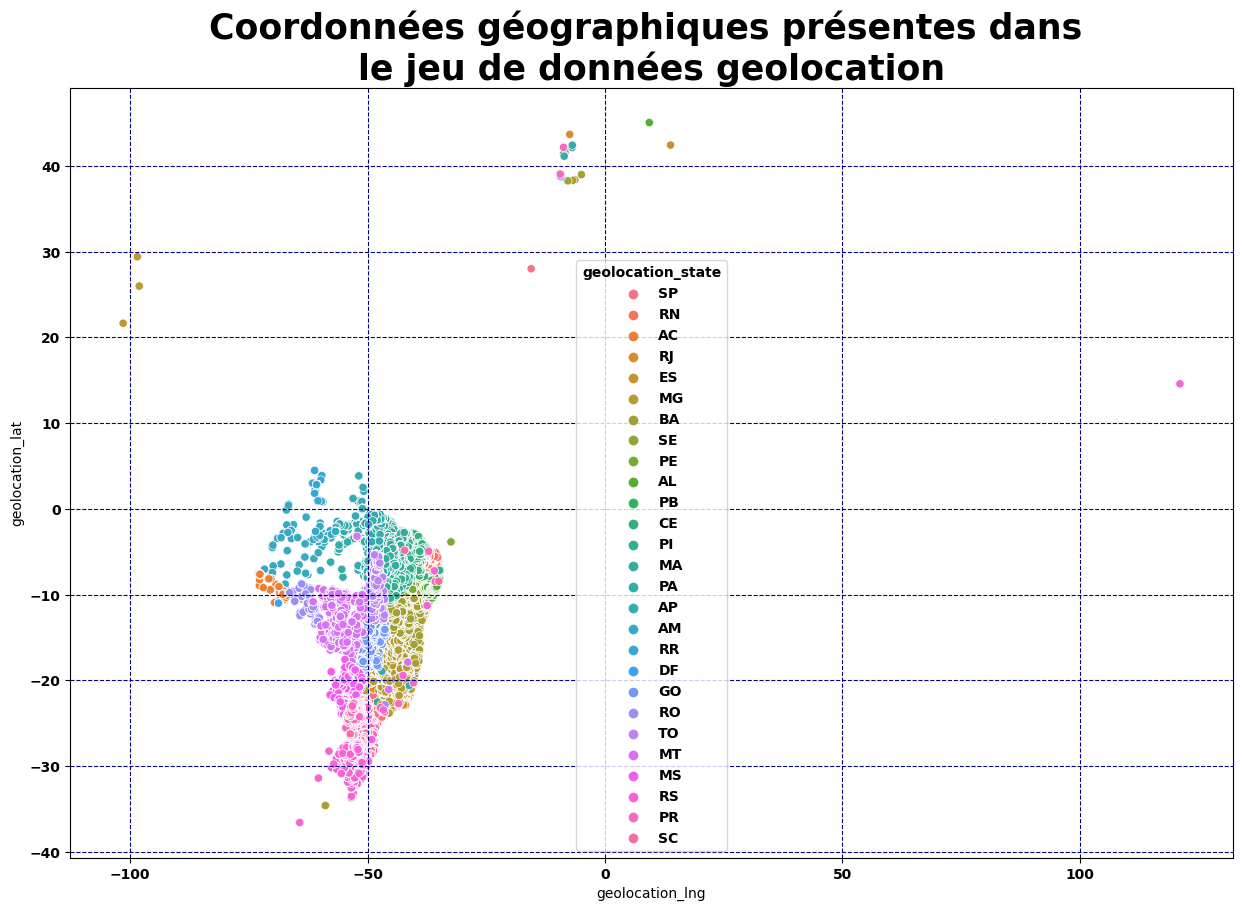

In [108]:
#Scatterplot des coordonnées géographiques du jeu de données géolocation

plt.rcParams.update({'font.size' : 10})
plt.figure(figsize = (15,10))
plt.title('Coordonnées géographiques présentes dans \nle jeu de données geolocation', size = 25, weight = 'bold')
sns.scatterplot(data = geolocation, x = 'geolocation_lng', y = 'geolocation_lat', hue = 'geolocation_state')
plt.grid(True, ls = '--', color = 'navy')

In [109]:
#Projection sur les coordonnées dont la latitude est supérieure à 10

geolocation.loc[geolocation['geolocation_lat'] > 10]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
387565                       18243        28.008978       -15.536867   
513631                       28165        41.614052        -8.411675   
513754                       28155        42.439286        13.820214   
514429                       28333        38.381672        -6.328200   
516682                       28595        43.684961        -7.411080   
538512                       29654        29.409252       -98.484121   
538557                       29654        21.657547      -101.466766   
585242                       35179        25.995203       -98.078544   
585260                       35179        25.995245       -98.078533   
695377                       45936        38.323939        -6.775035   
697048                       46560        38.991963        -4.947823   
698466                       47310        38.268205        -7.803886   
727755                       57319        45.065933         9.341528   
732362                       58441        41.385328        -8.717342   
769333                       68275        41.146203        -8.577855   
769351                       68275        42.166805        -6.898531   
769391                       68275        42.167251        -6.898559   
769436                       68275        42.167251        -6.898559   
769489                       68275        42.167251        -6.898559   
769924                       68379        38.713128        -9.135741   
770534                       68447        42.428884        -6.873344   
822529                       78131        38.816816        -9.394625   
860562                       83252        42.184003        -8.723762   
860832                       83252        42.184003        -8.723762   
865611                       83810        39.057629        -9.400037   
965687                       95130        14.585073       121.105394   

               geolocation_city geolocation_state  
387565  bom retiro da esperanca                SP  
513631      vila nova de campos                RJ  
513754              santa maria                RJ  
514429                   raposo                RJ  
516682                  portela                RJ  
538512   santo antônio do canaã                ES  
538557   santo antonio do canaa                ES  
585242       santana do paraíso                MG  
585260       santana do paraiso                MG  
695377                 itabatan                BA  
697048                 ibiajara                BA  
698466       santana do sobrado                BA  
727755               pau d'arco                AL  
732362         são josé da mata                PB  
769333          porto trombetas                PA  
769351          porto trombetas                PA  
769391          porto trombetas                PA  
769436          porto trombetas                PA  
769489          porto trombetas                PA  
769924       castelo dos sonhos                PA  
770534         vila dos cabanos                PA  
822529            varzea grande                MT  
860562       ilha dos valadares                PR  
860832       ilha dos valadares                PR  
865611   areia branca dos assis                PR  
965687      santa lucia do piai                RS

In [110]:
#On place les villes concernées dans une liste

Outliers_city = geolocation.loc[geolocation['geolocation_lat'] > 10, 'geolocation_city'].unique()

In [111]:
#On s'assure que l'on a assez d'occurences de chaque ville dans le jeu de données

Non_outliers = geolocation.loc[geolocation['geolocation_lat'] < 10]
Nb_city = []

for i in Outliers_city:
    Nb_city.append(len(Non_outliers.loc[Non_outliers['geolocation_city'] == i]))

City_count = pd.DataFrame({'City' : Outliers_city, 'Number_available' : Nb_city}).sort_values(by = 'Number_available', ascending = False)
City_count

City  Number_available
2               santa maria              2039
17            varzea grande               371
8        santana do paraiso                84
9                  itabatan                12
7        santana do paraíso                 9
12               pau d'arco                 8
4                   portela                 7
3                    raposo                 5
19   areia branca dos assis                 4
1       vila nova de campos                 3
11       santana do sobrado                 3
14          porto trombetas                 3
6    santo antonio do canaa                 2
13         são josé da mata                 1
15       castelo dos sonhos                 1
16         vila dos cabanos                 1
10                 ibiajara                 1
18       ilha dos valadares                 0
0   bom retiro da esperanca                 0
5    santo antônio do canaã                 0
20      santa lucia do piai                 0

In [112]:
#On place les états concernées dans une liste

Outliers_state = geolocation.loc[geolocation['geolocation_lat'] > 10, 'geolocation_state'].unique()

In [113]:
#On s'assure que l'on a assez d'occurences de chaque état dans le jeu de données

Non_outliers = geolocation.loc[geolocation['geolocation_lat'] < 10]
Nb_state = []

for i in Outliers_state:
    Nb_state.append(len(Non_outliers.loc[Non_outliers['geolocation_state'] == i]))

State_count = pd.DataFrame({'State' : Outliers_state, 'Number_available' : Nb_state}).sort_values(by = 'Number_available', ascending = False)
State_count

State  Number_available
0     SP            404267
3     MG            126334
1     RJ            121165
10    RS             61850
9     PR             57856
4     BA             36042
2     ES             16746
8     MT             12030
7     PA             10846
6     PB              5537
5     AL              4182

In [114]:
#On récupère les index des valeurs abérrantes

outliers_index = geolocation.loc[geolocation['geolocation_lat'] > 10].index

In [115]:
#Modification des valeurs abérrantes

for i in outliers_index:
    state = geolocation.iloc[i]['geolocation_state']
    lat_median = geolocation.loc[geolocation['geolocation_state'] == state, 'geolocation_lat'].median()
    lng_median = geolocation.loc[geolocation['geolocation_state'] == state, 'geolocation_lng'].median()
    geolocation.loc[geolocation.index == i, 'geolocation_lat'] = lat_median
    geolocation.loc[geolocation.index == i, 'geolocation_lng'] = lng_median

C:\Users\eyoun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


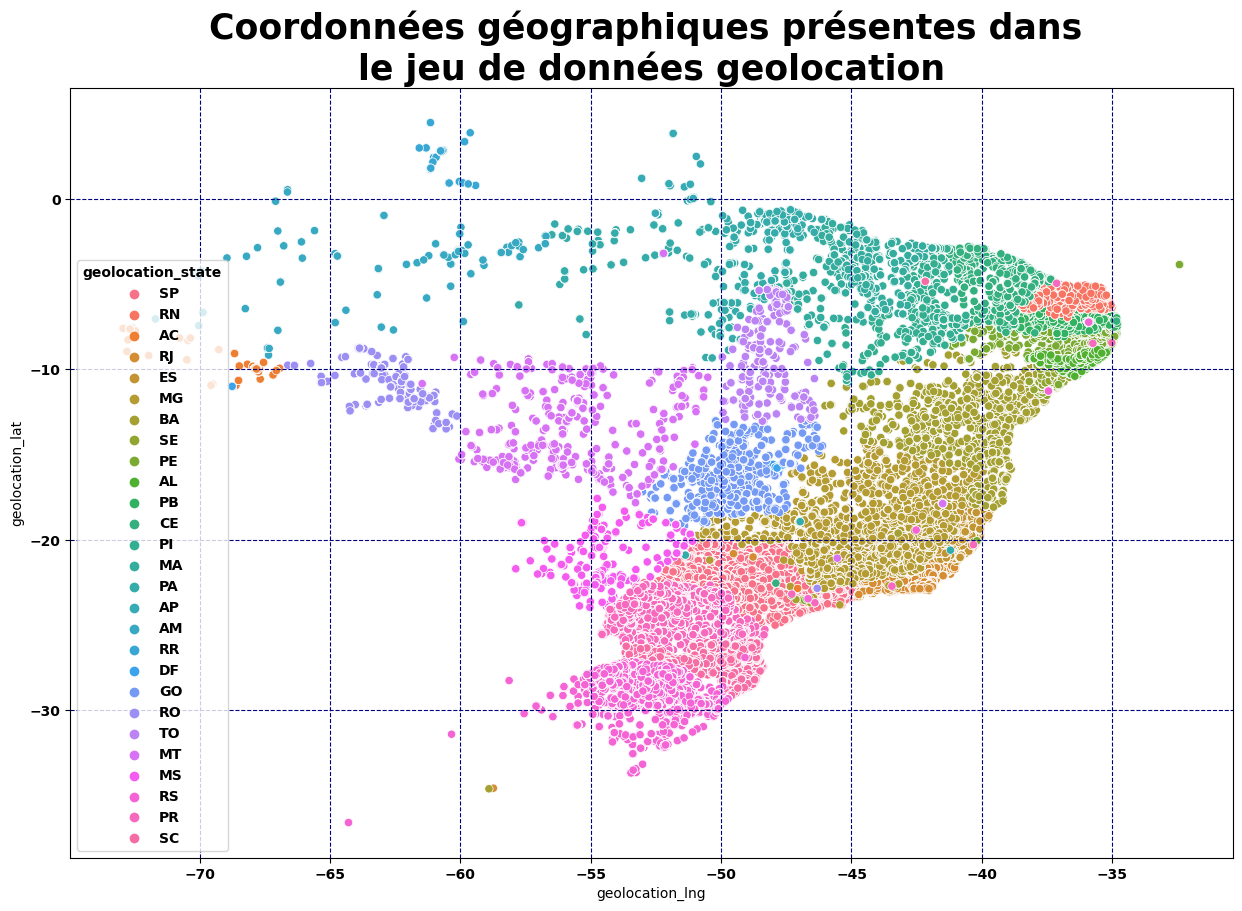

In [116]:
#Scatterplot des coordonnées géographiques du jeu de données géolocation

plt.rcParams.update({'font.size' : 10})
plt.figure(figsize = (15,10))
plt.title('Coordonnées géographiques présentes dans \nle jeu de données geolocation', size = 25, weight = 'bold')
sns.scatterplot(data = geolocation, x = 'geolocation_lng', y = 'geolocation_lat', hue = 'geolocation_state')
plt.grid(True, ls = '--', color = 'navy')

In [117]:
#Importation du module IsolationForest

from sklearn.ensemble import IsolationForest

In [118]:
#On place les états dans une liste et on crée la variable 'Outliers_labels' pour identifier les valeurs abérrantes

states = geolocation['geolocation_state'].unique()
geolocation['Outliers_labels'] = np.nan

In [119]:
#On détecte les outliers avec une contamination égale à 0.005, et on place les étiquettes dans la variable Outliers_labels

for i in states:
    IF = IsolationForest(contamination = 0.005)
    index = geolocation[geolocation['geolocation_state'] == i].index
    temp = geolocation.loc[geolocation['geolocation_state'] == i, ['geolocation_lat', 'geolocation_lng']]
    geolocation.loc[geolocation['geolocation_state'] == i, 'Outliers_labels'] = IF.fit_predict(temp)

C:\Users\eyoun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\eyoun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\eyoun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\eyoun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\eyoun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\eyoun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have va

In [120]:
#Décompte des individus détectés comme outliers via l'IsolationForest

geolocation['Outliers_labels'].value_counts()

 1.0    995310
-1.0      4853
Name: Outliers_labels, dtype: int64

C:\Users\eyoun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


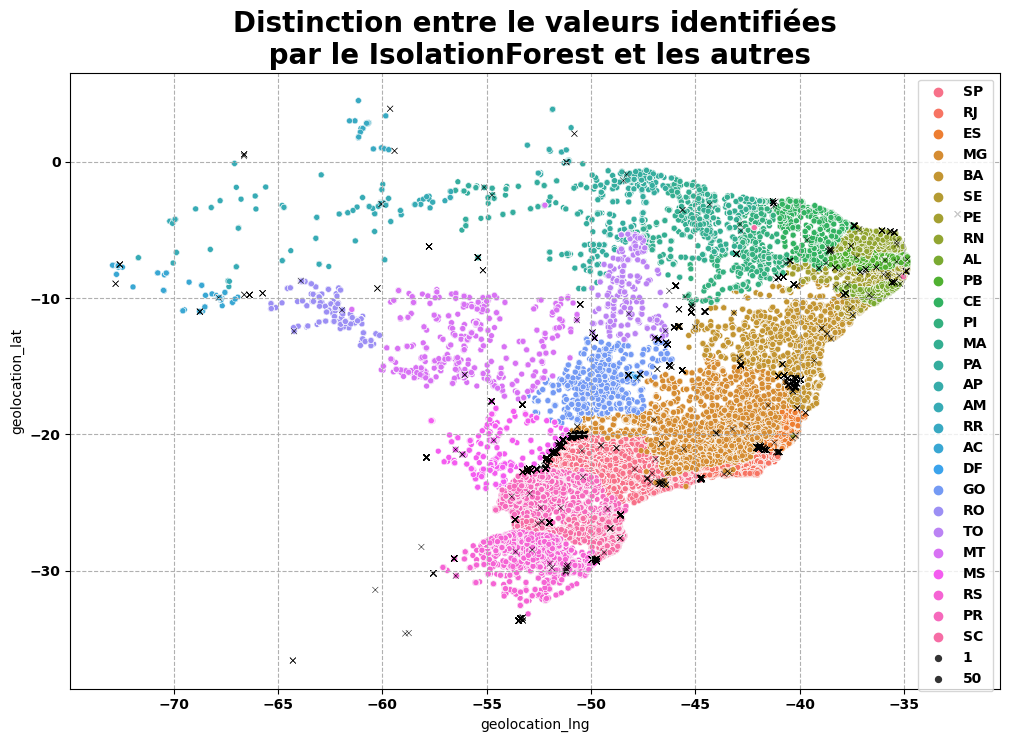

In [121]:
#Affichage des outliers trouvés par l'IsolationForest

plt.rcParams.update({'font.size' : 10})
plt.figure(figsize = (12,8))
plt.title('Distinction entre le valeurs identifiées\n par le IsolationForest et les autres', size = 20, weight = 'bold')
clean = geolocation.loc[geolocation['Outliers_labels'] == 1]
out = geolocation.loc[geolocation['Outliers_labels'] == -1]
sns.scatterplot(data = clean, x = 'geolocation_lng', y = 'geolocation_lat', hue = 'geolocation_state', size = 1)
sns.scatterplot(data = out, x = 'geolocation_lng', y = 'geolocation_lat', marker = 'x', size = 50, color = 'black')
plt.grid(True, ls = '--')
plt.legend()

In [122]:
#On récupère les index des valeurs abérrantes

outliers_index = geolocation.loc[geolocation['Outliers_labels'] == -1].index

In [123]:
#Modification des valeurs abérrantes

for i in outliers_index:
    state = geolocation.iloc[i]['geolocation_state']
    lat_median = geolocation.loc[geolocation['geolocation_state'] == state, 'geolocation_lat'].median()
    lng_median = geolocation.loc[geolocation['geolocation_state'] == state, 'geolocation_lng'].median()
    geolocation.loc[geolocation.index == i, 'geolocation_lat'] = lat_median
    geolocation.loc[geolocation.index == i, 'geolocation_lng'] = lng_median

C:\Users\eyoun\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


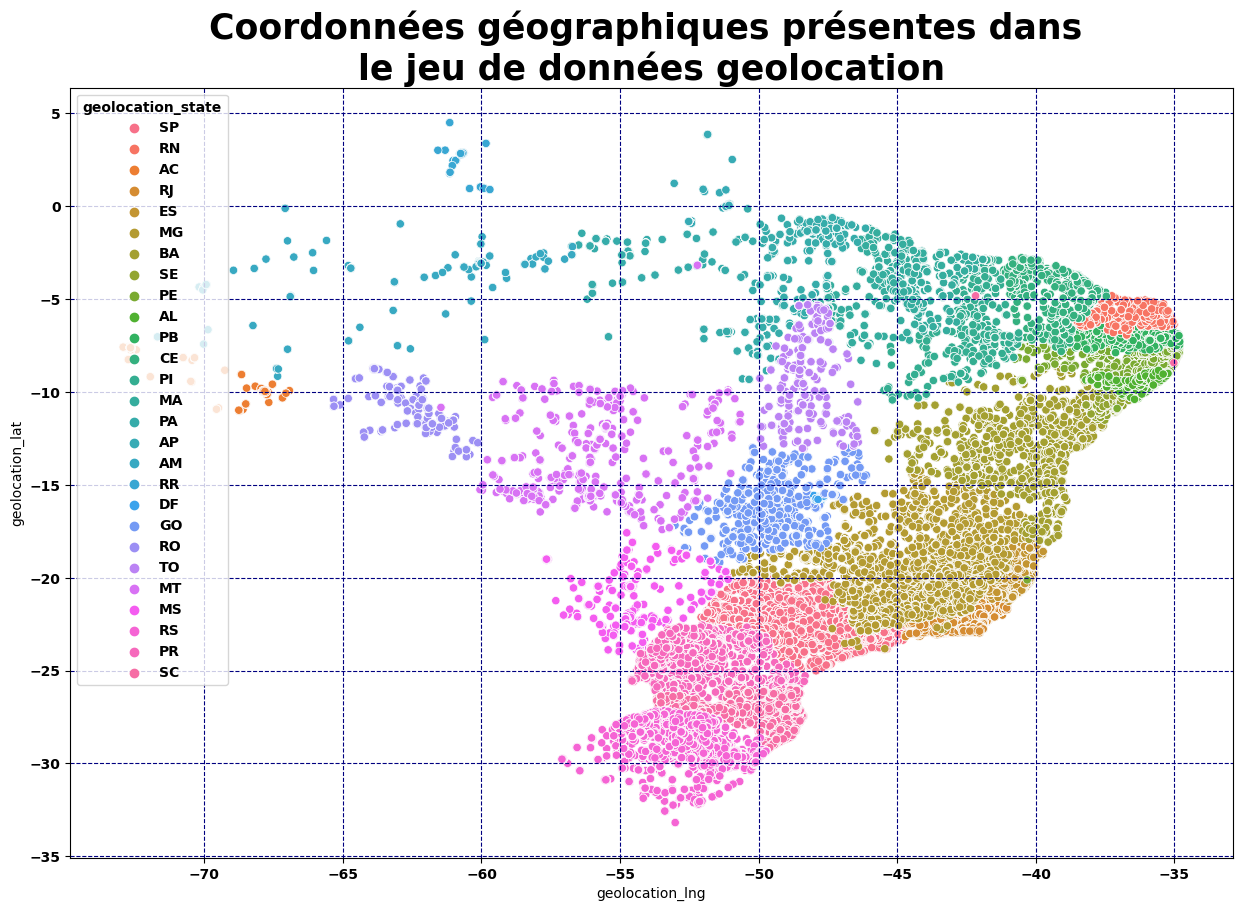

In [124]:
#Affichage de la carte finale

plt.rcParams.update({'font.size' : 10})
plt.figure(figsize = (15,10))
plt.title('Coordonnées géographiques présentes dans \nle jeu de données geolocation', size = 25, weight = 'bold')
sns.scatterplot(data = geolocation, x = 'geolocation_lng', y = 'geolocation_lat', hue = 'geolocation_state')
plt.grid(True, ls = '--', color = 'navy')

# 3- Construction du jeu de données final

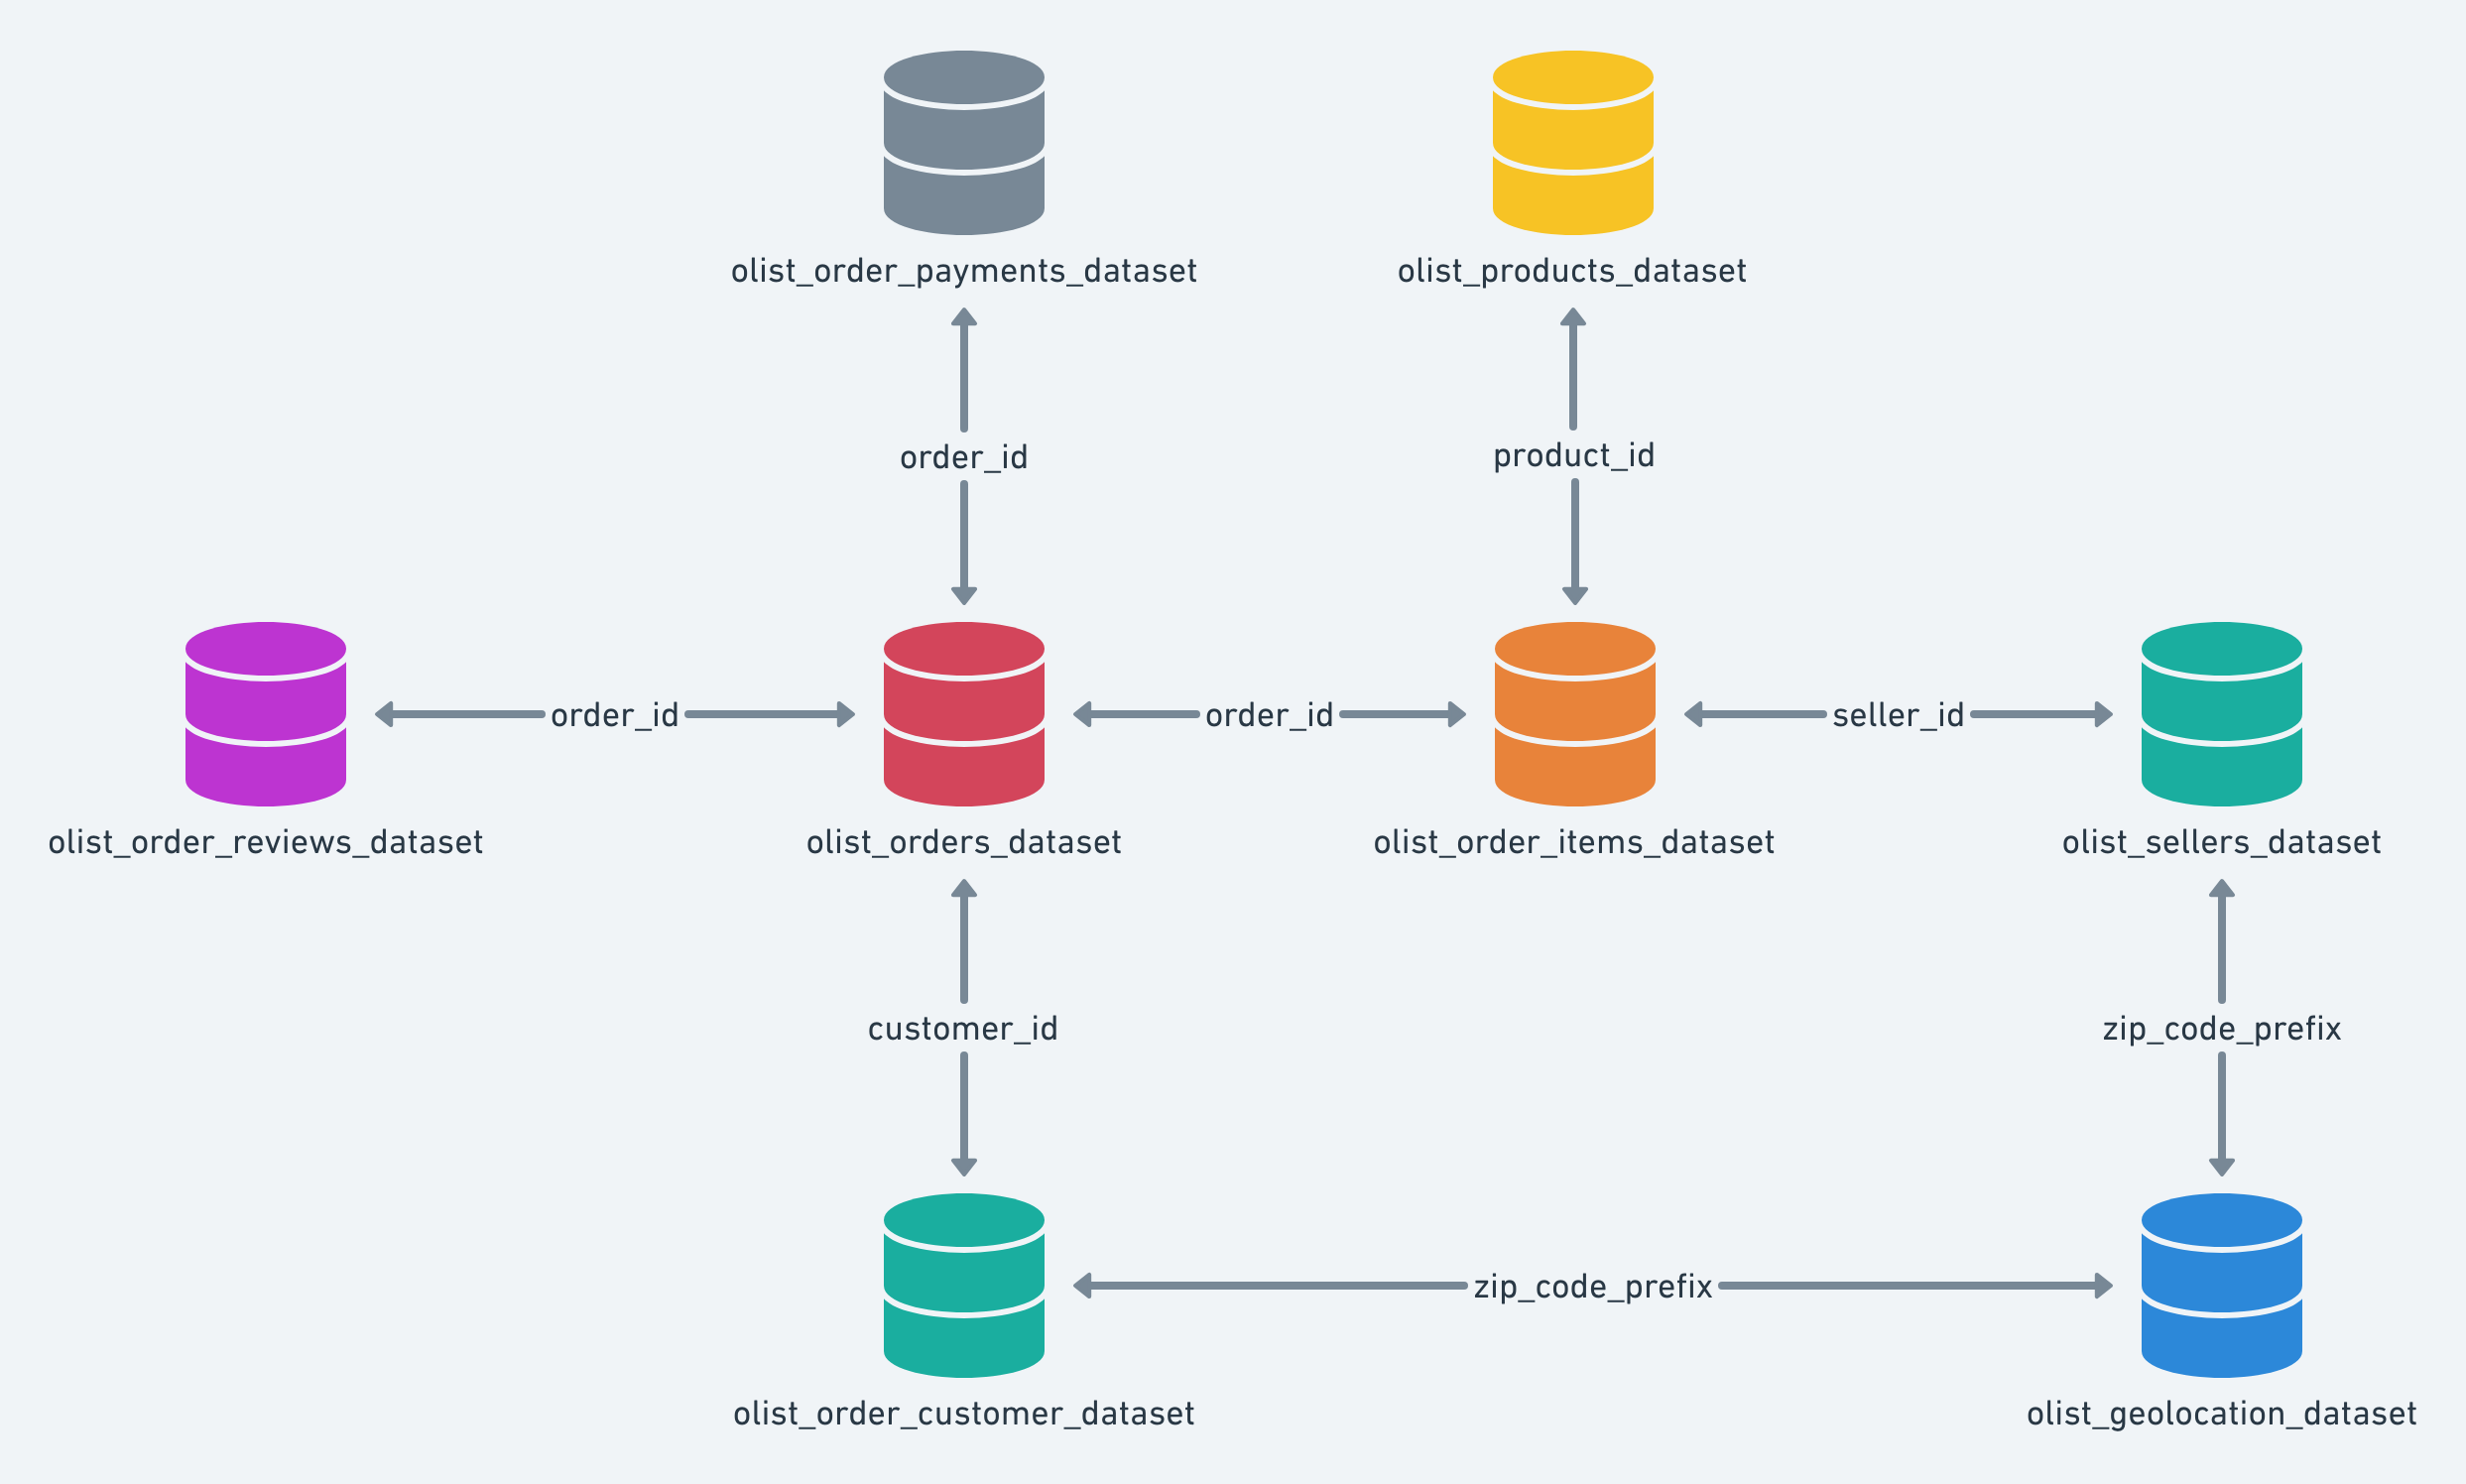

In [125]:
#Liens entre nos jeux de données

Image.open('Data_Scheme.png')

## 3.1- Extraction des features RFM

In [126]:
#Nous commencons créer la liste des unique_customer_id

customer_unique_id = customers['customer_unique_id'].unique()
customer_unique_id.shape

(96096,)

In [127]:
#Nous mergeons les deux jeux de données customers et orders en un jeu de données data

data = customers.merge(orders, left_on = 'customer_id', right_on = 'customer_id', how = 'left')

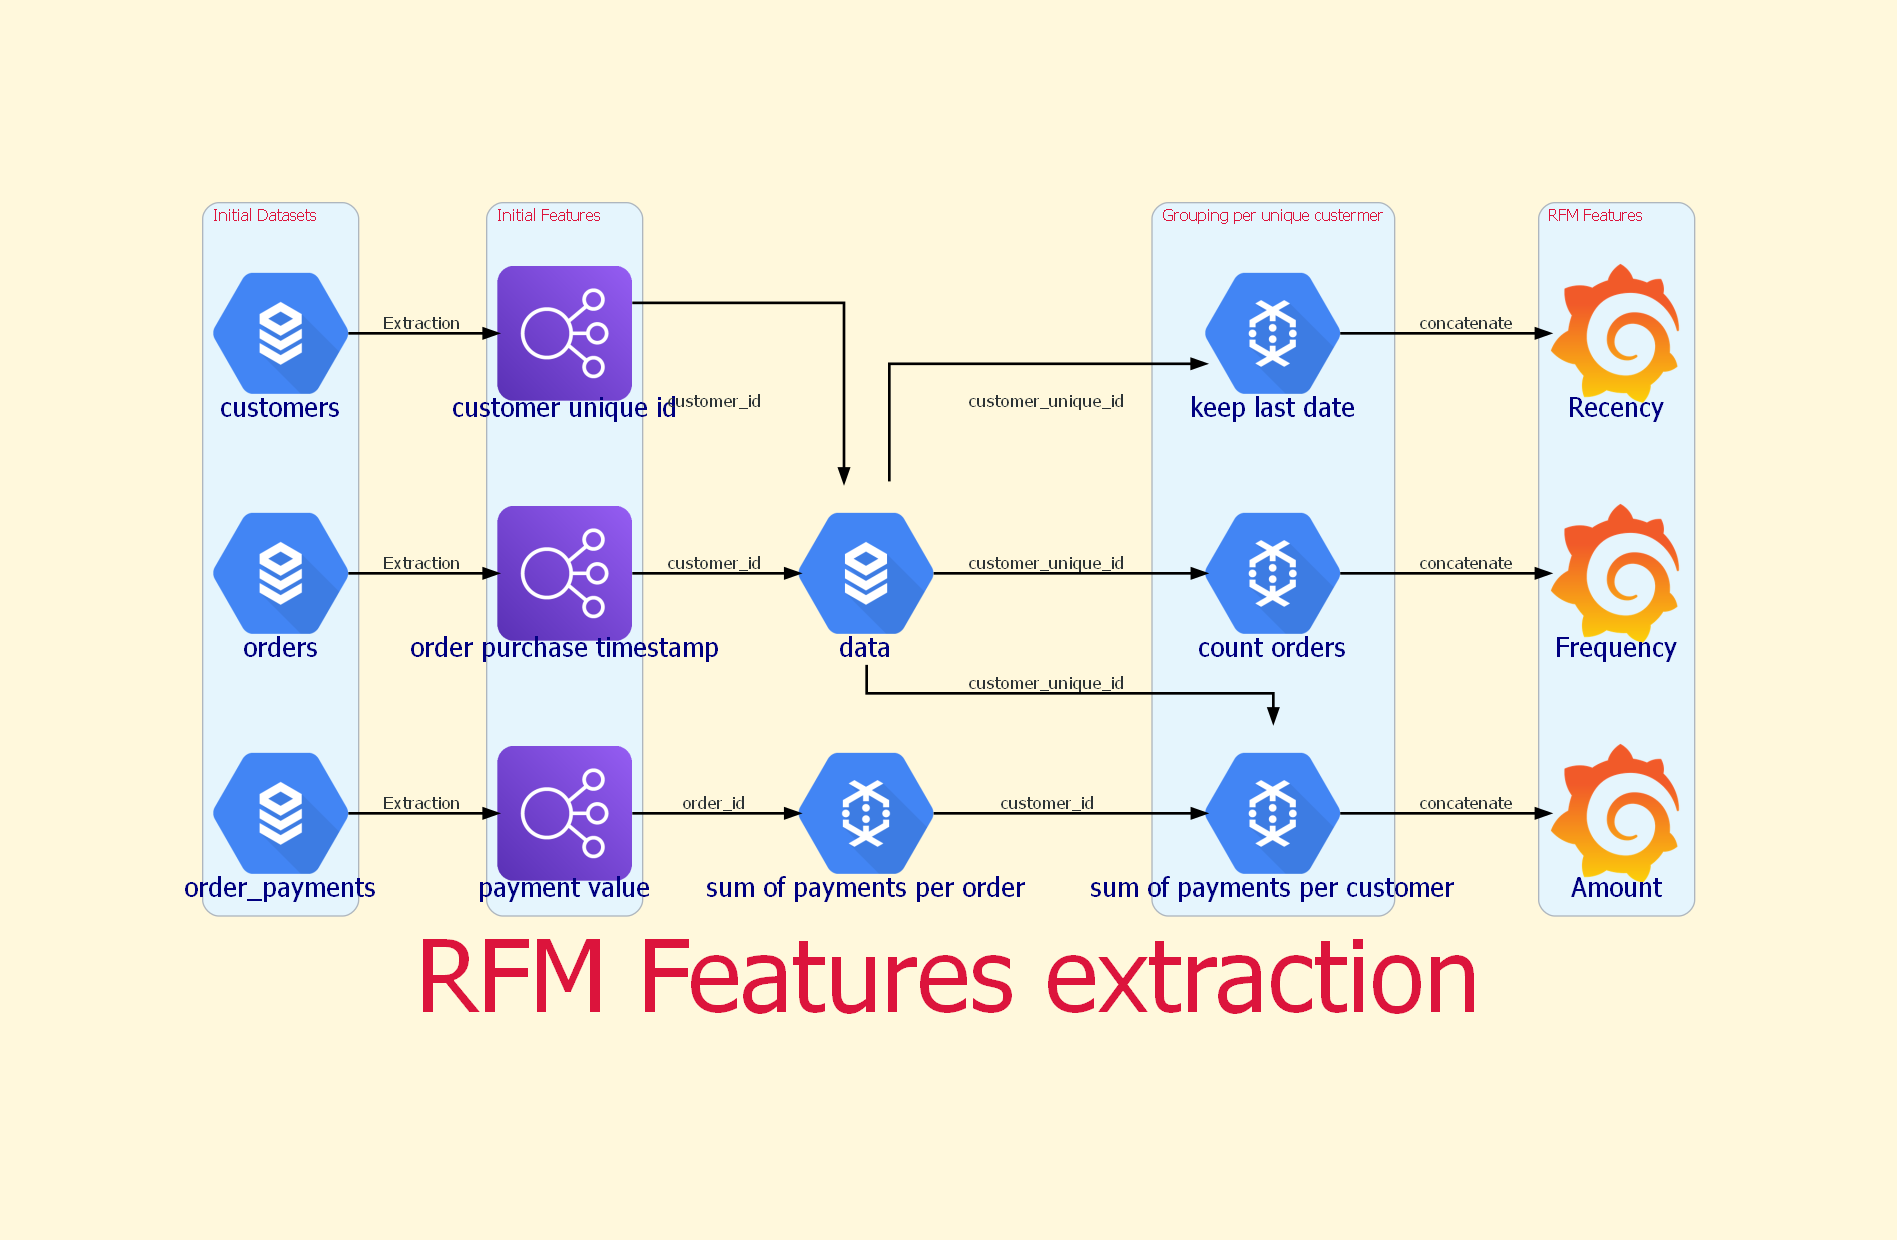

In [128]:
from diagrams import Cluster
from diagrams.onprem.monitoring import Grafana
from diagrams.aws.integration import SQS
from diagrams.gcp.analytics import Dataflow
from diagrams.aws.network import ELB

graph_attr = {
    "fontsize": "75",
    "bgcolor": "cornsilk", 'lwidth' : '10', 'fontcolor' : 'crimson', 'fontweight' : 'bold'}

node_attr = {
    "fontsize": "20",
    "fontcolor": "navy", 'fontweight' : 'bold'}

with Diagram('RFM Features extraction', graph_attr = graph_attr, node_attr = node_attr) as diag:
    with Cluster('Initial Datasets'):
        clients = SQL('customers', style = 'bold')
        commandes = SQL('orders', style = 'bold')
        paiements = SQL('order_payments', style = 'bold')
    
    data_df = SQL('data', style = 'bold')
    
    with Cluster('Initial Features'):
        customer_unique_id = ELB('customer unique id', style = 'bold')
        last_order_date = ELB('order purchase timestamp', style = 'bold')
        payment_value = ELB('payment value', style = 'bold')

    sum_orders_amounts = Dataflow('sum of payments per order', style = 'bold')
    
    with Cluster('Grouping per unique custermer'):
        keep_last_date = Dataflow('keep last date', style = 'bold')
        orders_count = Dataflow('count orders', style = 'bold')
        sum_customers_amounts = Dataflow('sum of payments per customer', style = 'bold')
    
    
    with Cluster('RFM Features'):
        recency = Grafana('Recency')
        frequency = Grafana('Frequency')
        amount = Grafana('Amount')
    
        clients >> Edge(label = 'Extraction', color = 'black', style = 'bold') >> customer_unique_id
        commandes >> Edge(label = 'Extraction', color = 'black', style = 'bold') >> last_order_date
        paiements >> Edge(label = 'Extraction', color = 'black', style = 'bold') >> payment_value
        
        customer_unique_id >> Edge(label = 'customer_id', color = 'black', style = 'bold') >> data_df
        last_order_date >> Edge(label = 'customer_id', color = 'black', style = 'bold') >> data_df
        
        payment_value >> Edge(label = 'order_id', color = 'black', style = 'bold') >> sum_orders_amounts
        sum_orders_amounts >> Edge(label = 'customer_id', color = 'black', style = 'bold') >> sum_customers_amounts
        data_df >> Edge(label = 'customer_unique_id', color = 'black', style = 'bold') >> keep_last_date
        data_df >> Edge(label = 'customer_unique_id', color = 'black', style = 'bold') >> orders_count
        
        keep_last_date >> Edge(label = 'concatenate', color = 'black', style = 'bold') >> recency
        orders_count >> Edge(label = 'concatenate', color = 'black', style = 'bold') >> frequency
        sum_customers_amounts >> Edge(label = 'concatenate', color = 'black', style = 'bold') >> amount
        data_df >> Edge(label = 'customer_unique_id', color = 'black', style = 'bold') >> sum_customers_amounts
        data_df >> Edge(label = 'Keep last date', color = 'black', style = 'bold')
diag

### 3.1.1- Récence

In [129]:
#Mise en mémoire de la dernière date du jeu de données

Most_Recent_Date = orders['order_purchase_timestamp'].max()
Most_Recent_Date

Timestamp('2018-10-17 17:30:18')

In [130]:
#On initie la construction du jeu de données avec le customer_unique_id et la dernière date d'achat

init = data[['customer_unique_id', 'order_purchase_timestamp']].sort_values(by = 'order_purchase_timestamp', ascending = False)
init = init.drop_duplicates(subset = ['customer_unique_id'], keep = 'first')

In [131]:
#On crée la variale 'Last_order_time'

init['Last_order_time'] = Most_Recent_Date - init['order_purchase_timestamp']
init = init.drop(['order_purchase_timestamp'], axis = 1)

### 3.1.2- Fréquence

In [132]:
#Intégration du nombre de commandes passées par chaque client

temp = pd.DataFrame(data.groupby('customer_unique_id')['order_id'].count().sort_values())
temp['customer_unique_id'] = temp.index
temp.index = range(len(temp))
init = init.merge(temp, left_on = 'customer_unique_id', right_on = 'customer_unique_id', how = 'left')
init['frequency'] = init['order_id']
init = init.drop(['order_id'], axis = 1)
init.head()

customer_unique_id  Last_order_time  frequency
0  87ab9fec999db8bd5774917de3cdf01c  0 days 00:00:00          1
1  262e1f1e26e92e86375f86840b4ffd63  0 days 21:14:16          2
2  af5454198a97379394cacf676e1e96cb 13 days 22:34:49          3
3  634420a0ea42302205032ed44ac7fccc 16 days 02:00:09          2
4  9bb92bebd4cb7511e1a02d5e50bc4655 18 days 08:17:15          1

### 3.1.3- Montant

In [133]:
#5 premières lignes du jeu de données 'order_payment'

order_payments.head()

order_id  payment_sequential payment_type  \
0      b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
68490  db974c12004fe92ab344e63e8e4b995f                   1  credit_card   
68489  71db292c69a2bff7186b705046336c61                   1  credit_card   
68486  a3a334e8cd38b52f151585bfa1e22190                   1       boleto   
68485  eb270c4cbf3671961f3883e8b888571b                   1       boleto   

       payment_installments  payment_value  
0                         8          99.33  
68490                     7         104.56  
68489                     3          43.68  
68486                     1          98.51  
68485                     1         106.97

In [134]:
#On regroupe les paiements de chaque commande dans le jeu de données data

temp = pd.DataFrame(order_payments.groupby('order_id')['payment_value'].sum().sort_values())
temp['index'] = temp.index
temp['order_id'] = temp['index']
temp.index = range(len(temp))
temp = temp.drop(['index'], axis = 1)
data = data.merge(temp[['order_id', 'payment_value']], right_on = 'order_id', left_on = 'order_id', how = 'left')

In [135]:
init

customer_unique_id   Last_order_time  frequency
0      87ab9fec999db8bd5774917de3cdf01c   0 days 00:00:00          1
1      262e1f1e26e92e86375f86840b4ffd63   0 days 21:14:16          2
2      af5454198a97379394cacf676e1e96cb  13 days 22:34:49          3
3      634420a0ea42302205032ed44ac7fccc  16 days 02:00:09          2
4      9bb92bebd4cb7511e1a02d5e50bc4655  18 days 08:17:15          1
...                                 ...               ...        ...
96091  0eb1ee9dba87f5b36b4613a65074337c 744 days 19:22:26          1
96092  830d5b7aaa3b6f1e9ad63703bec97d23 762 days 05:13:40          1
96093  009b0127b727ab0ba422f6d9604487c7 764 days 02:05:59          1
96094  4854e9b3feff728c13ee5fc7d1547e92 772 days 17:14:44          1
96095  b7d76e111c89f7ebf14761390f0f7d17 772 days 20:14:59          1

[96096 rows x 3 columns]

In [136]:
#Création de la variable payment_value_total

temp = pd.DataFrame(order_payments[['order_id', 'payment_value']].groupby('order_id')['payment_value'].sum())
temp['order_id'] = temp.index
temp.index = range(len(temp))
data = data.merge(temp, how = 'left')
temp2 = pd.DataFrame(data.groupby('customer_unique_id')['payment_value'].sum())
temp2['customer_unique_id'] = temp2.index
temp2.index = range(len(temp2))
temp2['payment_value_total'] = temp2['payment_value']
temp2 = temp2.drop(['payment_value'], axis = 1)
init = init.merge(temp2, how = 'left')

#Création de la variable payment_value_mean

temp = pd.DataFrame(order_payments[['order_id', 'payment_value']].groupby('order_id')['payment_value'].sum())
temp['order_id'] = temp.index
temp.index = range(len(temp))
data = data.merge(temp, how = 'left')
temp2 = pd.DataFrame(data.groupby('customer_unique_id')['payment_value'].mean())
temp2['customer_unique_id'] = temp2.index
temp2.index = range(len(temp2))
temp2['payment_value_mean'] = temp2['payment_value']
temp2 = temp2.drop(['payment_value'], axis = 1)
init = init.merge(temp2, how = 'left')

#Création de la variable payment_value_max

temp = pd.DataFrame(order_payments[['order_id', 'payment_value']].groupby('order_id')['payment_value'].sum())
temp['order_id'] = temp.index
temp.index = range(len(temp))
data = data.merge(temp, how = 'left')
temp2 = pd.DataFrame(data.groupby('customer_unique_id')['payment_value'].max())
temp2['customer_unique_id'] = temp2.index
temp2.index = range(len(temp2))
temp2['payment_value_max'] = temp2['payment_value']
temp2 = temp2.drop(['payment_value'], axis = 1)
init = init.merge(temp2, how = 'left')

#Création de la variable payment_value_min

temp = pd.DataFrame(order_payments[['order_id', 'payment_value']].groupby('order_id')['payment_value'].sum())
temp['order_id'] = temp.index
temp.index = range(len(temp))
data = data.merge(temp, how = 'left')
temp2 = pd.DataFrame(data.groupby('customer_unique_id')['payment_value'].min())
temp2['customer_unique_id'] = temp2.index
temp2.index = range(len(temp2))
temp2['payment_value_min'] = temp2['payment_value']
temp2 = temp2.drop(['payment_value'], axis = 1)
init = init.merge(temp2, how = 'left')

In [137]:
#On compte le nombre de jours depuis la dernière commande

init['Last_order_time'] = init['Last_order_time'].astype('timedelta64[D]').astype(int)

In [138]:
#On complète notre seule valeur manquante

init = init.fillna(0)

In [139]:
#On affiche notre jeu de données avec les features RFM

init.head(15)

customer_unique_id  Last_order_time  frequency  \
0   87ab9fec999db8bd5774917de3cdf01c                0          1   
1   262e1f1e26e92e86375f86840b4ffd63                0          2   
2   af5454198a97379394cacf676e1e96cb               13          3   
3   634420a0ea42302205032ed44ac7fccc               16          2   
4   9bb92bebd4cb7511e1a02d5e50bc4655               18          1   
5   ba84da8c159659f116329563a0a981dd               21          3   
6   9c3af16efacb7aa06aa3bc674556c5d6               22          2   
7   08642cd329066fe11ec63293f714f2f8               27          2   
8   ef0103e9602d12594d19c2b666219bc1               30          3   
9   c1ee153508c6b785b491443a95ff364e               34          1   
10  09687a7b7431a93b5c53b50ba779bf94               36          1   
11  76e5f3bca2b1f5c510c41563c2ea31a4               36          2   
12  d05c44a138277ad325d915c6b7ccbcdf               40          2   
13  230a1e9f42924d41f37fd22a1d4a9707               41          3   
14  0a5dadb73145d29f42f703c97c377ae8               41          1   

    payment_value_total  payment_value_mean  payment_value_max  \
0                 89.71               89.71              89.71   
1                444.06              222.03             222.03   
2                592.65              197.55             197.55   
3                160.76               80.38              80.38   
4                137.03              137.03             137.03   
5                283.89               94.63              94.63   
6                443.08              221.54             221.54   
7                382.92              191.46             191.46   
8                253.74               84.58              84.58   
9                414.04              414.04             414.04   
10               258.67              258.67             258.67   
11               102.34               51.17              51.17   
12               214.26              107.13             107.13   
13               208.38               69.46              69.46   
14              2266.61             2266.61            2266.61   

    payment_value_min  
0               89.71  
1              222.03  
2              197.55  
3               80.38  
4              137.03  
5               94.63  
6              221.54  
7              191.46  
8               84.58  
9              414.04  
10             258.67  
11              51.17  
12             107.13  
13              69.46  
14            2266.61

## 3.2- Ajout de features intéressantes pour notre étude

In [140]:
#On merge le jeu de données data avec les variables order_id et review_score du jeu de données order_reviews

data = data.merge(order_reviews[['order_id', 'review_score']])

In [141]:
#Ajout de la variable review score moyen au jeu de données init

temp = pd.DataFrame(data.groupby('customer_unique_id')['review_score'].mean())
temp['customer_unique_id'] = temp.index
temp['mean_review_score'] = temp['review_score']
temp = temp.drop(['review_score'], axis = 1)
temp.index = range(len(temp))
init = init.merge(temp, how = 'left')

#Ajout de la variable review score minimum au jeu de données init

temp = pd.DataFrame(data.groupby('customer_unique_id')['review_score'].min())
temp['customer_unique_id'] = temp.index
temp['min_review_score'] = temp['review_score']
temp = temp.drop(['review_score'], axis = 1)
temp.index = range(len(temp))
init = init.merge(temp, how = 'left')

#Ajout de la variable review score maximal au jeu de données init

temp = pd.DataFrame(data.groupby('customer_unique_id')['review_score'].max())
temp['customer_unique_id'] = temp.index
temp['max_review_score'] = temp['review_score']
temp = temp.drop(['review_score'], axis = 1)
temp.index = range(len(temp))
init = init.merge(temp, how = 'left')

In [142]:
#Intégration de la somme des payment_installments par commande des clients

temp = pd.DataFrame(order_payments[['order_id', 'payment_installments']].groupby('order_id')['payment_installments'].max())
temp['order_id'] = temp.index
temp.index = range(len(temp))
data = data.merge(temp, how = 'left')
temp2 = pd.DataFrame(data.groupby('customer_unique_id')['payment_installments'].sum())
temp2['customer_unique_id'] = temp2.index
temp2.index = range(len(temp2))
temp2['payment_installments_total'] = temp2['payment_installments']
temp2 = temp2.drop(['payment_installments'], axis = 1)
init = init.merge(temp2, how = 'left')

#Intégration du maximum des payment_installments par commande des clients

temp = pd.DataFrame(order_payments[['order_id', 'payment_installments']].groupby('order_id')['payment_installments'].max())
temp['order_id'] = temp.index
temp.index = range(len(temp))
data = data.merge(temp, how = 'left')
temp2 = pd.DataFrame(data.groupby('customer_unique_id')['payment_installments'].max())
temp2['customer_unique_id'] = temp2.index
temp2.index = range(len(temp2))
temp2['payment_installments_max'] = temp2['payment_installments']
temp2 = temp2.drop(['payment_installments'], axis = 1)
init = init.merge(temp2, how = 'left')

#Intégration du minimum des payment_installments par commande des clients

temp = pd.DataFrame(order_payments[['order_id', 'payment_installments']].groupby('order_id')['payment_installments'].max())
temp['order_id'] = temp.index
temp.index = range(len(temp))
data = data.merge(temp, how = 'left')
temp2 = pd.DataFrame(data.groupby('customer_unique_id')['payment_installments'].min())
temp2['customer_unique_id'] = temp2.index
temp2.index = range(len(temp2))
temp2['payment_installments_min'] = temp2['payment_installments']
temp2 = temp2.drop(['payment_installments'], axis = 1)
init = init.merge(temp2, how = 'left')

#Intégration de la moyenne des payment_installments par commande des clients

temp = pd.DataFrame(order_payments[['order_id', 'payment_installments']].groupby('order_id')['payment_installments'].max())
temp['order_id'] = temp.index
temp.index = range(len(temp))
data = data.merge(temp, how = 'left')
temp2 = pd.DataFrame(data.groupby('customer_unique_id')['payment_installments'].mean())
temp2['customer_unique_id'] = temp2.index
temp2.index = range(len(temp2))
temp2['payment_installments_mean'] = temp2['payment_installments']
temp2 = temp2.drop(['payment_installments'], axis = 1)
init = init.merge(temp2, how = 'left')

In [143]:
#Affichage du jeu de données

init

customer_unique_id  Last_order_time  frequency  \
0      87ab9fec999db8bd5774917de3cdf01c                0          1   
1      262e1f1e26e92e86375f86840b4ffd63                0          2   
2      af5454198a97379394cacf676e1e96cb               13          3   
3      634420a0ea42302205032ed44ac7fccc               16          2   
4      9bb92bebd4cb7511e1a02d5e50bc4655               18          1   
...                                 ...              ...        ...   
96091  0eb1ee9dba87f5b36b4613a65074337c              744          1   
96092  830d5b7aaa3b6f1e9ad63703bec97d23              762          1   
96093  009b0127b727ab0ba422f6d9604487c7              764          1   
96094  4854e9b3feff728c13ee5fc7d1547e92              772          1   
96095  b7d76e111c89f7ebf14761390f0f7d17              772          1   

       payment_value_total  payment_value_mean  payment_value_max  \
0                    89.71               89.71              89.71   
1                   444.06              222.03             222.03   
2                   592.65              197.55             197.55   
3                   160.76               80.38              80.38   
4                   137.03              137.03             137.03   
...                    ...                 ...                ...   
96091               109.34              109.34             109.34   
96092                 0.00                0.00               0.00   
96093                40.95               40.95              40.95   
96094                75.06               75.06              75.06   
96095               136.23              136.23             136.23   

       payment_value_min  mean_review_score  min_review_score  \
0                  89.71                1.0               1.0   
1                 222.03                5.0               5.0   
2                 197.55                1.0               1.0   
3                  80.38                2.0               2.0   
4                 137.03                1.0               1.0   
...                  ...                ...               ...   
96091             109.34                1.0               1.0   
96092               0.00                1.0               1.0   
96093              40.95                1.0               1.0   
96094              75.06                1.0               1.0   
96095             136.23                1.0               1.0   

       max_review_score  payment_installments_total  payment_installments_max  \
0                   1.0                         1.0                       1.0   
1                   5.0                         2.0                       1.0   
2                   1.0                         3.0                       1.0   
3                   2.0                         3.0                       2.0   
4                   1.0                         1.0                       1.0   
...                 ...                         ...                       ...   
96091               1.0                         1.0                       1.0   
96092               1.0                         0.0                       NaN   
96093               1.0                         2.0                       2.0   
96094               1.0                         3.0                       3.0   
96095               1.0                         1.0                       1.0   

       payment_installments_min  payment_installments_mean  
0                           1.0                        1.0  
1                           1.0                        1.0  
2                           1.0                        1.0  
3                           1.0                        1.5  
4                           1.0                        1.0  
...                         ...                        ...  
96091                       1.0                        1.0  
96092                       NaN                        NaN  
96093                       2.0     

In [144]:
#Modification du nom de certaines features

init['recency'] = init['Last_order_time']
init = init.drop(['Last_order_time'], axis = 1)

In [145]:
#Ajout de la variable review score moyen au jeu de données init

data = data.merge(order_reviews[['order_id', 'comment_available']])
temp = pd.DataFrame(data.groupby('customer_unique_id')['comment_available'].sum())
temp['customer_unique_id'] = temp.index
temp.index = range(len(temp))
init = init.merge(temp, how = 'left')
init['nb_comments'] = init['comment_available']
init = init.drop(['comment_available'], axis = 1)

In [146]:
#On complète les valeurs manquantes par la médiane des variables

for i in init.columns[1:]:
    init[i] = init[i].fillna(init[i].median())

In [147]:
#Vérification des valeurs manquantes

init.isna().mean()

customer_unique_id            0.0
frequency                     0.0
payment_value_total           0.0
payment_value_mean            0.0
payment_value_max             0.0
payment_value_min             0.0
mean_review_score             0.0
min_review_score              0.0
max_review_score              0.0
payment_installments_total    0.0
payment_installments_max      0.0
payment_installments_min      0.0
payment_installments_mean     0.0
recency                       0.0
nb_comments                   0.0
dtype: float64

In [148]:
#Affichage du jeu de données final init

init.head(10)

customer_unique_id  frequency  payment_value_total  \
0  87ab9fec999db8bd5774917de3cdf01c          1                89.71   
1  262e1f1e26e92e86375f86840b4ffd63          2               444.06   
2  af5454198a97379394cacf676e1e96cb          3               592.65   
3  634420a0ea42302205032ed44ac7fccc          2               160.76   
4  9bb92bebd4cb7511e1a02d5e50bc4655          1               137.03   
5  ba84da8c159659f116329563a0a981dd          3               283.89   
6  9c3af16efacb7aa06aa3bc674556c5d6          2               443.08   
7  08642cd329066fe11ec63293f714f2f8          2               382.92   
8  ef0103e9602d12594d19c2b666219bc1          3               253.74   
9  c1ee153508c6b785b491443a95ff364e          1               414.04   

   payment_value_mean  payment_value_max  payment_value_min  \
0               89.71              89.71              89.71   
1              222.03             222.03             222.03   
2              197.55             197.55             197.55   
3               80.38              80.38              80.38   
4              137.03             137.03             137.03   
5               94.63              94.63              94.63   
6              221.54             221.54             221.54   
7              191.46             191.46             191.46   
8               84.58              84.58              84.58   
9              414.04             414.04             414.04   

   mean_review_score  min_review_score  max_review_score  \
0                1.0               1.0               1.0   
1                5.0               5.0               5.0   
2                1.0               1.0               1.0   
3                2.0               2.0               2.0   
4                1.0               1.0               1.0   
5                1.0               1.0               1.0   
6                1.0               1.0               1.0   
7                2.0               2.0               2.0   
8                2.0               2.0               2.0   
9                1.0               1.0               1.0   

   payment_installments_total  payment_installments_max  \
0                         1.0                       1.0   
1                         2.0                       1.0   
2                         3.0                       1.0   
3                         3.0                       2.0   
4                         1.0                       1.0   
5                         3.0                       1.0   
6                         4.0                       3.0   
7                         3.0                       2.0   
8                         3.0                       1.0   
9                         1.0                       1.0   

   payment_installments_min  payment_installments_mean  recency  nb_comments  
0                       1.0                        1.0        0          0.0  
1                       1.0                        1.0        0          0.0  
2                       1.0                        1.0       13          0.0  
3                       1.0                        1.5       16          2.0  
4                       1.0                        1.0       18          0.0  
5                       1.0                        1.0       21          0.0  
6                       1.0                        2.0       22          0.0  
7                       1.0                        1.5       27          0.0  
8                       1.0                        1.0       30          0.0  
9                       1.0                        1.0       34          1.0

In [149]:
#Affichage de la forme du jeu de données

init.shape

(96096, 15)

In [150]:
#Vérification des valeurs dupliquées

init['customer_unique_id'].duplicated().sum()

0

In [151]:
#Exportation du jeu de données init

init.to_csv('init.csv')

# 4. Analyse Exploratoire

## 4.1- Analyse Univariée

In [152]:
#Indicateurs statistiques classiques de notre jeu de données

init.describe()

frequency  payment_value_total  payment_value_mean  \
count  96096.000000         96096.000000        96096.000000   
mean       1.034809           166.592492          161.400116   
std        0.214384           231.428332          222.307531   
min        1.000000             0.000000            0.000000   
25%        1.000000            63.120000           62.457500   
50%        1.000000           108.000000          105.825000   
75%        1.000000           183.530000          177.210000   
max       17.000000         13664.080000        13664.080000   

       payment_value_max  payment_value_min  mean_review_score  \
count       96096.000000       96096.000000       96096.000000   
mean          162.922440         159.931133           4.091807   
std           224.017282         221.849093           1.338878   
min             0.000000           0.000000           1.000000   
25%            62.700000          61.460000           4.000000   
50%           106.690000         104.370000           5.000000   
75%           178.782500         175.640000           5.000000   
max         13664.080000       13664.080000           5.000000   

       min_review_score  max_review_score  payment_installments_total  \
count      96096.000000      96096.000000                96096.000000   
mean           4.079317          4.103938                    3.077631   
std            1.352304          1.337737                    3.022401   
min            1.000000          1.000000                    0.000000   
25%            4.000000          4.000000                    1.000000   
50%            5.000000          5.000000                    2.000000   
75%            5.000000          5.000000                    4.000000   
max            5.000000          5.000000                   68.000000   

       payment_installments_max  payment_installments_min  \
count              96096.000000              96096.000000   
mean                   2.965930                  2.918675   
std                    2.713318                  2.673937   
min                    1.000000                  1.000000   
25%                    1.000000                  1.000000   
50%                    2.000000                  2.000000   
75%                    4.000000                  4.000000   
max                   29.000000                 29.000000   

       payment_installments_mean       recency   nb_comments  
count               96096.000000  96096.000000  96096.000000  
mean                    2.942168    287.735691      0.621077  
std                     2.682561    153.414676      0.592926  
min                     1.000000      0.000000      0.000000  
25%                     1.000000    163.000000      0.000000  
50%                     2.000000    268.000000      1.000000  
75%                     4.000000    397.000000      1.000000  
max                    29.000000    772.000000     17.000000

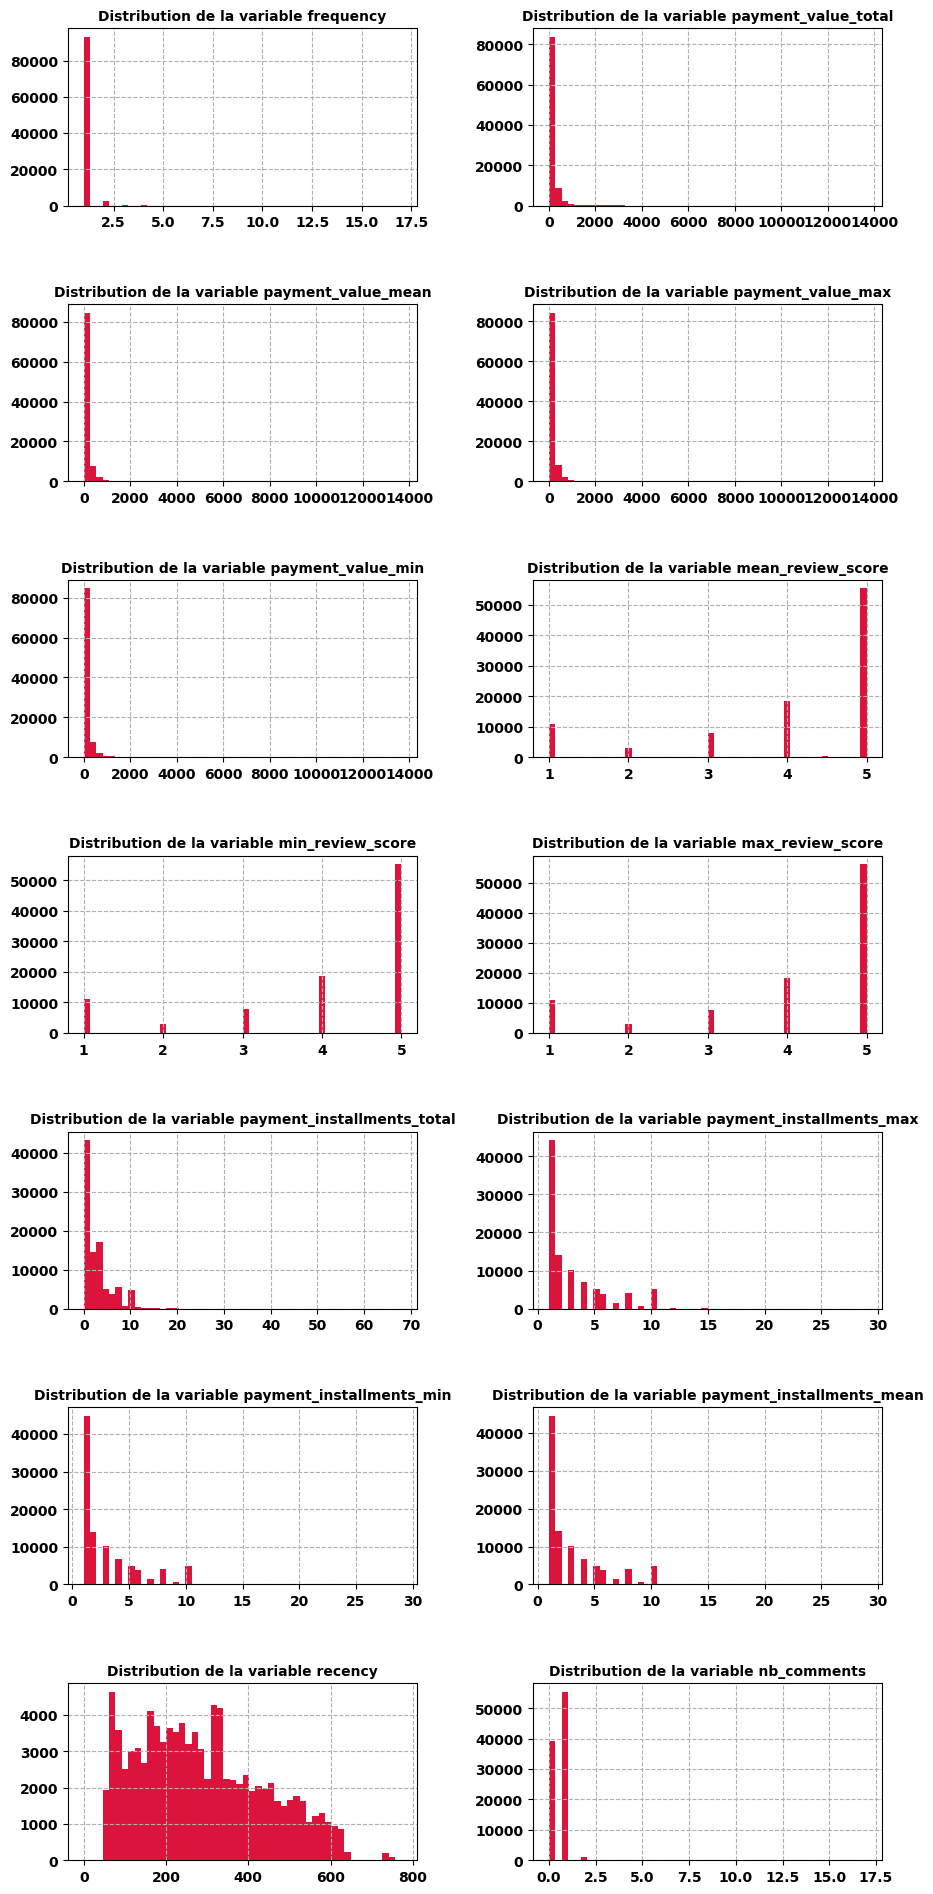

In [153]:
#Affichage des distributions des variables quantitatives

liste_features = init.columns[1:]
n_features = len(liste_features)
fig, axes = plt.subplots(int((n_features/2)),2, figsize = (10,20))
fig.tight_layout(pad=5.0)
for i, ax in zip(liste_features, axes.ravel()):
    h = ax.hist(init[i], bins = 50, color = 'crimson')
    ax.grid(True, ls = '--')
    ax.set_title('Distribution de la variable {}'.format(i), size = 10, weight = 'bold')

In [154]:
#Affichage du skewness des différents features de notre jeu de données comparé aux features passés au log

for i in liste_features:
    print('Feature : {}'.format(i))
    print('Skewness de la variable : {}'.format(init[i].skew()))
    print('Skewness de la variable passée au log: {}'.format(np.log(init[i] + 1).skew()))
    print('\n')

Feature : frequency
Skewness de la variable : 11.862593280003074
Skewness de la variable passée au log: 6.396777969809547


Feature : payment_value_total
Skewness de la variable : 9.467183444945212
Skewness de la variable passée au log: 0.5316644986439503


Feature : payment_value_mean
Skewness de la variable : 9.204439671089192
Skewness de la variable passée au log: 0.5488263971980348


Feature : payment_value_max
Skewness de la variable : 9.100750288804788
Skewness de la variable passée au log: 0.5409553529386967


Feature : payment_value_min
Skewness de la variable : 9.234020339490117
Skewness de la variable passée au log: 0.5531626898202741


Feature : mean_review_score
Skewness de la variable : -1.3726372019340267
Skewness de la variable passée au log: -1.7148467561019132


Feature : min_review_score
Skewness de la variable : -1.3522836158409037
Skewness de la variable passée au log: -1.6840989641967097


Feature : max_review_score
Skewness de la variable : -1.3944474216682279
Ske

In [155]:
#Définition de la fonction log_normalizer permettant de passer au log les features pour lesquelles on a une mesure de forme
#plus normall pour les variables passées au log

def log_normalizer(df):
    num_features = df.describe().columns
    df_out = df
    for i in num_features:
        s1 = np.abs(df[i].skew())
        s2 = np.abs(np.log(1 + df[i]).skew())
        if s2 < s1:
            df_out[i + '_log'] = np.log(1 + df_out[i])
            df_out = df_out.drop([i], axis = 1)
    return df_out

Text(2000, 40000, 'Skewness : 9.467')

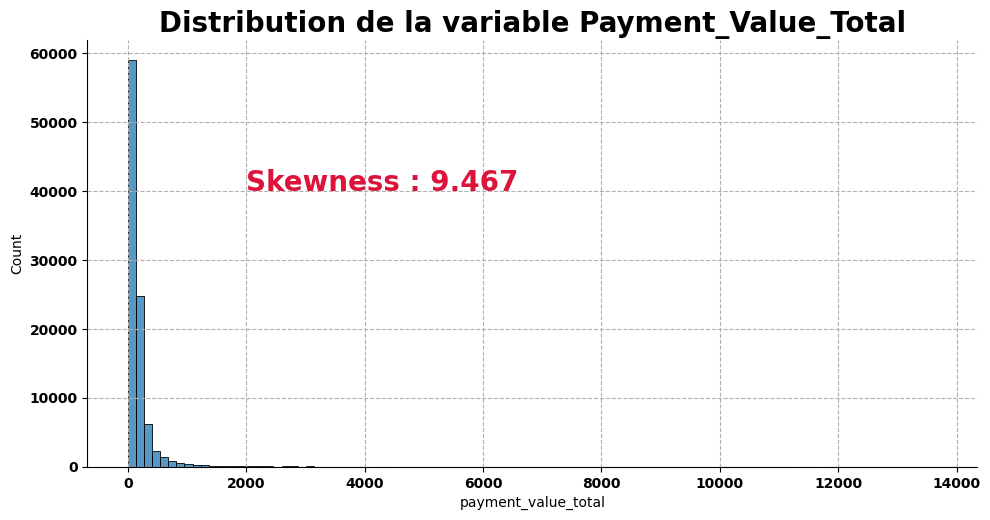

In [156]:
#Focus sur la variable 'payment_value_total'

plt.rcParams.update({'font.size' : 10})
sns.displot(data = init, x = 'payment_value_total', aspect = 2, height = 5, bins = 100)
plt.title('Distribution de la variable Payment_Value_Total', size = 20, weight = 'bold')
plt.grid(True, ls = '--')
plt.text(2000, 40000, 'Skewness : {}'.format(str(init['payment_value_total'].skew())[:5]), weight = 'bold',
        size = 20, color = 'crimson')

In [157]:
#Utilisation de la fonction log_normalizer sur le jeu de données init

final_df = log_normalizer(init)
final_df.columns

Index(['customer_unique_id', 'mean_review_score', 'min_review_score',
       'max_review_score', 'recency', 'frequency_log',
       'payment_value_total_log', 'payment_value_mean_log',
       'payment_value_max_log', 'payment_value_min_log',
       'payment_installments_total_log', 'payment_installments_max_log',
       'payment_installments_min_log', 'payment_installments_mean_log',
       'nb_comments_log'],
      dtype='object')

Text(6, 3000, 'Skewness : 0.531')

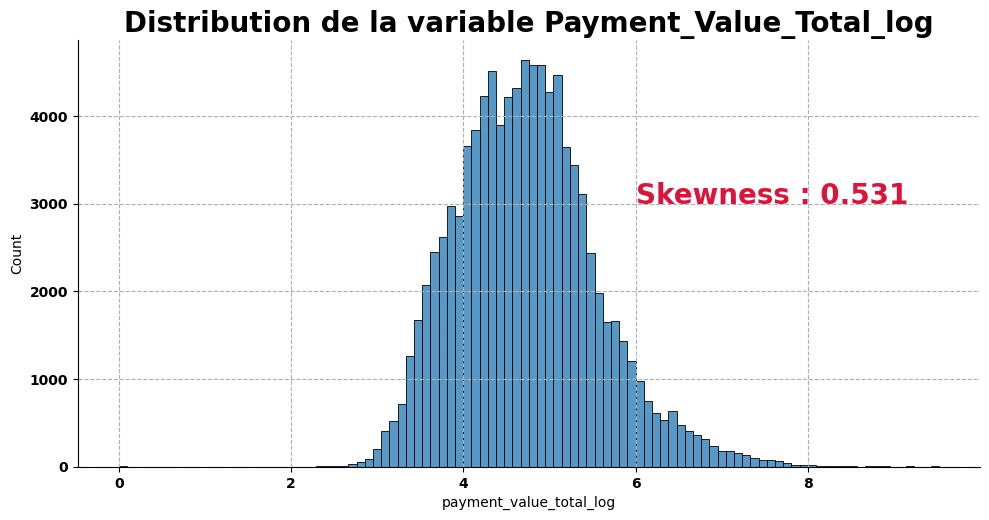

In [158]:
#Focus sur la variable 'payment_value_total'

plt.rcParams.update({'font.size' : 10})
sns.displot(data = final_df, x = 'payment_value_total_log', aspect = 2, height = 5, bins = 100)
plt.title('Distribution de la variable Payment_Value_Total_log', size = 20, weight = 'bold')
plt.grid(True, ls = '--')
plt.text(6, 3000, 'Skewness : {}'.format(str(final_df['payment_value_total_log'].skew())[:5]), weight = 'bold',
        size = 20, color = 'crimson')

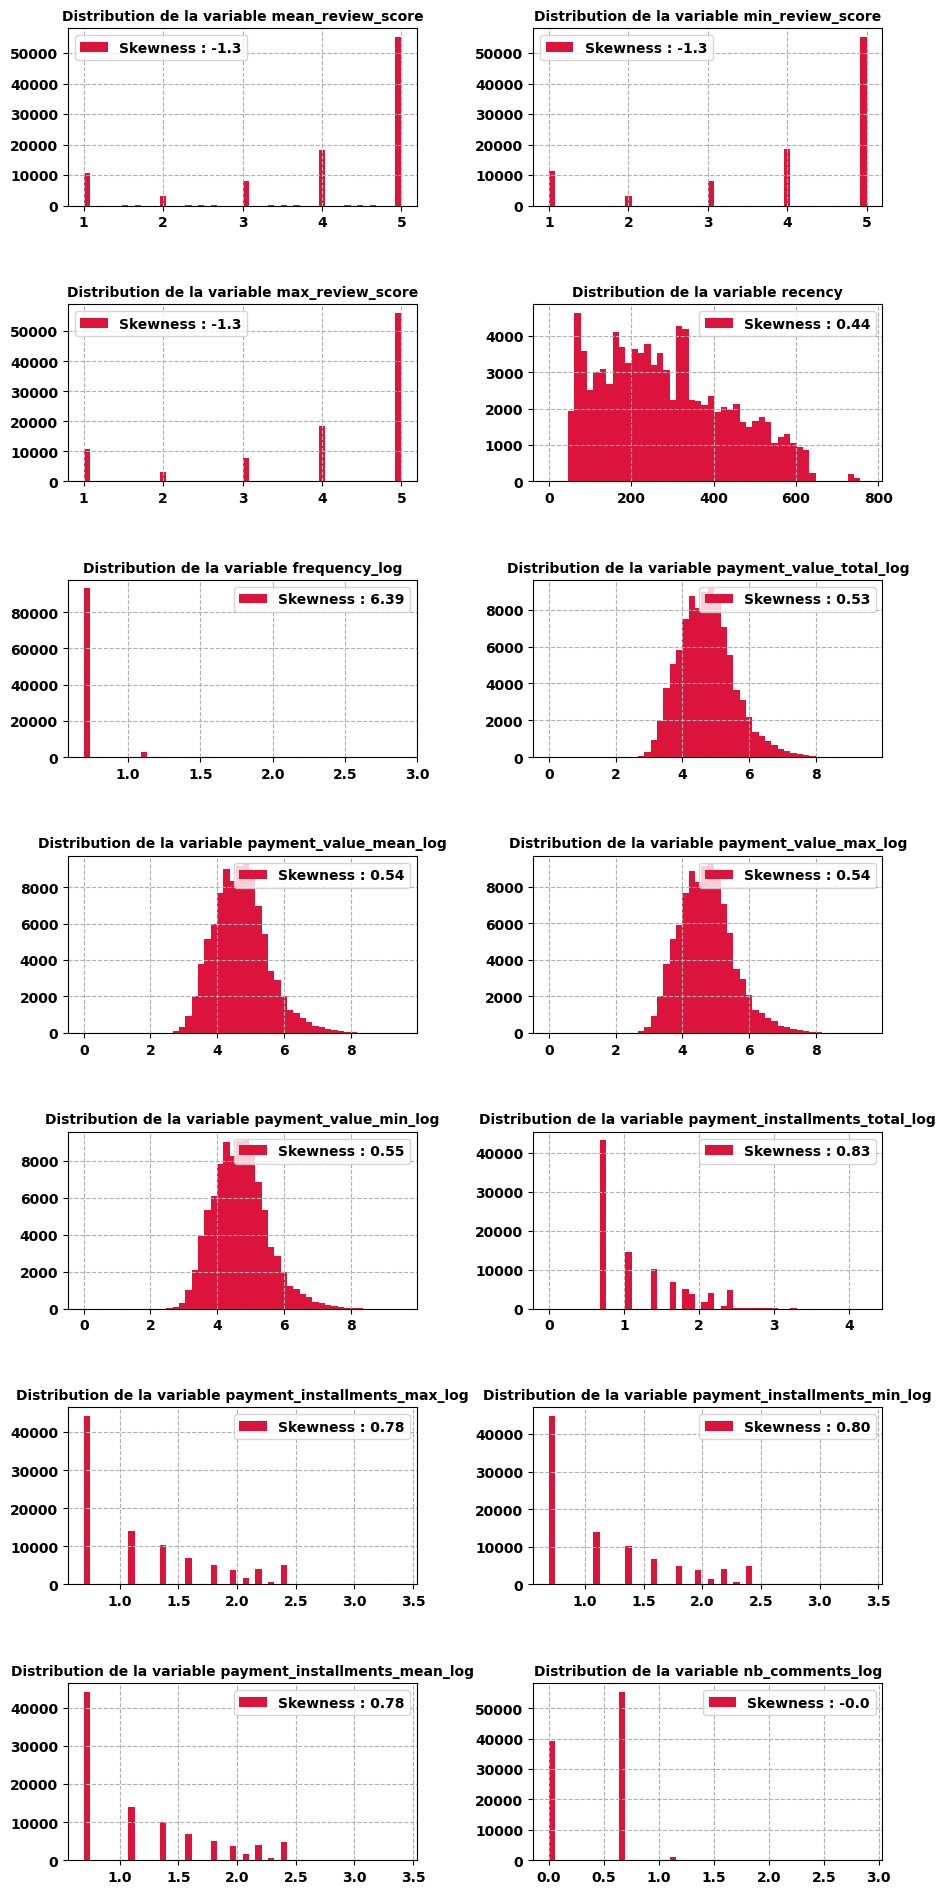

In [159]:
#Affichage de la distribution des nouvelles variables

liste_features = final_df.columns[1:]
n_features = len(liste_features)
fig, axes = plt.subplots(int((n_features/2)),2, figsize = (10,20))
fig.tight_layout(pad=5.0)
for i, ax in zip(liste_features, axes.ravel()):
    h = ax.hist(final_df[i], bins = 50, color = 'crimson', label = 'Skewness : {}'.format(str(final_df[i].skew())[:4]))
    ax.grid(True, ls = '--')
    ax.legend()
    ax.set_title('Distribution de la variable {}'.format(i), size = 10, weight = 'bold')

In [160]:
#Description du jeu de données

final_df.describe()

mean_review_score  min_review_score  max_review_score       recency  \
count       96096.000000      96096.000000      96096.000000  96096.000000   
mean            4.091807          4.079317          4.103938    287.735691   
std             1.338878          1.352304          1.337737    153.414676   
min             1.000000          1.000000          1.000000      0.000000   
25%             4.000000          4.000000          4.000000    163.000000   
50%             5.000000          5.000000          5.000000    268.000000   
75%             5.000000          5.000000          5.000000    397.000000   
max             5.000000          5.000000          5.000000    772.000000   

       frequency_log  payment_value_total_log  payment_value_mean_log  \
count   96096.000000             96096.000000            96096.000000   
mean        0.706732                 4.733067                4.710329   
std         0.078259                 0.812062                0.800597   
min         0.693147                 0.000000                0.000000   
25%         0.693147                 4.160756                4.150370   
50%         0.693147                 4.691348                4.671192   
75%         0.693147                 5.217812                5.182963   
max         2.890372                 9.522599                9.522599   

       payment_value_max_log  payment_value_min_log  \
count           96096.000000           96096.000000   
mean                4.717657               4.697798   
std                 0.803774               0.803591   
min                 0.000000               0.000000   
25%                 4.154185               4.134526   
50%                 4.679257               4.657478   
75%                 5.191748               5.174114   
max                 9.522599               9.522599   

       payment_installments_total_log  payment_installments_max_log  \
count                    96096.000000                  96096.000000   
mean                         1.211075                      1.195927   
std                          0.583861                      0.569910   
min                          0.000000                      0.693147   
25%                          0.693147                      0.693147   
50%                          1.098612                      1.098612   
75%                          1.609438                      1.609438   
max                          4.234107                      3.401197   

       payment_installments_min_log  payment_installments_mean_log  \
count                  96096.000000                   96096.000000   
mean                       1.186407                       1.192161   
std                        0.564928                       0.566229   
min                        0.693147                       0.693147   
25%                        0.693147                       0.693147   
50%                        1.098612                       1.098612   
75%                        1.609438                       1.609438   
max                        3.401197                       3.401197   

       nb_comments_log  
count     96096.000000  
mean          0.420285  
std           0.357316  
min           0.000000  
25%           0.000000  
50%           0.693147  
75%           0.693147  
max           2.890372

In [161]:
#Export au format csv

final_df.to_csv('final_df.csv')

## 4.2- Analyse Bivariée

In [162]:
#Définition de la matrice de covariance, et du mask à appliquer pour la visualisation

Corr = final_df.corr()
mask = np.triu(np.ones(Corr.shape))

Text(0.5, 1.0, 'Matrice de corrélations des variables \n quantitatives du jeu de données')

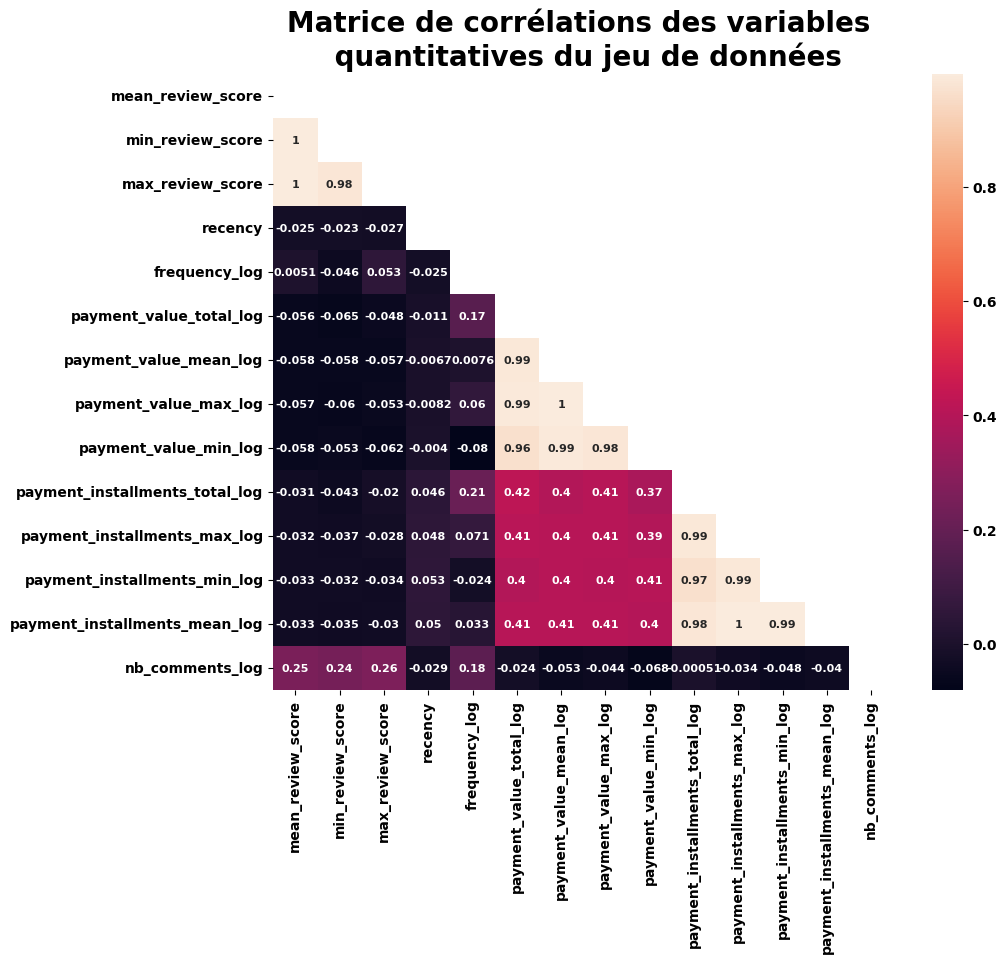

In [163]:
#Affichage de la matrice de covariance

plt.figure(figsize = (10,8))
sns.heatmap(Corr, mask = mask, annot = Corr, annot_kws={"fontsize":8})
plt.title('Matrice de corrélations des variables \n quantitatives du jeu de données', size = 20, weight = 'bold')

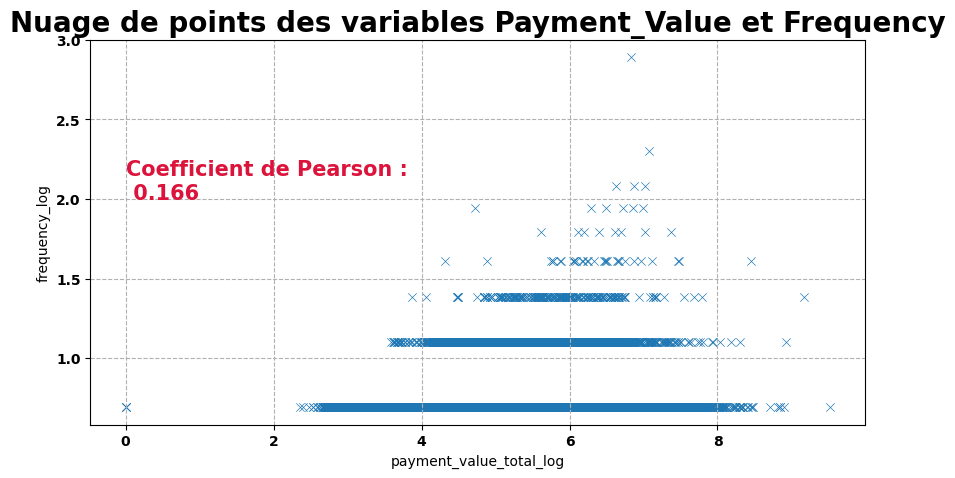

In [164]:
plt.rcParams.update({'font.size' : 10})
plt.figure(figsize = (10,5))
sns.scatterplot(data = final_df, x = 'payment_value_total_log', y = 'frequency_log', marker = 'x')
plt.title('Nuage de points des variables Payment_Value et Frequency', size = 20, weight = 'bold')
plt.text(0, 2, 'Coefficient de Pearson :\n {}'.format(str(final_df[['frequency_log', 'payment_value_total_log']].corr().values[0][1])[:5]),
        size = 15, weight = 'bold', color = 'crimson')
plt.grid(True, ls = '--')

# 5- Réduction dimensionnelle

## 5.1- Analyse en composantes principales

In [165]:
#Création du jeu de données X_std

from sklearn.preprocessing import StandardScaler
X = final_df[final_df.columns[1:]]
Std = StandardScaler()
Std.fit(X)
X_std = Std.transform(X)
X_std = pd.DataFrame(X_std, columns = final_df.columns[1:])
X_std.head()

mean_review_score  min_review_score  max_review_score   recency  \
0          -2.309264         -2.277101         -2.320302 -1.875552   
1           0.678327          0.680829          0.669838 -1.875552   
2          -2.309264         -2.277101         -2.320302 -1.790814   
3          -1.562366         -1.537618         -1.572767 -1.771259   
4          -2.309264         -2.277101         -2.320302 -1.758222   

   frequency_log  payment_value_total_log  payment_value_mean_log  \
0      -0.173593                -0.277566               -0.253139   
1       5.007533                 1.681091                0.870577   
2       8.683601                 2.035845                0.725353   
3       5.007533                 0.434756               -0.388711   
4      -0.173593                 0.239397                0.271227   

   payment_value_max_log  payment_value_min_log  \
0              -0.261256              -0.236603   
1               0.858019               0.882926   
2               0.713369               0.738243   
3              -0.396292              -0.371669   
4               0.261038               0.285809   

   payment_installments_total_log  payment_installments_max_log  \
0                       -0.887078                     -0.882215   
1                       -0.192620                     -0.882215   
2                        0.300106                     -0.882215   
3                        0.300106                     -0.170756   
4                       -0.887078                     -0.882215   

   payment_installments_min_log  payment_installments_mean_log  \
0                     -0.873142                      -0.881299   
1                     -0.873142                      -0.881299   
2                     -0.873142                      -0.881299   
3                     -0.873142                      -0.487210   
4                     -0.873142                      -0.881299   

   nb_comments_log  
0        -1.176235  
1        -1.176235  
2        -1.176235  
3         1.898407  
4        -1.176235

In [166]:
#Vérification de la moyenne et de l'écart-type

X_std.describe()

mean_review_score  min_review_score  max_review_score       recency  \
count       9.609600e+04      9.609600e+04      9.609600e+04  9.609600e+04   
mean       -2.167112e-14     -3.146567e-14     -4.646078e-16 -2.287325e-14   
std         1.000005e+00      1.000005e+00      1.000005e+00  1.000005e+00   
min        -2.309264e+00     -2.277101e+00     -2.320302e+00 -1.875552e+00   
25%        -6.857049e-02     -5.865318e-02     -7.769709e-02 -8.130665e-01   
50%         6.783272e-01      6.808293e-01      6.698379e-01 -1.286435e-01   
75%         6.783272e-01      6.808293e-01      6.698379e-01  7.122192e-01   
max         6.783272e-01      6.808293e-01      6.698379e-01  3.156587e+00   

       frequency_log  payment_value_total_log  payment_value_mean_log  \
count   9.609600e+04             9.609600e+04            9.609600e+04   
mean    9.128490e-15             1.208659e-15           -5.371768e-16   
std     1.000005e+00             1.000005e+00            1.000005e+00   
min    -1.735931e-01            -5.828487e+00           -5.883551e+00   
25%    -1.735931e-01            -7.047660e-01           -6.994295e-01   
50%    -1.735931e-01            -5.137435e-02           -4.888455e-02   
75%    -1.735931e-01             5.969346e-01            5.903551e-01   
max     2.790305e+01             5.898021e+00            6.010884e+00   

       payment_value_max_log  payment_value_min_log  \
count           9.609600e+04           9.609600e+04   
mean            1.985117e-16           1.269049e-15   
std             1.000005e+00           1.000005e+00   
min            -5.869413e+00          -5.846034e+00   
25%            -7.010369e-01          -7.009469e-01   
50%            -4.777507e-02          -5.017554e-02   
75%             5.898342e-01           5.927363e-01   
max             5.978008e+00           6.004078e+00   

       payment_installments_total_log  payment_installments_max_log  \
count                    9.609600e+04                  9.609600e+04   
mean                     1.589751e-14                  1.314860e-14   
std                      1.000005e+00                  1.000005e+00   
min                     -2.074261e+00                 -8.822146e-01   
25%                     -8.870776e-01                 -8.822146e-01   
50%                     -1.926196e-01                 -1.707557e-01   
75%                      6.822939e-01                  7.255765e-01   
max                      5.177679e+00                  3.869529e+00   

       payment_installments_min_log  payment_installments_mean_log  \
count                  9.609600e+04                   9.609600e+04   
mean                  -1.465633e-14                   1.550385e-14   
std                    1.000005e+00                   1.000005e+00   
min                   -8.731420e-01                  -8.812988e-01   
25%                   -8.731420e-01                  -8.812988e-01   
50%                   -1.554097e-01                  -1.652152e-01   
75%                    7.488260e-01                   7.369434e-01   
max                    3.920501e+00                   3.901333e+00   

       nb_comments_log  
count     9.609600e+04  
mean      1.444992e-14  
std       1.000005e+00  
min      -1.176235e+00  
25%      -1.176235e+00  
50%       7.636481e-01  
75%       7.636481e-01  
max       6.912931e+00

In [167]:
#On projette notre jeu de données sur les features intéressantes pour la PCA

PCA_features = X_std[['mean_review_score', 'recency', 'frequency_log', 'payment_value_total_log', 'nb_comments_log', 'payment_installments_total_log']]

In [168]:
#On effectue l'analyse en composantes principales

pca = PCA(n_components = PCA_features.columns.shape[0])
pca.fit(PCA_features)
X_pca = pca.transform(PCA_features)

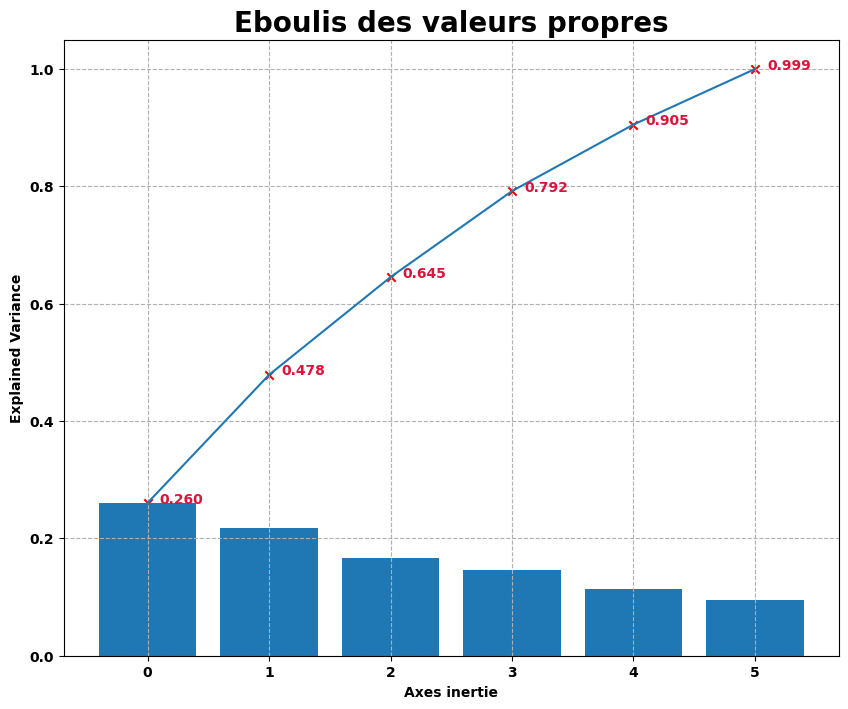

In [169]:
#Affichage de l'ébouli des valeurs propres

n_components = len(pca.components_)
plt.figure(figsize = (10,8))
plt.title('Eboulis des valeurs propres', size = 20, weight = 'bold')
plt.plot(range(n_components), pca.explained_variance_ratio_.cumsum())
plt.scatter(range(n_components), pca.explained_variance_ratio_.cumsum(), marker = 'x', c = 'r')
plt.bar(range(n_components), pca.explained_variance_ratio_)
plt.grid(True, ls = '--')
plt.ylabel('Explained Variance', size = 10, weight = 'bold')
plt.xlabel('Axes inertie', size = 10, weight = 'bold')
for i in range(len(pca.explained_variance_ratio_.cumsum())):
    plt.text(i + 0.1, pca.explained_variance_ratio_.cumsum()[i], 
             '{}'.format(str(pca.explained_variance_ratio_.cumsum()[i])[:5]),
            weight = 'bold', color = 'crimson')

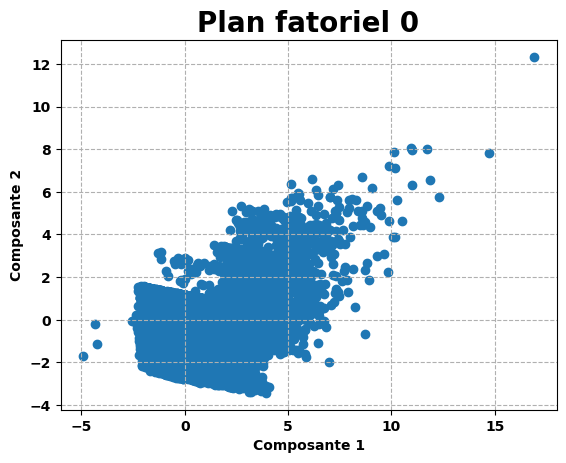

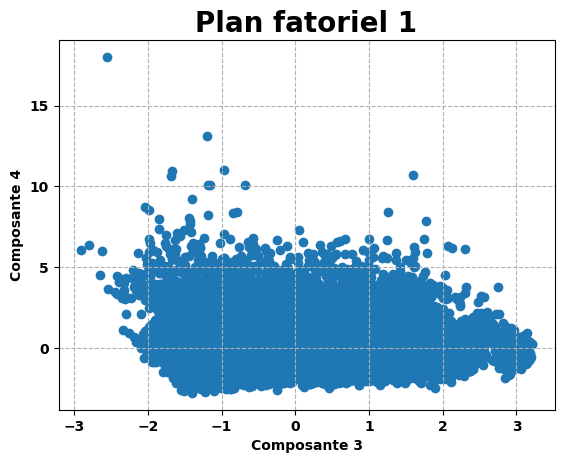

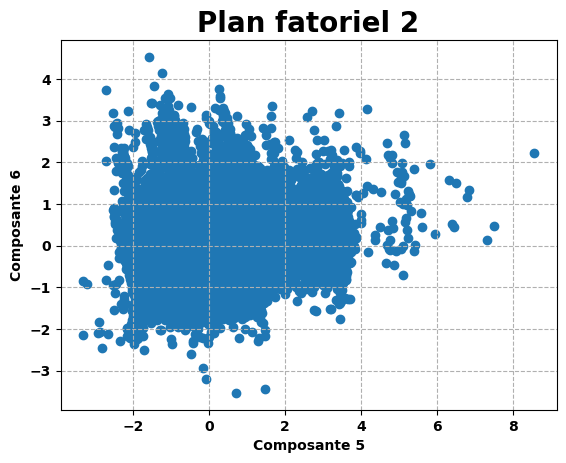

In [170]:
#Projection des individus sur les différents plans factoriels

for i in range(int(n_components/2)):
    plt.figure()
    plt.scatter(X_pca[:, 2 * i ], X_pca[:, (2 * i) +1])
    plt.title('Plan fatoriel {}'.format(i), size = 20, weight = 'bold')
    plt.xlabel('Composante {}'.format((2 * i) + 1), weight = 'bold')
    plt.ylabel('Composante {}'.format((2 * i) + 2), weight = 'bold')
    plt.grid(True, ls = '--')

In [171]:
#On place nos axes d'inertie dans une liste

pcs = pca.components_

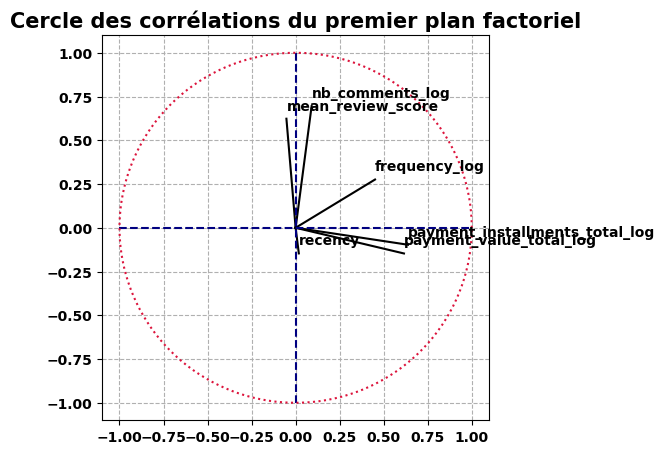

In [172]:
plt.figure(figsize =  (5,5))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y + 0.05, PCA_features.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='navy', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='navy', ls='--')
plt.title('Cercle des corrélations du premier plan factoriel', size = 15, weight = 'bold')
plt.grid(True, ls = '--')
theta = np.linspace( 0 , 2 * np.pi , 150 )
a = np.cos( theta )
b = np.sin( theta )
plt.plot(a,b, color = 'crimson' , ls = 'dotted')

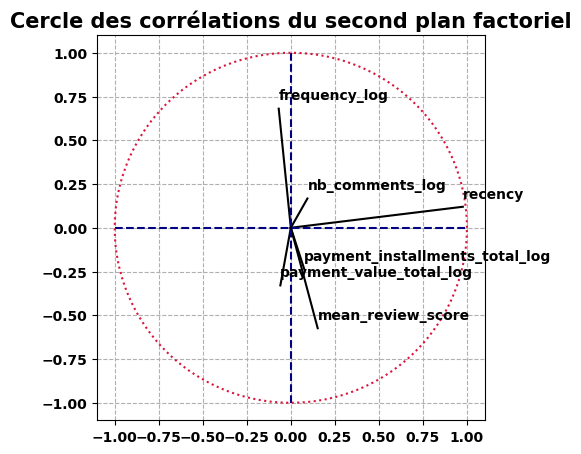

In [173]:
plt.figure(figsize =  (5,5))
for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y + 0.05, PCA_features.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='navy', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='navy', ls='--')
plt.title('Cercle des corrélations du second plan factoriel', size = 15, weight = 'bold')
plt.grid(True, ls = '--')
theta = np.linspace( 0 , 2 * np.pi , 150 )
a = np.cos( theta )
b = np.sin( theta )
plt.plot(a,b, color = 'crimson' , ls = 'dotted')

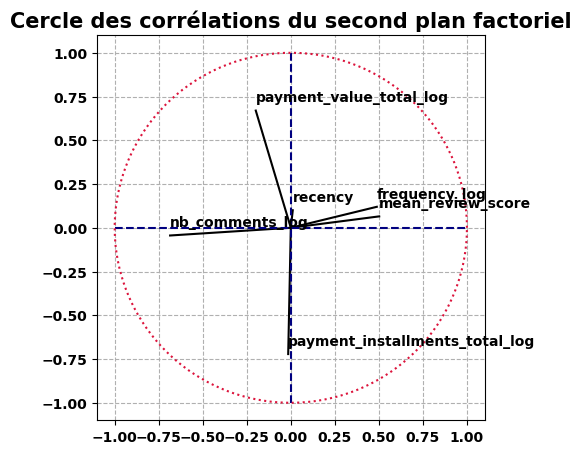

In [174]:
plt.figure(figsize =  (5,5))
for i, (x, y) in enumerate(zip(pcs[4, :], pcs[5, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y + 0.05, PCA_features.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='navy', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='navy', ls='--')
plt.title('Cercle des corrélations du second plan factoriel', size = 15, weight = 'bold')
plt.grid(True, ls = '--')
theta = np.linspace( 0 , 2 * np.pi , 150 )
a = np.cos( theta )
b = np.sin( theta )
plt.plot(a,b, color = 'crimson' , ls = 'dotted')

In [175]:
#Affichage des composantes principales en fonction de nos features initiales

L = []
for i in range(len(pcs)):
    L.append('Composante principale {}'.format(i))
pca_features = pd.DataFrame(pcs, columns = PCA_features.columns, index = L)
pca_features = pca_features.transpose()
pca_features.style.background_gradient(axis = 0)

In [176]:
#Exportation du jeu de données

X_std.to_csv('X_std.csv')

# 6- Analyse bivariée entre retard de livraison et review score 

In [238]:
#Construction du jeu de données 'delay_df' fournissant le retard en jours (avance de livraison si négatif)

delay_df = orders[['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date']]
reviews_satisfaction = order_reviews[['order_id', 'review_score']]

delay_review = delay_df.merge(reviews_satisfaction)
delay_review = delay_review.loc[~delay_review['order_delivered_customer_date'].isna()]
delay_review['delay'] = delay_review['order_delivered_customer_date'] - delay_review['order_estimated_delivery_date']
delay_review['days_delay'] = (pd.to_numeric(delay_review['delay'])/(1000000000 * 24 * 3600)).astype(int)
delay_review

order_id order_delivered_customer_date  \
0      e481f51cbdc54678b7cc49136f2d6af7           2017-10-10 21:25:13   
1      53cdb2fc8bc7dce0b6741e2150273451           2018-08-07 15:27:45   
2      47770eb9100c2d0c44946d9cf07ec65d           2018-08-17 18:06:29   
3      949d5b44dbf5de918fe9c16f97b45f8a           2017-12-02 00:28:42   
4      ad21c59c0840e6cb83a9ceb5573f8159           2018-02-16 18:17:02   
...                                 ...                           ...   
99219  9c5dedf39a927c1b2549525ed64a053c           2017-03-17 15:08:01   
99220  63943bddc261676b46f01ca7ac2f7bd8           2018-02-28 17:37:56   
99221  83c1379a015df1e13d02aae0204711ab           2017-09-21 11:24:17   
99222  11c177c8e97725db2631073c19f07b62           2018-01-25 23:32:54   
99223  66dea50a8b16d9b4dee7af250b4be1a5           2018-03-16 13:08:30   

      order_estimated_delivery_date  review_score              delay  \
0                        2017-10-18             4  -8 days +21:25:13   
1                        2018-08-13             4  -6 days +15:27:45   
2                        2018-09-04             5 -18 days +18:06:29   
3                        2017-12-15             5 -13 days +00:28:42   
4                        2018-02-26             5 -10 days +18:17:02   
...                             ...           ...                ...   
99219                    2017-03-28             5 -11 days +15:08:01   
99220                    2018-03-02             4  -2 days +17:37:56   
99221                    2017-09-27             5  -6 days +11:24:17   
99222                    2018-02-15             2 -21 days +23:32:54   
99223                    2018-04-03             5 -18 days +13:08:30   

       days_delay  
0              -7  
1              -5  
2             -17  
3             -12  
4              -9  
...           ...  
99219         -10  
99220          -1  
99221          -5  
99222         -20  
99223         -17  

[96359 rows x 6 columns]

Text(25, 5000, 'Kurtosis : 28.08')

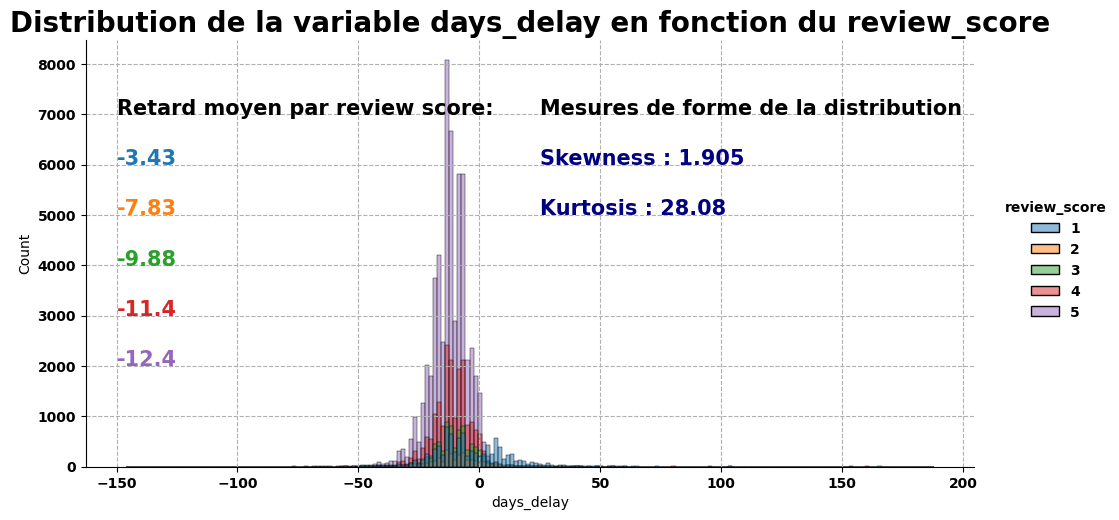

In [304]:
#Distribution de la variable days_delay en fonction du review score

sns.displot(data = delay_review, x = 'days_delay', bins = 200, hue = 'review_score', aspect = 2, height = 5,
           palette = 'tab10')
plt.grid(True, ls = '--')
plt.title('Distribution de la variable days_delay en fonction du review_score', size = 20, weight = 'bold')

plt.text(-150, 7000, 'Retard moyen par review score:', weight = 'bold', size = 15)
for i in range(1,6):
    plt.text(-150, 7000 - i*1000, '{}'.format(str(delay_review.loc[delay_review['review_score'] == i, 'days_delay'].mean()))[:5],
            color = sns.color_palette('tab10')[i - 1], weight = 'bold', size = 15)

plt.text(25, 7000, 'Mesures de forme de la distribution', size = 15)
plt.text(25, 6000, 'Skewness : {}'.format(str(delay_review['days_delay'].skew())[:5]), size = 15, color = 'navy')
plt.text(25, 5000, 'Kurtosis : {}'.format(str(delay_review['days_delay'].kurt())[:5]), size = 15, color = 'navy')